In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [5]:
#まずは小さい欠陥を推定できるのか

## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_train = []
size_y_train = []
position_x_train = []
position_y_train = []
size_x_test = []
size_y_test = []
position_x_test = []
position_y_test = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_test.append(data_array[1:-1])
    size_y_test.append(2)
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_test.append(data_array[1:-1])
    position_y_test.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_train = np.array(size_x_train, dtype=float)
size_y_train = np.array(size_y_train, dtype=int)
size_x_test = np.array(size_x_test, dtype=float)
size_y_test = np.array(size_y_test, dtype=int)
position_x_train = np.array(position_x_train, dtype=float)
position_y_train = np.array(position_y_train, dtype=int)
position_x_test = np.array(position_x_test, dtype=float)
position_y_test = np.array(position_y_test, dtype=int)

### データの加工
size_x_train = (size_x_train-no_hole_data)
size_x_test = (size_x_test-no_hole_data)
position_x_train = (position_x_train-no_hole_data)
position_x_test = (position_x_test-no_hole_data)
size_y_train = keras.utils.to_categorical(size_y_train, 6)
size_y_test = keras.utils.to_categorical(size_y_test, 6)
position_y_train = (position_y_train-1)
position_y_train = keras.utils.to_categorical(position_y_train, 25)
position_y_test = (position_y_test-1)
position_y_test = keras.utils.to_categorical(position_y_test, 25)

### reshape
size_x_train = size_x_train.reshape(7926, 50, 1)
size_x_test = size_x_test.reshape(2209, 50, 1)
position_x_train = position_x_train.reshape(7926, 50, 1)
position_x_test = position_x_test.reshape(2209, 50, 1)

In [6]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [7]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 7926 samples, validate on 2209 samples
Epoch 1/1000
7926/7926 [==============================] - 0s 39us/step - loss: 1.3545 - accuracy: 0.4088 - val_loss: 0.9523 - val_accuracy: 1.0000
Epoch 2/1000
7926/7926 [==============================] - 0s 25us/step - loss: 1.2098 - accuracy: 0.5223 - val_loss: 0.8189 - val_accuracy: 1.0000
Epoch 3/1000
7926/7926 [==============================] - 0s 25us/step - loss: 1.1384 - accuracy: 0.5640 - val_loss: 0.9800 - val_accuracy: 0.0321
Epoch 4/1000
7926/7926 [==============================] - 0s 26us/step - loss: 1.0937 - accuracy: 0.5672 - val_loss: 0.8186 - val_accuracy: 1.0000
Epoch 5/1000
7926/7926 [==============================] - 0s 24us/step - loss: 1.0573 - accuracy: 0.5901 - val_loss: 0.6114 - val_accuracy: 1.0000
Epoch 6/1000
7926/7926 [==============================] - 0s 24us/step - loss: 1.0258 - accuracy: 0.6123 - val_loss: 0.6466 - val_accuracy: 1.0000
Epoch 7/1000
7926/7926 [==============================] - ETA: 0s - lo

7926/7926 [==============================] - 0s 25us/step - loss: 0.4849 - accuracy: 0.9143 - val_loss: 0.0731 - val_accuracy: 1.0000
Epoch 56/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.4802 - accuracy: 0.9131 - val_loss: 0.0769 - val_accuracy: 1.0000
Epoch 57/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.4809 - accuracy: 0.9083 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 58/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.4719 - accuracy: 0.9133 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 59/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.4666 - accuracy: 0.9123 - val_loss: 0.1172 - val_accuracy: 0.9995
Epoch 60/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.4605 - accuracy: 0.9169 - val_loss: 0.0874 - val_accuracy: 0.9995
Epoch 61/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.4553 - accuracy: 0.9176 - val_loss: 0.0428 -

7926/7926 [==============================] - 0s 23us/step - loss: 0.3067 - accuracy: 0.9348 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 111/1000
7926/7926 [==============================] - 0s 23us/step - loss: 0.3047 - accuracy: 0.9312 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 112/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.3017 - accuracy: 0.9322 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 113/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.3011 - accuracy: 0.9330 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 114/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.3077 - accuracy: 0.9334 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 115/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.2948 - accuracy: 0.9354 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 116/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.2966 - accuracy: 0.9358 - val_loss: 0.

7926/7926 [==============================] - 0s 27us/step - loss: 0.2228 - accuracy: 0.9435 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 166/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.2214 - accuracy: 0.9447 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 167/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.2195 - accuracy: 0.9432 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 168/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.2143 - accuracy: 0.9459 - val_loss: 0.0183 - val_accuracy: 0.9995
Epoch 169/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.2245 - accuracy: 0.9454 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 170/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.2136 - accuracy: 0.9450 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 171/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.2234 - accuracy: 0.9422 - val_loss: 0.

7926/7926 [==============================] - 0s 24us/step - loss: 0.1741 - accuracy: 0.9553 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 221/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.1701 - accuracy: 0.9558 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 222/1000
7926/7926 [==============================] - 0s 29us/step - loss: 0.1670 - accuracy: 0.9508 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 223/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1663 - accuracy: 0.9538 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 224/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.1713 - accuracy: 0.9552 - val_loss: 8.3892e-04 - val_accuracy: 1.0000
Epoch 225/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.1785 - accuracy: 0.9468 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 226/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.1616 - accuracy: 0.9553 - val_loss

Epoch 275/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1368 - accuracy: 0.9596 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 276/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1394 - accuracy: 0.9621 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 277/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.1384 - accuracy: 0.9598 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 278/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1372 - accuracy: 0.9581 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 279/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1499 - accuracy: 0.9565 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 280/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1397 - accuracy: 0.9586 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 281/1000
7926/7926 [==============================] - 0s 29us/step - loss: 0.1387 - accuracy: 0.9595

7926/7926 [==============================] - 0s 28us/step - loss: 0.1275 - accuracy: 0.9623 - val_loss: 5.9235e-04 - val_accuracy: 1.0000
Epoch 330/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.1193 - accuracy: 0.9671 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 331/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.1267 - accuracy: 0.9621 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 332/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.1274 - accuracy: 0.9608 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 333/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1157 - accuracy: 0.9654 - val_loss: 6.3031e-04 - val_accuracy: 1.0000
Epoch 334/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.1175 - accuracy: 0.9658 - val_loss: 4.6434e-04 - val_accuracy: 1.0000
Epoch 335/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.1162 - accuracy: 0.9649 - 

7926/7926 [==============================] - 0s 24us/step - loss: 0.1102 - accuracy: 0.9671 - val_loss: 5.1426e-04 - val_accuracy: 1.0000
Epoch 384/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.1095 - accuracy: 0.9669 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 385/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.1095 - accuracy: 0.9667 - val_loss: 9.1145e-04 - val_accuracy: 1.0000
Epoch 386/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1055 - accuracy: 0.9685 - val_loss: 3.4649e-04 - val_accuracy: 1.0000
Epoch 387/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.1024 - accuracy: 0.9690 - val_loss: 5.8975e-04 - val_accuracy: 1.0000
Epoch 388/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.1048 - accuracy: 0.9668 - val_loss: 7.3521e-04 - val_accuracy: 1.0000
Epoch 389/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.1037 - accuracy: 0

Epoch 437/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0964 - accuracy: 0.9696 - val_loss: 1.5383e-04 - val_accuracy: 1.0000
Epoch 438/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0910 - accuracy: 0.9726 - val_loss: 1.7734e-04 - val_accuracy: 1.0000
Epoch 439/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0908 - accuracy: 0.9719 - val_loss: 1.3804e-04 - val_accuracy: 1.0000
Epoch 440/1000
7926/7926 [==============================] - 0s 30us/step - loss: 0.0913 - accuracy: 0.9721 - val_loss: 1.4812e-04 - val_accuracy: 1.0000
Epoch 441/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0932 - accuracy: 0.9733 - val_loss: 5.6436e-04 - val_accuracy: 1.0000
Epoch 442/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.0980 - accuracy: 0.9683 - val_loss: 2.4149e-04 - val_accuracy: 1.0000
Epoch 443/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0

7926/7926 [==============================] - 0s 28us/step - loss: 0.0877 - accuracy: 0.9726 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 491/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 492/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0842 - accuracy: 0.9739 - val_loss: 1.6138e-04 - val_accuracy: 1.0000
Epoch 493/1000
7926/7926 [==============================] - 0s 40us/step - loss: 0.0817 - accuracy: 0.9764 - val_loss: 1.8523e-04 - val_accuracy: 1.0000
Epoch 494/1000
7926/7926 [==============================] - 0s 32us/step - loss: 0.0775 - accuracy: 0.9772 - val_loss: 2.8566e-04 - val_accuracy: 1.0000
Epoch 495/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0808 - accuracy: 0.9758 - val_loss: 2.1678e-04 - val_accuracy: 1.0000
Epoch 496/1000
7926/7926 [==============================] - 0s 35us/step - loss: 0.0811 - accuracy: 0.975

Epoch 544/1000
7926/7926 [==============================] - 0s 35us/step - loss: 0.0727 - accuracy: 0.9797 - val_loss: 2.3171e-04 - val_accuracy: 1.0000
Epoch 545/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 1.3631e-04 - val_accuracy: 1.0000
Epoch 546/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 1.4704e-04 - val_accuracy: 1.0000
Epoch 547/1000
7926/7926 [==============================] - 0s 30us/step - loss: 0.0773 - accuracy: 0.9762 - val_loss: 1.4119e-04 - val_accuracy: 1.0000
Epoch 548/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0766 - accuracy: 0.9789 - val_loss: 1.3061e-04 - val_accuracy: 1.0000
Epoch 549/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0714 - accuracy: 0.9782 - val_loss: 6.7131e-04 - val_accuracy: 1.0000
Epoch 550/1000
7926/7926 [==============================] - 0s 29us/step - loss: 0

7926/7926 [==============================] - 0s 26us/step - loss: 0.0690 - accuracy: 0.9807 - val_loss: 8.8336e-05 - val_accuracy: 1.0000
Epoch 598/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0684 - accuracy: 0.9808 - val_loss: 2.4311e-04 - val_accuracy: 1.0000
Epoch 599/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0728 - accuracy: 0.9783 - val_loss: 1.9583e-04 - val_accuracy: 1.0000
Epoch 600/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0694 - accuracy: 0.9797 - val_loss: 1.7516e-04 - val_accuracy: 1.0000
Epoch 601/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0692 - accuracy: 0.9796 - val_loss: 1.7641e-05 - val_accuracy: 1.0000
Epoch 602/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0706 - accuracy: 0.9799 - val_loss: 2.3733e-04 - val_accuracy: 1.0000
Epoch 603/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0710 - accurac

7926/7926 [==============================] - 0s 28us/step - loss: 0.0655 - accuracy: 0.9796 - val_loss: 2.9071e-05 - val_accuracy: 1.0000
Epoch 651/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0664 - accuracy: 0.9815 - val_loss: 4.8385e-05 - val_accuracy: 1.0000
Epoch 652/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0634 - accuracy: 0.9818 - val_loss: 2.1869e-04 - val_accuracy: 1.0000
Epoch 653/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0689 - accuracy: 0.9802 - val_loss: 3.0175e-05 - val_accuracy: 1.0000
Epoch 654/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0655 - accuracy: 0.9813 - val_loss: 9.7929e-05 - val_accuracy: 1.0000
Epoch 655/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0630 - accuracy: 0.9826 - val_loss: 1.3684e-04 - val_accuracy: 1.0000
Epoch 656/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0610 - accurac

7926/7926 [==============================] - 0s 27us/step - loss: 0.0553 - accuracy: 0.9837 - val_loss: 4.2553e-04 - val_accuracy: 1.0000
Epoch 704/1000
7926/7926 [==============================] - 0s 29us/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 2.6088e-04 - val_accuracy: 1.0000
Epoch 705/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0568 - accuracy: 0.9841 - val_loss: 1.3959e-04 - val_accuracy: 1.0000
Epoch 706/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 1.0098e-04 - val_accuracy: 1.0000
Epoch 707/1000
7926/7926 [==============================] - 0s 29us/step - loss: 0.0558 - accuracy: 0.9846 - val_loss: 8.7617e-05 - val_accuracy: 1.0000
Epoch 708/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 6.2653e-05 - val_accuracy: 1.0000
Epoch 709/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0628 - accurac

7926/7926 [==============================] - 0s 25us/step - loss: 0.0570 - accuracy: 0.9839 - val_loss: 2.0069e-04 - val_accuracy: 1.0000
Epoch 757/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.0533 - accuracy: 0.9851 - val_loss: 1.2813e-04 - val_accuracy: 1.0000
Epoch 758/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 4.7157e-05 - val_accuracy: 1.0000
Epoch 759/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 5.6382e-05 - val_accuracy: 1.0000
Epoch 760/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0558 - accuracy: 0.9841 - val_loss: 6.1783e-04 - val_accuracy: 1.0000
Epoch 761/1000
7926/7926 [==============================] - 0s 29us/step - loss: 0.0585 - accuracy: 0.9830 - val_loss: 1.0933e-04 - val_accuracy: 1.0000
Epoch 762/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0508 - accurac

7926/7926 [==============================] - 0s 27us/step - loss: 0.0528 - accuracy: 0.9849 - val_loss: 1.2489e-04 - val_accuracy: 1.0000
Epoch 810/1000
7926/7926 [==============================] - 0s 40us/step - loss: 0.0493 - accuracy: 0.9865 - val_loss: 5.3982e-05 - val_accuracy: 1.0000
Epoch 811/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0482 - accuracy: 0.9870 - val_loss: 4.5729e-05 - val_accuracy: 1.0000
Epoch 812/1000
7926/7926 [==============================] - 0s 30us/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 1.3260e-04 - val_accuracy: 1.0000
Epoch 813/1000
7926/7926 [==============================] - 0s 30us/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 4.2354e-05 - val_accuracy: 1.0000
Epoch 814/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 1.8154e-05 - val_accuracy: 1.0000
Epoch 815/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0552 - accurac

7926/7926 [==============================] - 0s 25us/step - loss: 0.0494 - accuracy: 0.9861 - val_loss: 2.8552e-05 - val_accuracy: 1.0000
Epoch 863/1000
7926/7926 [==============================] - 0s 31us/step - loss: 0.0439 - accuracy: 0.9880 - val_loss: 1.2626e-04 - val_accuracy: 1.0000
Epoch 864/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.0616 - accuracy: 0.9817 - val_loss: 2.0528e-05 - val_accuracy: 1.0000
Epoch 865/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0498 - accuracy: 0.9855 - val_loss: 5.1347e-05 - val_accuracy: 1.0000
Epoch 866/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0478 - accuracy: 0.9862 - val_loss: 1.8208e-05 - val_accuracy: 1.0000
Epoch 867/1000
7926/7926 [==============================] - 0s 31us/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 5.6031e-05 - val_accuracy: 1.0000
Epoch 868/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0481 - accurac

7926/7926 [==============================] - 0s 31us/step - loss: 0.0441 - accuracy: 0.9883 - val_loss: 2.8225e-05 - val_accuracy: 1.0000
Epoch 916/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0421 - accuracy: 0.9879 - val_loss: 1.9595e-05 - val_accuracy: 1.0000
Epoch 917/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.0416 - accuracy: 0.9890 - val_loss: 1.8433e-05 - val_accuracy: 1.0000
Epoch 918/1000
7926/7926 [==============================] - 0s 25us/step - loss: 0.0480 - accuracy: 0.9857 - val_loss: 9.0684e-06 - val_accuracy: 1.0000
Epoch 919/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0450 - accuracy: 0.9871 - val_loss: 7.7925e-05 - val_accuracy: 1.0000
Epoch 920/1000
7926/7926 [==============================] - 0s 30us/step - loss: 0.0418 - accuracy: 0.9893 - val_loss: 1.1072e-04 - val_accuracy: 1.0000
Epoch 921/1000
7926/7926 [==============================] - 0s 24us/step - loss: 0.0429 - accurac

7926/7926 [==============================] - 0s 31us/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 1.5897e-05 - val_accuracy: 1.0000
Epoch 969/1000
7926/7926 [==============================] - 0s 26us/step - loss: 0.0411 - accuracy: 0.9883 - val_loss: 1.7875e-05 - val_accuracy: 1.0000
Epoch 970/1000
7926/7926 [==============================] - 0s 28us/step - loss: 0.0375 - accuracy: 0.9893 - val_loss: 3.6485e-05 - val_accuracy: 1.0000
Epoch 971/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0403 - accuracy: 0.9902 - val_loss: 4.9998e-05 - val_accuracy: 1.0000
Epoch 972/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0390 - accuracy: 0.9891 - val_loss: 1.8592e-04 - val_accuracy: 1.0000
Epoch 973/1000
7926/7926 [==============================] - 0s 33us/step - loss: 0.0415 - accuracy: 0.9899 - val_loss: 2.2816e-05 - val_accuracy: 1.0000
Epoch 974/1000
7926/7926 [==============================] - 0s 27us/step - loss: 0.0378 - accurac

In [8]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2209/2209 [==============================] - 0s 36us/step
Test loss: 9.745986786279409e-06
Test accuracy: 1.0


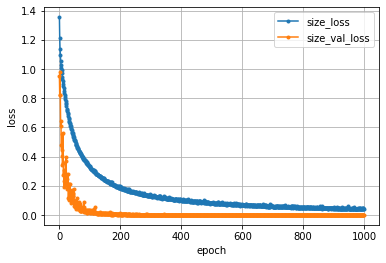

In [9]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

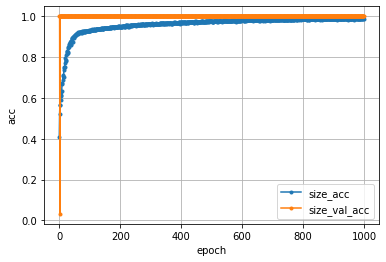

In [10]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [11]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [12]:
# 学習(位置)
epochs = 4000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 7926 samples, validate on 2209 samples
Epoch 1/4000
7926/7926 [==============================] - 0s 46us/step - loss: 3.0855 - accuracy: 0.1023 - val_loss: 3.2281 - val_accuracy: 0.0521
Epoch 2/4000
7926/7926 [==============================] - 0s 31us/step - loss: 2.9010 - accuracy: 0.1665 - val_loss: 3.2073 - val_accuracy: 0.0521
Epoch 3/4000
7926/7926 [==============================] - 0s 30us/step - loss: 2.7640 - accuracy: 0.1948 - val_loss: 3.2144 - val_accuracy: 0.0679
Epoch 4/4000
7926/7926 [==============================] - 0s 31us/step - loss: 2.6679 - accuracy: 0.2161 - val_loss: 3.2069 - val_accuracy: 0.0407
Epoch 5/4000
7926/7926 [==============================] - 0s 29us/step - loss: 2.5845 - accuracy: 0.2335 - val_loss: 3.1862 - val_accuracy: 0.0901
Epoch 6/4000
7926/7926 [==============================] - 0s 31us/step - loss: 2.5173 - accuracy: 0.2491 - val_loss: 3.1945 - val_accuracy: 0.0865
Epoch 7/4000
7926/7926 [==============================] - 0s 30us/step

7926/7926 [==============================] - 0s 32us/step - loss: 1.6309 - accuracy: 0.4658 - val_loss: 3.1150 - val_accuracy: 0.0765
Epoch 57/4000
7926/7926 [==============================] - 0s 32us/step - loss: 1.6191 - accuracy: 0.4674 - val_loss: 3.1310 - val_accuracy: 0.0869
Epoch 58/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.6456 - accuracy: 0.4712 - val_loss: 3.0082 - val_accuracy: 0.1399
Epoch 59/4000
7926/7926 [==============================] - 0s 32us/step - loss: 1.6075 - accuracy: 0.4951 - val_loss: 3.0623 - val_accuracy: 0.1073
Epoch 60/4000
7926/7926 [==============================] - 0s 32us/step - loss: 1.6001 - accuracy: 0.4875 - val_loss: 2.9212 - val_accuracy: 0.1313
Epoch 61/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.6152 - accuracy: 0.4686 - val_loss: 3.1602 - val_accuracy: 0.0860
Epoch 62/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.6017 - accuracy: 0.4850 - val_loss: 3.0984 -

7926/7926 [==============================] - 0s 30us/step - loss: 1.4313 - accuracy: 0.5225 - val_loss: 3.0817 - val_accuracy: 0.0914
Epoch 112/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.4303 - accuracy: 0.5111 - val_loss: 3.1228 - val_accuracy: 0.0914
Epoch 113/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.4223 - accuracy: 0.5300 - val_loss: 2.9947 - val_accuracy: 0.1059
Epoch 114/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.4103 - accuracy: 0.5338 - val_loss: 3.0729 - val_accuracy: 0.0942
Epoch 115/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.4210 - accuracy: 0.5165 - val_loss: 3.1030 - val_accuracy: 0.1064
Epoch 116/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.4159 - accuracy: 0.5206 - val_loss: 3.0030 - val_accuracy: 0.1331
Epoch 117/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.4054 - accuracy: 0.5317 - val_loss: 3.

7926/7926 [==============================] - 0s 30us/step - loss: 1.3061 - accuracy: 0.5553 - val_loss: 3.0847 - val_accuracy: 0.1041
Epoch 167/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.3047 - accuracy: 0.5512 - val_loss: 2.9880 - val_accuracy: 0.1616
Epoch 168/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.3171 - accuracy: 0.5399 - val_loss: 3.0451 - val_accuracy: 0.1634
Epoch 169/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.3162 - accuracy: 0.5397 - val_loss: 3.0506 - val_accuracy: 0.1191
Epoch 170/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.3041 - accuracy: 0.5525 - val_loss: 3.2597 - val_accuracy: 0.0928
Epoch 171/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.3029 - accuracy: 0.5477 - val_loss: 3.2240 - val_accuracy: 0.1086
Epoch 172/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.3142 - accuracy: 0.5450 - val_loss: 3.

7926/7926 [==============================] - 0s 31us/step - loss: 1.2467 - accuracy: 0.5577 - val_loss: 3.0097 - val_accuracy: 0.1295
Epoch 222/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.2331 - accuracy: 0.5665 - val_loss: 3.1333 - val_accuracy: 0.1163
Epoch 223/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.2272 - accuracy: 0.5715 - val_loss: 2.9683 - val_accuracy: 0.1358
Epoch 224/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.2352 - accuracy: 0.5772 - val_loss: 3.0276 - val_accuracy: 0.1245
Epoch 225/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.2169 - accuracy: 0.5806 - val_loss: 2.9185 - val_accuracy: 0.1607
Epoch 226/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.2328 - accuracy: 0.5679 - val_loss: 3.0912 - val_accuracy: 0.1082
Epoch 227/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.2226 - accuracy: 0.5627 - val_loss: 2.

7926/7926 [==============================] - 0s 30us/step - loss: 1.1848 - accuracy: 0.5813 - val_loss: 2.7608 - val_accuracy: 0.1675
Epoch 277/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1737 - accuracy: 0.5864 - val_loss: 3.0919 - val_accuracy: 0.1136
Epoch 278/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1671 - accuracy: 0.5891 - val_loss: 3.0802 - val_accuracy: 0.1191
Epoch 279/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1644 - accuracy: 0.5897 - val_loss: 3.0705 - val_accuracy: 0.1204
Epoch 280/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.1792 - accuracy: 0.5787 - val_loss: 2.9286 - val_accuracy: 0.1729
Epoch 281/4000
7926/7926 [==============================] - 0s 32us/step - loss: 1.1802 - accuracy: 0.5810 - val_loss: 3.1161 - val_accuracy: 0.1105
Epoch 282/4000
7926/7926 [==============================] - 0s 33us/step - loss: 1.1693 - accuracy: 0.5873 - val_loss: 3.

7926/7926 [==============================] - 0s 29us/step - loss: 1.1307 - accuracy: 0.5921 - val_loss: 3.0400 - val_accuracy: 0.1268
Epoch 332/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1464 - accuracy: 0.5906 - val_loss: 2.9919 - val_accuracy: 0.1322
Epoch 333/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1481 - accuracy: 0.5859 - val_loss: 3.3390 - val_accuracy: 0.0973
Epoch 334/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1499 - accuracy: 0.5863 - val_loss: 3.0047 - val_accuracy: 0.1191
Epoch 335/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1403 - accuracy: 0.5858 - val_loss: 2.9675 - val_accuracy: 0.1435
Epoch 336/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.1136 - accuracy: 0.5955 - val_loss: 3.1423 - val_accuracy: 0.1150
Epoch 337/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1363 - accuracy: 0.5844 - val_loss: 3.

7926/7926 [==============================] - 0s 31us/step - loss: 1.0908 - accuracy: 0.6059 - val_loss: 3.1139 - val_accuracy: 0.1064
Epoch 387/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0888 - accuracy: 0.6095 - val_loss: 3.1681 - val_accuracy: 0.1050
Epoch 388/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0989 - accuracy: 0.6014 - val_loss: 3.0880 - val_accuracy: 0.1059
Epoch 389/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.1000 - accuracy: 0.5975 - val_loss: 3.0372 - val_accuracy: 0.1453
Epoch 390/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.1025 - accuracy: 0.6011 - val_loss: 2.8522 - val_accuracy: 0.1657
Epoch 391/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0866 - accuracy: 0.6128 - val_loss: 2.9312 - val_accuracy: 0.1747
Epoch 392/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0951 - accuracy: 0.5975 - val_loss: 3.

7926/7926 [==============================] - 0s 32us/step - loss: 1.0783 - accuracy: 0.6026 - val_loss: 2.9708 - val_accuracy: 0.1607
Epoch 442/4000
7926/7926 [==============================] - 0s 32us/step - loss: 1.0622 - accuracy: 0.6113 - val_loss: 3.1138 - val_accuracy: 0.1109
Epoch 443/4000
7926/7926 [==============================] - 0s 35us/step - loss: 1.0697 - accuracy: 0.6071 - val_loss: 3.0036 - val_accuracy: 0.1566
Epoch 444/4000
7926/7926 [==============================] - 0s 33us/step - loss: 1.0736 - accuracy: 0.6056 - val_loss: 3.2656 - val_accuracy: 0.1163
Epoch 445/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.1137 - accuracy: 0.5920 - val_loss: 2.9425 - val_accuracy: 0.1399
Epoch 446/4000
7926/7926 [==============================] - 0s 32us/step - loss: 1.0958 - accuracy: 0.6022 - val_loss: 3.0648 - val_accuracy: 0.1055
Epoch 447/4000
7926/7926 [==============================] - 0s 34us/step - loss: 1.0795 - accuracy: 0.6199 - val_loss: 3.

7926/7926 [==============================] - 0s 31us/step - loss: 1.0573 - accuracy: 0.6069 - val_loss: 3.1652 - val_accuracy: 0.1177
Epoch 497/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0597 - accuracy: 0.6093 - val_loss: 3.4769 - val_accuracy: 0.0960
Epoch 498/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0600 - accuracy: 0.6040 - val_loss: 2.9697 - val_accuracy: 0.1960
Epoch 499/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0451 - accuracy: 0.6112 - val_loss: 3.0555 - val_accuracy: 0.1258
Epoch 500/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0214 - accuracy: 0.6190 - val_loss: 3.2051 - val_accuracy: 0.1096
Epoch 501/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.0208 - accuracy: 0.6218 - val_loss: 3.0859 - val_accuracy: 0.1521
Epoch 502/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.0509 - accuracy: 0.6086 - val_loss: 2.

7926/7926 [==============================] - 0s 29us/step - loss: 1.0244 - accuracy: 0.6234 - val_loss: 3.0144 - val_accuracy: 0.1218
Epoch 552/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.0222 - accuracy: 0.6225 - val_loss: 3.1906 - val_accuracy: 0.1191
Epoch 553/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.0356 - accuracy: 0.6128 - val_loss: 3.4151 - val_accuracy: 0.0851
Epoch 554/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.0488 - accuracy: 0.6060 - val_loss: 3.1474 - val_accuracy: 0.1521
Epoch 555/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.0218 - accuracy: 0.6221 - val_loss: 3.5330 - val_accuracy: 0.1023
Epoch 556/4000
7926/7926 [==============================] - 0s 31us/step - loss: 1.0184 - accuracy: 0.6239 - val_loss: 3.0453 - val_accuracy: 0.1421
Epoch 557/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.0242 - accuracy: 0.6218 - val_loss: 3.

7926/7926 [==============================] - 0s 30us/step - loss: 1.0134 - accuracy: 0.6210 - val_loss: 3.1641 - val_accuracy: 0.1195
Epoch 607/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0096 - accuracy: 0.6284 - val_loss: 2.9891 - val_accuracy: 0.1489
Epoch 608/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.0234 - accuracy: 0.6194 - val_loss: 3.1910 - val_accuracy: 0.1521
Epoch 609/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0012 - accuracy: 0.6365 - val_loss: 3.5088 - val_accuracy: 0.1118
Epoch 610/4000
7926/7926 [==============================] - 0s 30us/step - loss: 1.0489 - accuracy: 0.6081 - val_loss: 3.3919 - val_accuracy: 0.1046
Epoch 611/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9852 - accuracy: 0.6334 - val_loss: 3.0004 - val_accuracy: 0.1716
Epoch 612/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.0377 - accuracy: 0.6085 - val_loss: 3.

7926/7926 [==============================] - 0s 34us/step - loss: 0.9963 - accuracy: 0.6287 - val_loss: 3.3469 - val_accuracy: 0.1467
Epoch 662/4000
7926/7926 [==============================] - 0s 33us/step - loss: 1.0000 - accuracy: 0.6218 - val_loss: 3.0972 - val_accuracy: 0.1268
Epoch 663/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.9620 - accuracy: 0.6530 - val_loss: 3.1552 - val_accuracy: 0.1390
Epoch 664/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.9984 - accuracy: 0.6228 - val_loss: 3.0711 - val_accuracy: 0.1426
Epoch 665/4000
7926/7926 [==============================] - 0s 39us/step - loss: 0.9716 - accuracy: 0.6432 - val_loss: 3.2749 - val_accuracy: 0.1286
Epoch 666/4000
7926/7926 [==============================] - 0s 29us/step - loss: 1.0114 - accuracy: 0.6216 - val_loss: 3.6215 - val_accuracy: 0.0937
Epoch 667/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9962 - accuracy: 0.6325 - val_loss: 3.

7926/7926 [==============================] - 0s 29us/step - loss: 1.0152 - accuracy: 0.6240 - val_loss: 3.2797 - val_accuracy: 0.1743
Epoch 717/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.9709 - accuracy: 0.6428 - val_loss: 3.0928 - val_accuracy: 0.1571
Epoch 718/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9774 - accuracy: 0.6422 - val_loss: 3.0527 - val_accuracy: 0.1444
Epoch 719/4000
7926/7926 [==============================] - 0s 27us/step - loss: 0.9886 - accuracy: 0.6335 - val_loss: 3.0687 - val_accuracy: 0.1363
Epoch 720/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9684 - accuracy: 0.6450 - val_loss: 2.8902 - val_accuracy: 0.1865
Epoch 721/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9909 - accuracy: 0.6185 - val_loss: 2.8323 - val_accuracy: 0.1385
Epoch 722/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.9684 - accuracy: 0.6428 - val_loss: 3.

7926/7926 [==============================] - 0s 27us/step - loss: 0.9670 - accuracy: 0.6358 - val_loss: 3.1008 - val_accuracy: 0.1507
Epoch 772/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9657 - accuracy: 0.6409 - val_loss: 3.0457 - val_accuracy: 0.1191
Epoch 773/4000
7926/7926 [==============================] - 0s 27us/step - loss: 0.9598 - accuracy: 0.6475 - val_loss: 3.0765 - val_accuracy: 0.1394
Epoch 774/4000
7926/7926 [==============================] - 0s 27us/step - loss: 0.9620 - accuracy: 0.6416 - val_loss: 3.3428 - val_accuracy: 0.1476
Epoch 775/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9665 - accuracy: 0.6361 - val_loss: 3.0912 - val_accuracy: 0.1340
Epoch 776/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9485 - accuracy: 0.6422 - val_loss: 3.1566 - val_accuracy: 0.1385
Epoch 777/4000
7926/7926 [==============================] - 0s 26us/step - loss: 0.9741 - accuracy: 0.6322 - val_loss: 3.

7926/7926 [==============================] - 0s 27us/step - loss: 0.9546 - accuracy: 0.6453 - val_loss: 3.2462 - val_accuracy: 0.1254
Epoch 827/4000
7926/7926 [==============================] - 0s 26us/step - loss: 0.9506 - accuracy: 0.6353 - val_loss: 2.8270 - val_accuracy: 0.1616
Epoch 828/4000
7926/7926 [==============================] - 0s 26us/step - loss: 0.9521 - accuracy: 0.6489 - val_loss: 3.4560 - val_accuracy: 0.1254
Epoch 829/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9388 - accuracy: 0.6455 - val_loss: 3.2899 - val_accuracy: 0.1295
Epoch 830/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9366 - accuracy: 0.6540 - val_loss: 2.9158 - val_accuracy: 0.1684
Epoch 831/4000
7926/7926 [==============================] - 0s 26us/step - loss: 0.9307 - accuracy: 0.6530 - val_loss: 3.0327 - val_accuracy: 0.1462
Epoch 832/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9340 - accuracy: 0.6477 - val_loss: 3.

7926/7926 [==============================] - 1s 82us/step - loss: 0.9825 - accuracy: 0.6207 - val_loss: 3.1929 - val_accuracy: 0.1562
Epoch 882/4000
7926/7926 [==============================] - 0s 45us/step - loss: 0.9195 - accuracy: 0.6532 - val_loss: 2.9762 - val_accuracy: 0.2372
Epoch 883/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.9727 - accuracy: 0.6250 - val_loss: 3.1322 - val_accuracy: 0.1394
Epoch 884/4000
7926/7926 [==============================] - 0s 34us/step - loss: 0.9426 - accuracy: 0.6413 - val_loss: 3.3676 - val_accuracy: 0.1200
Epoch 885/4000
7926/7926 [==============================] - 0s 43us/step - loss: 0.9397 - accuracy: 0.6416 - val_loss: 3.1476 - val_accuracy: 0.1295
Epoch 886/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.9529 - accuracy: 0.6466 - val_loss: 3.1898 - val_accuracy: 0.1372
Epoch 887/4000
7926/7926 [==============================] - 0s 36us/step - loss: 0.9351 - accuracy: 0.6530 - val_loss: 3.

7926/7926 [==============================] - 0s 31us/step - loss: 0.9234 - accuracy: 0.6514 - val_loss: 3.1037 - val_accuracy: 0.1779
Epoch 937/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9297 - accuracy: 0.6448 - val_loss: 3.4377 - val_accuracy: 0.1082
Epoch 938/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9206 - accuracy: 0.6553 - val_loss: 3.2260 - val_accuracy: 0.1195
Epoch 939/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9144 - accuracy: 0.6484 - val_loss: 3.3407 - val_accuracy: 0.1471
Epoch 940/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.9086 - accuracy: 0.6610 - val_loss: 3.4948 - val_accuracy: 0.1363
Epoch 941/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9350 - accuracy: 0.6472 - val_loss: 3.3019 - val_accuracy: 0.1344
Epoch 942/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9230 - accuracy: 0.6585 - val_loss: 3.

7926/7926 [==============================] - 0s 31us/step - loss: 0.9132 - accuracy: 0.6581 - val_loss: 3.2260 - val_accuracy: 0.1394
Epoch 992/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9032 - accuracy: 0.6629 - val_loss: 3.0054 - val_accuracy: 0.1517
Epoch 993/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.8931 - accuracy: 0.6652 - val_loss: 3.1988 - val_accuracy: 0.1363
Epoch 994/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.8988 - accuracy: 0.6607 - val_loss: 3.7713 - val_accuracy: 0.1231
Epoch 995/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9024 - accuracy: 0.6624 - val_loss: 3.5194 - val_accuracy: 0.1304
Epoch 996/4000
7926/7926 [==============================] - 0s 28us/step - loss: 0.9070 - accuracy: 0.6578 - val_loss: 3.0847 - val_accuracy: 0.1729
Epoch 997/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.9188 - accuracy: 0.6513 - val_loss: 3.

Epoch 1046/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8960 - accuracy: 0.6665 - val_loss: 3.2953 - val_accuracy: 0.1322
Epoch 1047/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9017 - accuracy: 0.6563 - val_loss: 3.1213 - val_accuracy: 0.1571
Epoch 1048/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9184 - accuracy: 0.6636 - val_loss: 3.5021 - val_accuracy: 0.1286
Epoch 1049/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8890 - accuracy: 0.6677 - val_loss: 3.7206 - val_accuracy: 0.1231
Epoch 1050/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9264 - accuracy: 0.6422 - val_loss: 3.0216 - val_accuracy: 0.1707
Epoch 1051/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9193 - accuracy: 0.6529 - val_loss: 3.3190 - val_accuracy: 0.1154
Epoch 1052/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.9008 - accuracy:

7926/7926 [==============================] - 0s 32us/step - loss: 0.8779 - accuracy: 0.6735 - val_loss: 3.3494 - val_accuracy: 0.1335
Epoch 1101/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8975 - accuracy: 0.6559 - val_loss: 3.6845 - val_accuracy: 0.1240
Epoch 1102/4000
7926/7926 [==============================] - 0s 35us/step - loss: 0.8786 - accuracy: 0.6755 - val_loss: 3.2283 - val_accuracy: 0.1340
Epoch 1103/4000
7926/7926 [==============================] - 0s 34us/step - loss: 0.9074 - accuracy: 0.6587 - val_loss: 3.2848 - val_accuracy: 0.1236
Epoch 1104/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.9033 - accuracy: 0.6532 - val_loss: 3.8533 - val_accuracy: 0.1005
Epoch 1105/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.9155 - accuracy: 0.6519 - val_loss: 3.1290 - val_accuracy: 0.1340
Epoch 1106/4000
7926/7926 [==============================] - 0s 37us/step - loss: 0.8822 - accuracy: 0.6590 - val_lo

Epoch 1155/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.9004 - accuracy: 0.6537 - val_loss: 3.2854 - val_accuracy: 0.1557
Epoch 1156/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8792 - accuracy: 0.6681 - val_loss: 3.2526 - val_accuracy: 0.1598
Epoch 1157/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8915 - accuracy: 0.6592 - val_loss: 3.2934 - val_accuracy: 0.1331
Epoch 1158/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.8848 - accuracy: 0.6662 - val_loss: 3.2495 - val_accuracy: 0.1897
Epoch 1159/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8820 - accuracy: 0.6684 - val_loss: 3.1774 - val_accuracy: 0.1458
Epoch 1160/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.8658 - accuracy: 0.6763 - val_loss: 3.1948 - val_accuracy: 0.1132
Epoch 1161/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8808 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.8841 - accuracy: 0.6640 - val_loss: 3.0292 - val_accuracy: 0.1833
Epoch 1210/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8820 - accuracy: 0.6653 - val_loss: 3.8653 - val_accuracy: 0.0756
Epoch 1211/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8913 - accuracy: 0.6635 - val_loss: 3.3279 - val_accuracy: 0.1544
Epoch 1212/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8692 - accuracy: 0.6785 - val_loss: 3.1397 - val_accuracy: 0.1761
Epoch 1213/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8728 - accuracy: 0.6640 - val_loss: 3.1495 - val_accuracy: 0.1517
Epoch 1214/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8888 - accuracy: 0.6628 - val_loss: 3.4447 - val_accuracy: 0.1403
Epoch 1215/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.9235 - accuracy: 0.6446 - val_lo

Epoch 1264/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8860 - accuracy: 0.6667 - val_loss: 3.2115 - val_accuracy: 0.1358
Epoch 1265/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8636 - accuracy: 0.6646 - val_loss: 3.1013 - val_accuracy: 0.1535
Epoch 1266/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8629 - accuracy: 0.6780 - val_loss: 3.1845 - val_accuracy: 0.1652
Epoch 1267/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8402 - accuracy: 0.6832 - val_loss: 3.3696 - val_accuracy: 0.1317
Epoch 1268/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8589 - accuracy: 0.6745 - val_loss: 3.1718 - val_accuracy: 0.1530
Epoch 1269/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8688 - accuracy: 0.6721 - val_loss: 4.2246 - val_accuracy: 0.1032
Epoch 1270/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8772 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.8401 - accuracy: 0.6807 - val_loss: 3.4127 - val_accuracy: 0.0987
Epoch 1319/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8480 - accuracy: 0.6756 - val_loss: 3.1338 - val_accuracy: 0.1612
Epoch 1320/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8646 - accuracy: 0.6681 - val_loss: 3.1646 - val_accuracy: 0.1557
Epoch 1321/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8697 - accuracy: 0.6770 - val_loss: 3.1984 - val_accuracy: 0.1639
Epoch 1322/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8603 - accuracy: 0.6702 - val_loss: 3.2115 - val_accuracy: 0.1480
Epoch 1323/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8631 - accuracy: 0.6749 - val_loss: 3.1955 - val_accuracy: 0.1521
Epoch 1324/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8620 - accuracy: 0.6739 - val_lo

Epoch 1373/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8601 - accuracy: 0.6683 - val_loss: 3.0652 - val_accuracy: 0.2010
Epoch 1374/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8627 - accuracy: 0.6737 - val_loss: 3.1677 - val_accuracy: 0.1562
Epoch 1375/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8700 - accuracy: 0.6629 - val_loss: 3.5009 - val_accuracy: 0.1344
Epoch 1376/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8811 - accuracy: 0.6626 - val_loss: 3.3646 - val_accuracy: 0.1254
Epoch 1377/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8454 - accuracy: 0.6790 - val_loss: 4.0916 - val_accuracy: 0.1467
Epoch 1378/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8552 - accuracy: 0.6781 - val_loss: 3.0249 - val_accuracy: 0.1992
Epoch 1379/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8480 - accuracy:

7926/7926 [==============================] - 0s 29us/step - loss: 0.8502 - accuracy: 0.6746 - val_loss: 3.4432 - val_accuracy: 0.1553
Epoch 1428/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8373 - accuracy: 0.6802 - val_loss: 3.7436 - val_accuracy: 0.1145
Epoch 1429/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8515 - accuracy: 0.6712 - val_loss: 3.2750 - val_accuracy: 0.1367
Epoch 1430/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8164 - accuracy: 0.6927 - val_loss: 3.2467 - val_accuracy: 0.1666
Epoch 1431/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8382 - accuracy: 0.6763 - val_loss: 3.4405 - val_accuracy: 0.1290
Epoch 1432/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8413 - accuracy: 0.6778 - val_loss: 3.8078 - val_accuracy: 0.1213
Epoch 1433/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8569 - accuracy: 0.6715 - val_lo

Epoch 1482/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8375 - accuracy: 0.6752 - val_loss: 3.0437 - val_accuracy: 0.1507
Epoch 1483/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8465 - accuracy: 0.6779 - val_loss: 3.9255 - val_accuracy: 0.1132
Epoch 1484/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8434 - accuracy: 0.6776 - val_loss: 3.2477 - val_accuracy: 0.1621
Epoch 1485/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8322 - accuracy: 0.6834 - val_loss: 3.1112 - val_accuracy: 0.1390
Epoch 1486/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8276 - accuracy: 0.6891 - val_loss: 3.0765 - val_accuracy: 0.2060
Epoch 1487/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8872 - accuracy: 0.6614 - val_loss: 3.4220 - val_accuracy: 0.1403
Epoch 1488/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8558 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.8138 - accuracy: 0.6942 - val_loss: 3.5509 - val_accuracy: 0.1521
Epoch 1537/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8316 - accuracy: 0.6848 - val_loss: 3.2043 - val_accuracy: 0.1593
Epoch 1538/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8385 - accuracy: 0.6805 - val_loss: 3.2104 - val_accuracy: 0.1431
Epoch 1539/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8674 - accuracy: 0.6678 - val_loss: 3.4818 - val_accuracy: 0.1109
Epoch 1540/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8560 - accuracy: 0.6833 - val_loss: 3.5167 - val_accuracy: 0.1123
Epoch 1541/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8460 - accuracy: 0.6708 - val_loss: 3.7804 - val_accuracy: 0.1127
Epoch 1542/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8430 - accuracy: 0.6826 - val_lo

Epoch 1591/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8136 - accuracy: 0.6856 - val_loss: 2.9695 - val_accuracy: 0.1756
Epoch 1592/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8396 - accuracy: 0.6773 - val_loss: 3.5562 - val_accuracy: 0.1254
Epoch 1593/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8541 - accuracy: 0.6723 - val_loss: 3.3350 - val_accuracy: 0.1838
Epoch 1594/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8365 - accuracy: 0.6829 - val_loss: 3.3953 - val_accuracy: 0.1308
Epoch 1595/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8551 - accuracy: 0.6781 - val_loss: 3.3006 - val_accuracy: 0.1435
Epoch 1596/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8582 - accuracy: 0.6770 - val_loss: 3.4094 - val_accuracy: 0.1385
Epoch 1597/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8197 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.8497 - accuracy: 0.6758 - val_loss: 3.5095 - val_accuracy: 0.1096
Epoch 1646/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8232 - accuracy: 0.6885 - val_loss: 4.1305 - val_accuracy: 0.1258
Epoch 1647/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8472 - accuracy: 0.6813 - val_loss: 3.3930 - val_accuracy: 0.1462
Epoch 1648/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8241 - accuracy: 0.6879 - val_loss: 3.0398 - val_accuracy: 0.1933
Epoch 1649/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8259 - accuracy: 0.6879 - val_loss: 3.5281 - val_accuracy: 0.1154
Epoch 1650/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8370 - accuracy: 0.6763 - val_loss: 3.2148 - val_accuracy: 0.1639
Epoch 1651/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8535 - accuracy: 0.6775 - val_lo

Epoch 1700/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8484 - accuracy: 0.6766 - val_loss: 3.5890 - val_accuracy: 0.1200
Epoch 1701/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8259 - accuracy: 0.6919 - val_loss: 3.3585 - val_accuracy: 0.1344
Epoch 1702/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8169 - accuracy: 0.6885 - val_loss: 3.2194 - val_accuracy: 0.1417
Epoch 1703/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8181 - accuracy: 0.6853 - val_loss: 3.7277 - val_accuracy: 0.1458
Epoch 1704/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8148 - accuracy: 0.6843 - val_loss: 3.0456 - val_accuracy: 0.1630
Epoch 1705/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8298 - accuracy: 0.6841 - val_loss: 3.3562 - val_accuracy: 0.1539
Epoch 1706/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8282 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.8274 - accuracy: 0.6798 - val_loss: 3.3416 - val_accuracy: 0.1901
Epoch 1755/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8369 - accuracy: 0.6836 - val_loss: 3.7897 - val_accuracy: 0.1263
Epoch 1756/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8259 - accuracy: 0.6861 - val_loss: 3.7706 - val_accuracy: 0.1222
Epoch 1757/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8225 - accuracy: 0.6824 - val_loss: 2.9794 - val_accuracy: 0.1716
Epoch 1758/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8338 - accuracy: 0.6792 - val_loss: 3.9310 - val_accuracy: 0.1258
Epoch 1759/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8116 - accuracy: 0.6952 - val_loss: 3.1605 - val_accuracy: 0.1648
Epoch 1760/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8111 - accuracy: 0.6881 - val_lo

Epoch 1809/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8123 - accuracy: 0.6881 - val_loss: 4.2652 - val_accuracy: 0.1186
Epoch 1810/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8228 - accuracy: 0.6845 - val_loss: 3.2930 - val_accuracy: 0.1716
Epoch 1811/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8229 - accuracy: 0.6828 - val_loss: 3.3566 - val_accuracy: 0.1335
Epoch 1812/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7998 - accuracy: 0.6898 - val_loss: 3.4011 - val_accuracy: 0.1471
Epoch 1813/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8106 - accuracy: 0.6846 - val_loss: 3.1026 - val_accuracy: 0.1580
Epoch 1814/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8328 - accuracy: 0.6800 - val_loss: 3.5618 - val_accuracy: 0.1435
Epoch 1815/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7978 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.8223 - accuracy: 0.6834 - val_loss: 4.1186 - val_accuracy: 0.1385
Epoch 1864/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8526 - accuracy: 0.6681 - val_loss: 3.3535 - val_accuracy: 0.1417
Epoch 1865/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8118 - accuracy: 0.6819 - val_loss: 3.2999 - val_accuracy: 0.1566
Epoch 1866/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8274 - accuracy: 0.6785 - val_loss: 3.3561 - val_accuracy: 0.1494
Epoch 1867/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8153 - accuracy: 0.6903 - val_loss: 3.7523 - val_accuracy: 0.1630
Epoch 1868/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8228 - accuracy: 0.6773 - val_loss: 2.9460 - val_accuracy: 0.1956
Epoch 1869/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8151 - accuracy: 0.6842 - val_lo

Epoch 1918/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.8079 - accuracy: 0.6845 - val_loss: 3.5730 - val_accuracy: 0.1494
Epoch 1919/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7899 - accuracy: 0.6952 - val_loss: 2.9703 - val_accuracy: 0.1802
Epoch 1920/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8012 - accuracy: 0.6889 - val_loss: 2.9804 - val_accuracy: 0.1842
Epoch 1921/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7837 - accuracy: 0.7004 - val_loss: 3.1809 - val_accuracy: 0.1209
Epoch 1922/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7847 - accuracy: 0.7089 - val_loss: 3.0451 - val_accuracy: 0.1589
Epoch 1923/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7828 - accuracy: 0.7030 - val_loss: 3.5858 - val_accuracy: 0.1344
Epoch 1924/4000
7926/7926 [==============================] - 0s 46us/step - loss: 0.8023 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.8140 - accuracy: 0.6803 - val_loss: 3.3117 - val_accuracy: 0.1716
Epoch 1973/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8093 - accuracy: 0.6886 - val_loss: 3.2638 - val_accuracy: 0.1612
Epoch 1974/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8053 - accuracy: 0.6857 - val_loss: 3.5799 - val_accuracy: 0.1363
Epoch 1975/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7816 - accuracy: 0.7060 - val_loss: 3.3290 - val_accuracy: 0.1381
Epoch 1976/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8128 - accuracy: 0.6894 - val_loss: 3.3930 - val_accuracy: 0.1435
Epoch 1977/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7907 - accuracy: 0.6942 - val_loss: 3.3169 - val_accuracy: 0.1734
Epoch 1978/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7877 - accuracy: 0.6939 - val_lo

Epoch 2027/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7842 - accuracy: 0.6954 - val_loss: 3.2338 - val_accuracy: 0.1938
Epoch 2028/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8141 - accuracy: 0.6818 - val_loss: 3.7726 - val_accuracy: 0.1335
Epoch 2029/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8136 - accuracy: 0.6807 - val_loss: 3.0770 - val_accuracy: 0.1630
Epoch 2030/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7877 - accuracy: 0.6962 - val_loss: 3.2458 - val_accuracy: 0.1842
Epoch 2031/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8017 - accuracy: 0.6910 - val_loss: 2.9810 - val_accuracy: 0.1829
Epoch 2032/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.8136 - accuracy: 0.6909 - val_loss: 3.1134 - val_accuracy: 0.1852
Epoch 2033/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7758 - accuracy:

7926/7926 [==============================] - 0s 29us/step - loss: 0.7787 - accuracy: 0.7086 - val_loss: 3.4602 - val_accuracy: 0.1775
Epoch 2082/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8051 - accuracy: 0.6932 - val_loss: 3.7878 - val_accuracy: 0.1150
Epoch 2083/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8070 - accuracy: 0.6833 - val_loss: 3.3152 - val_accuracy: 0.2037
Epoch 2084/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7881 - accuracy: 0.6983 - val_loss: 3.3881 - val_accuracy: 0.1222
Epoch 2085/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7847 - accuracy: 0.6982 - val_loss: 3.6925 - val_accuracy: 0.1249
Epoch 2086/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7868 - accuracy: 0.6940 - val_loss: 3.7951 - val_accuracy: 0.1548
Epoch 2087/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7797 - accuracy: 0.7019 - val_lo

Epoch 2136/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7818 - accuracy: 0.6982 - val_loss: 3.3715 - val_accuracy: 0.1856
Epoch 2137/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7929 - accuracy: 0.6924 - val_loss: 3.4546 - val_accuracy: 0.1191
Epoch 2138/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7654 - accuracy: 0.7065 - val_loss: 3.5899 - val_accuracy: 0.1652
Epoch 2139/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7897 - accuracy: 0.6982 - val_loss: 3.5008 - val_accuracy: 0.1381
Epoch 2140/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7856 - accuracy: 0.6927 - val_loss: 3.9176 - val_accuracy: 0.1367
Epoch 2141/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7847 - accuracy: 0.7038 - val_loss: 3.0587 - val_accuracy: 0.1716
Epoch 2142/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7784 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7873 - accuracy: 0.6893 - val_loss: 3.4718 - val_accuracy: 0.1331
Epoch 2191/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7747 - accuracy: 0.6993 - val_loss: 2.8662 - val_accuracy: 0.2005
Epoch 2192/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7734 - accuracy: 0.7063 - val_loss: 3.2683 - val_accuracy: 0.1716
Epoch 2193/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7849 - accuracy: 0.6958 - val_loss: 3.2130 - val_accuracy: 0.1630
Epoch 2194/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7848 - accuracy: 0.6988 - val_loss: 3.6304 - val_accuracy: 0.1630
Epoch 2195/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7851 - accuracy: 0.6953 - val_loss: 3.3635 - val_accuracy: 0.1675
Epoch 2196/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7812 - accuracy: 0.6968 - val_lo

Epoch 2245/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8084 - accuracy: 0.6861 - val_loss: 4.1477 - val_accuracy: 0.1689
Epoch 2246/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7867 - accuracy: 0.6959 - val_loss: 4.4436 - val_accuracy: 0.1530
Epoch 2247/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7755 - accuracy: 0.6981 - val_loss: 3.3016 - val_accuracy: 0.1308
Epoch 2248/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7926 - accuracy: 0.7004 - val_loss: 3.3583 - val_accuracy: 0.1657
Epoch 2249/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7725 - accuracy: 0.6996 - val_loss: 3.5517 - val_accuracy: 0.1308
Epoch 2250/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7740 - accuracy: 0.7000 - val_loss: 3.5987 - val_accuracy: 0.1756
Epoch 2251/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.8100 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7648 - accuracy: 0.7092 - val_loss: 3.3810 - val_accuracy: 0.1440
Epoch 2300/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7940 - accuracy: 0.6886 - val_loss: 3.2328 - val_accuracy: 0.1381
Epoch 2301/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7724 - accuracy: 0.6995 - val_loss: 3.5470 - val_accuracy: 0.1526
Epoch 2302/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7798 - accuracy: 0.6971 - val_loss: 4.2751 - val_accuracy: 0.1417
Epoch 2303/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7971 - accuracy: 0.6903 - val_loss: 3.4568 - val_accuracy: 0.1621
Epoch 2304/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7568 - accuracy: 0.7087 - val_loss: 3.6744 - val_accuracy: 0.1847
Epoch 2305/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7498 - accuracy: 0.7108 - val_lo

Epoch 2354/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7646 - accuracy: 0.7010 - val_loss: 3.5014 - val_accuracy: 0.1652
Epoch 2355/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.7724 - accuracy: 0.7030 - val_loss: 3.8235 - val_accuracy: 0.1562
Epoch 2356/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7960 - accuracy: 0.6906 - val_loss: 3.5287 - val_accuracy: 0.1431
Epoch 2357/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7855 - accuracy: 0.7006 - val_loss: 3.3459 - val_accuracy: 0.1440
Epoch 2358/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7592 - accuracy: 0.7046 - val_loss: 3.5348 - val_accuracy: 0.1539
Epoch 2359/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7725 - accuracy: 0.7019 - val_loss: 3.7265 - val_accuracy: 0.1055
Epoch 2360/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7603 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.7773 - accuracy: 0.7020 - val_loss: 3.4811 - val_accuracy: 0.1766
Epoch 2409/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7505 - accuracy: 0.7110 - val_loss: 3.7505 - val_accuracy: 0.1507
Epoch 2410/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7666 - accuracy: 0.7031 - val_loss: 3.3078 - val_accuracy: 0.1616
Epoch 2411/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.8055 - accuracy: 0.6856 - val_loss: 3.2692 - val_accuracy: 0.1698
Epoch 2412/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7622 - accuracy: 0.7121 - val_loss: 3.2652 - val_accuracy: 0.1820
Epoch 2413/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7608 - accuracy: 0.7086 - val_loss: 3.6066 - val_accuracy: 0.1652
Epoch 2414/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7578 - accuracy: 0.7094 - val_lo

Epoch 2463/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7882 - accuracy: 0.6968 - val_loss: 3.8429 - val_accuracy: 0.1358
Epoch 2464/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7587 - accuracy: 0.7065 - val_loss: 3.2025 - val_accuracy: 0.1603
Epoch 2465/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7636 - accuracy: 0.6988 - val_loss: 2.9420 - val_accuracy: 0.2078
Epoch 2466/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7885 - accuracy: 0.6962 - val_loss: 4.5506 - val_accuracy: 0.1340
Epoch 2467/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7643 - accuracy: 0.7049 - val_loss: 3.0894 - val_accuracy: 0.1471
Epoch 2468/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7578 - accuracy: 0.7102 - val_loss: 3.8431 - val_accuracy: 0.1426
Epoch 2469/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7587 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.7626 - accuracy: 0.7067 - val_loss: 3.8316 - val_accuracy: 0.1209
Epoch 2518/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7602 - accuracy: 0.7159 - val_loss: 3.7169 - val_accuracy: 0.1277
Epoch 2519/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7426 - accuracy: 0.7145 - val_loss: 3.3445 - val_accuracy: 0.1720
Epoch 2520/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7767 - accuracy: 0.7009 - val_loss: 3.2055 - val_accuracy: 0.1806
Epoch 2521/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7607 - accuracy: 0.7113 - val_loss: 2.9453 - val_accuracy: 0.2313
Epoch 2522/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7716 - accuracy: 0.6991 - val_loss: 3.8432 - val_accuracy: 0.1308
Epoch 2523/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7456 - accuracy: 0.7127 - val_lo

Epoch 2572/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7313 - accuracy: 0.7263 - val_loss: 3.7354 - val_accuracy: 0.1489
Epoch 2573/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7612 - accuracy: 0.7053 - val_loss: 3.6170 - val_accuracy: 0.1517
Epoch 2574/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7552 - accuracy: 0.7030 - val_loss: 3.1083 - val_accuracy: 0.2046
Epoch 2575/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7957 - accuracy: 0.6915 - val_loss: 4.1896 - val_accuracy: 0.1141
Epoch 2576/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7467 - accuracy: 0.7108 - val_loss: 3.6638 - val_accuracy: 0.1449
Epoch 2577/4000
7926/7926 [==============================] - 0s 35us/step - loss: 0.7709 - accuracy: 0.7002 - val_loss: 3.8774 - val_accuracy: 0.1068
Epoch 2578/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7755 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7451 - accuracy: 0.7110 - val_loss: 3.8296 - val_accuracy: 0.1308
Epoch 2627/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7377 - accuracy: 0.7146 - val_loss: 3.8391 - val_accuracy: 0.1553
Epoch 2628/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7586 - accuracy: 0.7005 - val_loss: 3.4995 - val_accuracy: 0.1589
Epoch 2629/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7655 - accuracy: 0.7034 - val_loss: 4.5297 - val_accuracy: 0.1118
Epoch 2630/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7581 - accuracy: 0.7107 - val_loss: 3.6037 - val_accuracy: 0.1449
Epoch 2631/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7542 - accuracy: 0.7051 - val_loss: 3.5715 - val_accuracy: 0.1440
Epoch 2632/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7519 - accuracy: 0.7151 - val_lo

Epoch 2681/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7302 - accuracy: 0.7147 - val_loss: 3.6249 - val_accuracy: 0.1444
Epoch 2682/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7422 - accuracy: 0.7107 - val_loss: 3.3823 - val_accuracy: 0.1743
Epoch 2683/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7269 - accuracy: 0.7228 - val_loss: 3.6042 - val_accuracy: 0.1598
Epoch 2684/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7665 - accuracy: 0.7039 - val_loss: 3.1222 - val_accuracy: 0.2046
Epoch 2685/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7815 - accuracy: 0.6981 - val_loss: 3.3325 - val_accuracy: 0.1440
Epoch 2686/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7761 - accuracy: 0.7022 - val_loss: 4.3742 - val_accuracy: 0.1064
Epoch 2687/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7622 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7444 - accuracy: 0.7131 - val_loss: 3.3175 - val_accuracy: 0.1616
Epoch 2736/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7518 - accuracy: 0.7117 - val_loss: 3.7576 - val_accuracy: 0.1693
Epoch 2737/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7415 - accuracy: 0.7186 - val_loss: 3.5491 - val_accuracy: 0.1752
Epoch 2738/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7286 - accuracy: 0.7185 - val_loss: 3.5253 - val_accuracy: 0.1227
Epoch 2739/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7440 - accuracy: 0.7160 - val_loss: 3.9870 - val_accuracy: 0.1612
Epoch 2740/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7569 - accuracy: 0.7156 - val_loss: 3.6985 - val_accuracy: 0.1616
Epoch 2741/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7415 - accuracy: 0.7159 - val_lo

Epoch 2790/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7175 - accuracy: 0.7243 - val_loss: 3.2239 - val_accuracy: 0.1978
Epoch 2791/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7598 - accuracy: 0.7051 - val_loss: 3.3350 - val_accuracy: 0.1616
Epoch 2792/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7647 - accuracy: 0.6953 - val_loss: 4.2172 - val_accuracy: 0.1526
Epoch 2793/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7312 - accuracy: 0.7146 - val_loss: 3.4629 - val_accuracy: 0.1458
Epoch 2794/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7492 - accuracy: 0.7130 - val_loss: 4.1082 - val_accuracy: 0.1227
Epoch 2795/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7347 - accuracy: 0.7163 - val_loss: 3.7635 - val_accuracy: 0.1227
Epoch 2796/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7293 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.7342 - accuracy: 0.7204 - val_loss: 3.8105 - val_accuracy: 0.1689
Epoch 2845/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7476 - accuracy: 0.7161 - val_loss: 3.4386 - val_accuracy: 0.1344
Epoch 2846/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7329 - accuracy: 0.7223 - val_loss: 2.9353 - val_accuracy: 0.2150
Epoch 2847/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7392 - accuracy: 0.7146 - val_loss: 3.7194 - val_accuracy: 0.1426
Epoch 2848/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7557 - accuracy: 0.7194 - val_loss: 3.3012 - val_accuracy: 0.1689
Epoch 2849/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7353 - accuracy: 0.7185 - val_loss: 2.9392 - val_accuracy: 0.2064
Epoch 2850/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7556 - accuracy: 0.7060 - val_lo

Epoch 2899/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7311 - accuracy: 0.7238 - val_loss: 3.4728 - val_accuracy: 0.1557
Epoch 2900/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7381 - accuracy: 0.7181 - val_loss: 3.8265 - val_accuracy: 0.1367
Epoch 2901/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7264 - accuracy: 0.7175 - val_loss: 3.8487 - val_accuracy: 0.1467
Epoch 2902/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7446 - accuracy: 0.7159 - val_loss: 4.0796 - val_accuracy: 0.1308
Epoch 2903/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7475 - accuracy: 0.7086 - val_loss: 3.1233 - val_accuracy: 0.1992
Epoch 2904/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7484 - accuracy: 0.7063 - val_loss: 3.3302 - val_accuracy: 0.1458
Epoch 2905/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7415 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7181 - accuracy: 0.7242 - val_loss: 3.3216 - val_accuracy: 0.2300
Epoch 2954/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7238 - accuracy: 0.7170 - val_loss: 3.3161 - val_accuracy: 0.1299
Epoch 2955/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7374 - accuracy: 0.7171 - val_loss: 3.6604 - val_accuracy: 0.1494
Epoch 2956/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7521 - accuracy: 0.7110 - val_loss: 3.5398 - val_accuracy: 0.1571
Epoch 2957/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7589 - accuracy: 0.7080 - val_loss: 4.0888 - val_accuracy: 0.1462
Epoch 2958/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7554 - accuracy: 0.7106 - val_loss: 3.2184 - val_accuracy: 0.1698
Epoch 2959/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7251 - accuracy: 0.7277 - val_lo

Epoch 3008/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7488 - accuracy: 0.7084 - val_loss: 3.3040 - val_accuracy: 0.1756
Epoch 3009/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7153 - accuracy: 0.7236 - val_loss: 3.7641 - val_accuracy: 0.1575
Epoch 3010/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7325 - accuracy: 0.7104 - val_loss: 3.4793 - val_accuracy: 0.1738
Epoch 3011/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7285 - accuracy: 0.7188 - val_loss: 4.0569 - val_accuracy: 0.1553
Epoch 3012/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7133 - accuracy: 0.7281 - val_loss: 3.6616 - val_accuracy: 0.1440
Epoch 3013/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7267 - accuracy: 0.7213 - val_loss: 3.3570 - val_accuracy: 0.1408
Epoch 3014/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7142 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7390 - accuracy: 0.7188 - val_loss: 3.1515 - val_accuracy: 0.2209
Epoch 3063/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7811 - accuracy: 0.6992 - val_loss: 3.5224 - val_accuracy: 0.1381
Epoch 3064/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7098 - accuracy: 0.7286 - val_loss: 3.4324 - val_accuracy: 0.1575
Epoch 3065/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7284 - accuracy: 0.7131 - val_loss: 3.7707 - val_accuracy: 0.1960
Epoch 3066/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7385 - accuracy: 0.7118 - val_loss: 3.3024 - val_accuracy: 0.1589
Epoch 3067/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7370 - accuracy: 0.7163 - val_loss: 3.4380 - val_accuracy: 0.1562
Epoch 3068/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7357 - accuracy: 0.7165 - val_lo

Epoch 3117/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7424 - accuracy: 0.7099 - val_loss: 3.5985 - val_accuracy: 0.1290
Epoch 3118/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7265 - accuracy: 0.7183 - val_loss: 3.3042 - val_accuracy: 0.1743
Epoch 3119/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7169 - accuracy: 0.7253 - val_loss: 3.3636 - val_accuracy: 0.1603
Epoch 3120/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7244 - accuracy: 0.7265 - val_loss: 3.3765 - val_accuracy: 0.1725
Epoch 3121/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7366 - accuracy: 0.7133 - val_loss: 3.6975 - val_accuracy: 0.1910
Epoch 3122/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7718 - accuracy: 0.7012 - val_loss: 3.7289 - val_accuracy: 0.1738
Epoch 3123/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7328 - accuracy:

7926/7926 [==============================] - 0s 29us/step - loss: 0.7372 - accuracy: 0.7175 - val_loss: 4.3156 - val_accuracy: 0.1177
Epoch 3172/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7106 - accuracy: 0.7242 - val_loss: 3.5333 - val_accuracy: 0.1331
Epoch 3173/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7172 - accuracy: 0.7224 - val_loss: 3.2361 - val_accuracy: 0.2150
Epoch 3174/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7174 - accuracy: 0.7226 - val_loss: 3.4221 - val_accuracy: 0.1901
Epoch 3175/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7157 - accuracy: 0.7260 - val_loss: 3.0339 - val_accuracy: 0.2073
Epoch 3176/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7124 - accuracy: 0.7221 - val_loss: 4.7923 - val_accuracy: 0.1100
Epoch 3177/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7042 - accuracy: 0.7305 - val_lo

Epoch 3226/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7286 - accuracy: 0.7161 - val_loss: 3.4103 - val_accuracy: 0.1399
Epoch 3227/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7233 - accuracy: 0.7195 - val_loss: 3.6263 - val_accuracy: 0.1847
Epoch 3228/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7306 - accuracy: 0.7154 - val_loss: 3.6511 - val_accuracy: 0.1639
Epoch 3229/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7132 - accuracy: 0.7280 - val_loss: 3.4164 - val_accuracy: 0.1811
Epoch 3230/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7289 - accuracy: 0.7121 - val_loss: 3.2792 - val_accuracy: 0.1965
Epoch 3231/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7119 - accuracy: 0.7227 - val_loss: 3.3725 - val_accuracy: 0.1729
Epoch 3232/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7302 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.7315 - accuracy: 0.7186 - val_loss: 4.4012 - val_accuracy: 0.1073
Epoch 3281/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7664 - accuracy: 0.7002 - val_loss: 3.7250 - val_accuracy: 0.1494
Epoch 3282/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7315 - accuracy: 0.7147 - val_loss: 3.9546 - val_accuracy: 0.1498
Epoch 3283/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7069 - accuracy: 0.7224 - val_loss: 4.0094 - val_accuracy: 0.1277
Epoch 3284/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7212 - accuracy: 0.7228 - val_loss: 3.5120 - val_accuracy: 0.1507
Epoch 3285/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7390 - accuracy: 0.7094 - val_loss: 3.4282 - val_accuracy: 0.1924
Epoch 3286/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7008 - accuracy: 0.7324 - val_lo

Epoch 3335/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7139 - accuracy: 0.7309 - val_loss: 3.2832 - val_accuracy: 0.1607
Epoch 3336/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7227 - accuracy: 0.7181 - val_loss: 3.6185 - val_accuracy: 0.1512
Epoch 3337/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7264 - accuracy: 0.7204 - val_loss: 3.9622 - val_accuracy: 0.1517
Epoch 3338/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7328 - accuracy: 0.7183 - val_loss: 3.3638 - val_accuracy: 0.1684
Epoch 3339/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7072 - accuracy: 0.7329 - val_loss: 3.6945 - val_accuracy: 0.1711
Epoch 3340/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7098 - accuracy: 0.7237 - val_loss: 3.7579 - val_accuracy: 0.1684
Epoch 3341/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7489 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.7161 - accuracy: 0.7193 - val_loss: 3.0350 - val_accuracy: 0.1978
Epoch 3390/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7346 - accuracy: 0.7176 - val_loss: 3.6918 - val_accuracy: 0.1910
Epoch 3391/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7143 - accuracy: 0.7246 - val_loss: 3.9291 - val_accuracy: 0.1942
Epoch 3392/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7199 - accuracy: 0.7262 - val_loss: 3.5550 - val_accuracy: 0.1376
Epoch 3393/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7056 - accuracy: 0.7247 - val_loss: 3.3074 - val_accuracy: 0.1788
Epoch 3394/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7098 - accuracy: 0.7284 - val_loss: 3.3557 - val_accuracy: 0.1924
Epoch 3395/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7238 - accuracy: 0.7198 - val_lo

Epoch 3444/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7124 - accuracy: 0.7199 - val_loss: 4.0716 - val_accuracy: 0.1458
Epoch 3445/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7060 - accuracy: 0.7223 - val_loss: 3.5502 - val_accuracy: 0.1408
Epoch 3446/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7447 - accuracy: 0.7103 - val_loss: 3.4406 - val_accuracy: 0.1856
Epoch 3447/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7303 - accuracy: 0.7160 - val_loss: 3.5378 - val_accuracy: 0.1675
Epoch 3448/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7050 - accuracy: 0.7226 - val_loss: 3.4872 - val_accuracy: 0.1992
Epoch 3449/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7336 - accuracy: 0.7189 - val_loss: 3.3501 - val_accuracy: 0.1815
Epoch 3450/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7244 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7125 - accuracy: 0.7263 - val_loss: 3.8396 - val_accuracy: 0.1412
Epoch 3499/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6846 - accuracy: 0.7318 - val_loss: 3.3922 - val_accuracy: 0.1833
Epoch 3500/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7040 - accuracy: 0.7274 - val_loss: 3.5509 - val_accuracy: 0.1607
Epoch 3501/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.6973 - accuracy: 0.7303 - val_loss: 4.6173 - val_accuracy: 0.1412
Epoch 3502/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7051 - accuracy: 0.7243 - val_loss: 3.2895 - val_accuracy: 0.1978
Epoch 3503/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6994 - accuracy: 0.7292 - val_loss: 3.2297 - val_accuracy: 0.2132
Epoch 3504/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7074 - accuracy: 0.7231 - val_lo

Epoch 3553/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7318 - accuracy: 0.7108 - val_loss: 3.0608 - val_accuracy: 0.1928
Epoch 3554/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7295 - accuracy: 0.7113 - val_loss: 3.8231 - val_accuracy: 0.1643
Epoch 3555/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7218 - accuracy: 0.7239 - val_loss: 3.7679 - val_accuracy: 0.1308
Epoch 3556/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7107 - accuracy: 0.7274 - val_loss: 3.9804 - val_accuracy: 0.1584
Epoch 3557/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7069 - accuracy: 0.7250 - val_loss: 3.8745 - val_accuracy: 0.1793
Epoch 3558/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7205 - accuracy: 0.7160 - val_loss: 3.4319 - val_accuracy: 0.1539
Epoch 3559/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7125 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.7246 - accuracy: 0.7160 - val_loss: 3.6242 - val_accuracy: 0.1711
Epoch 3608/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7223 - accuracy: 0.7233 - val_loss: 4.0516 - val_accuracy: 0.1784
Epoch 3609/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.7050 - accuracy: 0.7277 - val_loss: 3.0615 - val_accuracy: 0.2123
Epoch 3610/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7174 - accuracy: 0.7157 - val_loss: 3.2824 - val_accuracy: 0.1847
Epoch 3611/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.6917 - accuracy: 0.7324 - val_loss: 3.9397 - val_accuracy: 0.1575
Epoch 3612/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7032 - accuracy: 0.7280 - val_loss: 3.6416 - val_accuracy: 0.1426
Epoch 3613/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7092 - accuracy: 0.7192 - val_lo

Epoch 3662/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7136 - accuracy: 0.7194 - val_loss: 3.6390 - val_accuracy: 0.2019
Epoch 3663/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7208 - accuracy: 0.7229 - val_loss: 3.6813 - val_accuracy: 0.1621
Epoch 3664/4000
7926/7926 [==============================] - 0s 32us/step - loss: 0.6884 - accuracy: 0.7316 - val_loss: 3.4221 - val_accuracy: 0.1517
Epoch 3665/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.7027 - accuracy: 0.7245 - val_loss: 3.6327 - val_accuracy: 0.1553
Epoch 3666/4000
7926/7926 [==============================] - 0s 34us/step - loss: 0.7137 - accuracy: 0.7193 - val_loss: 3.4697 - val_accuracy: 0.1657
Epoch 3667/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.6847 - accuracy: 0.7335 - val_loss: 3.4822 - val_accuracy: 0.1494
Epoch 3668/4000
7926/7926 [==============================] - 0s 34us/step - loss: 0.6873 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7200 - accuracy: 0.7257 - val_loss: 3.5223 - val_accuracy: 0.1716
Epoch 3717/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7232 - accuracy: 0.7200 - val_loss: 3.2929 - val_accuracy: 0.2033
Epoch 3718/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6918 - accuracy: 0.7281 - val_loss: 3.4560 - val_accuracy: 0.1888
Epoch 3719/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6940 - accuracy: 0.7333 - val_loss: 3.1282 - val_accuracy: 0.2196
Epoch 3720/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6805 - accuracy: 0.7344 - val_loss: 3.8784 - val_accuracy: 0.1263
Epoch 3721/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7014 - accuracy: 0.7281 - val_loss: 3.4920 - val_accuracy: 0.1661
Epoch 3722/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7021 - accuracy: 0.7242 - val_lo

Epoch 3771/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6924 - accuracy: 0.7352 - val_loss: 4.7425 - val_accuracy: 0.1163
Epoch 3772/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.6960 - accuracy: 0.7329 - val_loss: 3.3785 - val_accuracy: 0.2042
Epoch 3773/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7002 - accuracy: 0.7222 - val_loss: 3.6701 - val_accuracy: 0.1779
Epoch 3774/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6905 - accuracy: 0.7352 - val_loss: 3.5182 - val_accuracy: 0.2014
Epoch 3775/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.6931 - accuracy: 0.7295 - val_loss: 3.4493 - val_accuracy: 0.1684
Epoch 3776/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7075 - accuracy: 0.7183 - val_loss: 3.7954 - val_accuracy: 0.1919
Epoch 3777/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6988 - accuracy:

7926/7926 [==============================] - 0s 31us/step - loss: 0.6861 - accuracy: 0.7280 - val_loss: 3.3425 - val_accuracy: 0.2286
Epoch 3826/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7118 - accuracy: 0.7234 - val_loss: 3.8556 - val_accuracy: 0.1598
Epoch 3827/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.7078 - accuracy: 0.7227 - val_loss: 4.9490 - val_accuracy: 0.0991
Epoch 3828/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6845 - accuracy: 0.7315 - val_loss: 3.6184 - val_accuracy: 0.1679
Epoch 3829/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6783 - accuracy: 0.7320 - val_loss: 3.8259 - val_accuracy: 0.1526
Epoch 3830/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6847 - accuracy: 0.7309 - val_loss: 3.3585 - val_accuracy: 0.2060
Epoch 3831/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6962 - accuracy: 0.7256 - val_lo

Epoch 3880/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7186 - accuracy: 0.7203 - val_loss: 3.6745 - val_accuracy: 0.1693
Epoch 3881/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7121 - accuracy: 0.7239 - val_loss: 3.5091 - val_accuracy: 0.1919
Epoch 3882/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7198 - accuracy: 0.7145 - val_loss: 3.7948 - val_accuracy: 0.1562
Epoch 3883/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6806 - accuracy: 0.7391 - val_loss: 3.6558 - val_accuracy: 0.1616
Epoch 3884/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.6833 - accuracy: 0.7352 - val_loss: 3.9022 - val_accuracy: 0.1956
Epoch 3885/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7061 - accuracy: 0.7252 - val_loss: 3.3494 - val_accuracy: 0.1607
Epoch 3886/4000
7926/7926 [==============================] - 0s 33us/step - loss: 0.6821 - accuracy:

7926/7926 [==============================] - 0s 30us/step - loss: 0.7149 - accuracy: 0.7192 - val_loss: 3.4554 - val_accuracy: 0.1766
Epoch 3935/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6919 - accuracy: 0.7329 - val_loss: 3.7067 - val_accuracy: 0.1607
Epoch 3936/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6974 - accuracy: 0.7270 - val_loss: 3.0311 - val_accuracy: 0.2096
Epoch 3937/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.6977 - accuracy: 0.7290 - val_loss: 4.1353 - val_accuracy: 0.1494
Epoch 3938/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6876 - accuracy: 0.7306 - val_loss: 4.1776 - val_accuracy: 0.1507
Epoch 3939/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7252 - accuracy: 0.7193 - val_loss: 3.8361 - val_accuracy: 0.1575
Epoch 3940/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7059 - accuracy: 0.7237 - val_lo

Epoch 3989/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6736 - accuracy: 0.7352 - val_loss: 4.4678 - val_accuracy: 0.1693
Epoch 3990/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6496 - accuracy: 0.7542 - val_loss: 3.9168 - val_accuracy: 0.1485
Epoch 3991/4000
7926/7926 [==============================] - 0s 29us/step - loss: 0.6647 - accuracy: 0.7483 - val_loss: 3.9288 - val_accuracy: 0.1575
Epoch 3992/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6788 - accuracy: 0.7292 - val_loss: 3.7134 - val_accuracy: 0.1702
Epoch 3993/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.7167 - accuracy: 0.7192 - val_loss: 3.8412 - val_accuracy: 0.1675
Epoch 3994/4000
7926/7926 [==============================] - 0s 31us/step - loss: 0.7105 - accuracy: 0.7189 - val_loss: 3.6094 - val_accuracy: 0.1965
Epoch 3995/4000
7926/7926 [==============================] - 0s 30us/step - loss: 0.6900 - accuracy:

In [13]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2209/2209 [==============================] - 0s 42us/step
Test loss: 3.2145043985505835
Test accuracy: 0.2037120908498764


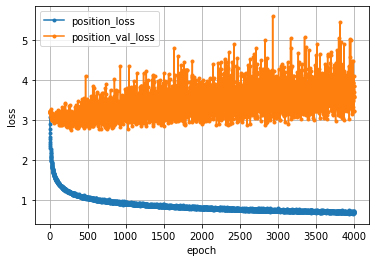

In [14]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

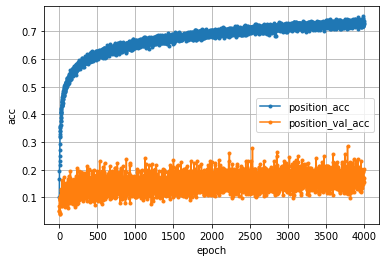

In [15]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [19]:
#次に大きい欠陥を推定できるのか

## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_train = []
size_y_train = []
position_x_train = []
position_y_train = []
size_x_test = []
size_y_test = []
position_x_test = []
position_y_test = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_test.append(data_array[1:-1])
    size_y_test.append(4)

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_test.append(data_array[1:-1])
    position_y_test.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_train = np.array(size_x_train, dtype=float)
size_y_train = np.array(size_y_train, dtype=int)
size_x_test = np.array(size_x_test, dtype=float)
size_y_test = np.array(size_y_test, dtype=int)
position_x_train = np.array(position_x_train, dtype=float)
position_y_train = np.array(position_y_train, dtype=int)
position_x_test = np.array(position_x_test, dtype=float)
position_y_test = np.array(position_y_test, dtype=int)

### データの加工
size_x_train = (size_x_train-no_hole_data)
size_x_test = (size_x_test-no_hole_data)
position_x_train = (position_x_train-no_hole_data)
position_x_test = (position_x_test-no_hole_data)
size_y_train = keras.utils.to_categorical(size_y_train, 6)
size_y_test = keras.utils.to_categorical(size_y_test, 6)
position_y_train = (position_y_train-1)
position_y_train = keras.utils.to_categorical(position_y_train, 25)
position_y_test = (position_y_test-1)
position_y_test = keras.utils.to_categorical(position_y_test, 25)

### reshape
size_x_train = size_x_train.reshape(8286, 50, 1)
size_x_test = size_x_test.reshape(1849, 50, 1)
position_x_train = position_x_train.reshape(8286, 50, 1)
position_x_test = position_x_test.reshape(1849, 50, 1)

In [20]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [21]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8286 samples, validate on 1849 samples
Epoch 1/1000
8286/8286 [==============================] - 0s 43us/step - loss: 1.4208 - accuracy: 0.2992 - val_loss: 1.1360 - val_accuracy: 0.8637
Epoch 2/1000
8286/8286 [==============================] - 0s 27us/step - loss: 1.2811 - accuracy: 0.4889 - val_loss: 0.9246 - val_accuracy: 0.8902
Epoch 3/1000
8286/8286 [==============================] - 0s 26us/step - loss: 1.2058 - accuracy: 0.5256 - val_loss: 0.6104 - val_accuracy: 0.9210
Epoch 4/1000
8286/8286 [==============================] - 0s 27us/step - loss: 1.1550 - accuracy: 0.5214 - val_loss: 0.6528 - val_accuracy: 0.9032
Epoch 5/1000
8286/8286 [==============================] - 0s 25us/step - loss: 1.1075 - accuracy: 0.5740 - val_loss: 0.5795 - val_accuracy: 0.9097
Epoch 6/1000
8286/8286 [==============================] - 0s 25us/step - loss: 1.0787 - accuracy: 0.5716 - val_loss: 0.5251 - val_accuracy: 0.9329
Epoch 7/1000
8286/8286 [==============================] - 0s 27us/step

8286/8286 [==============================] - 0s 26us/step - loss: 0.5129 - accuracy: 0.8832 - val_loss: 0.0453 - val_accuracy: 0.9827
Epoch 57/1000
8286/8286 [==============================] - 0s 27us/step - loss: 0.5037 - accuracy: 0.8878 - val_loss: 0.0685 - val_accuracy: 0.9767
Epoch 58/1000
8286/8286 [==============================] - 0s 30us/step - loss: 0.5020 - accuracy: 0.8850 - val_loss: 0.0625 - val_accuracy: 0.9789
Epoch 59/1000
8286/8286 [==============================] - 0s 27us/step - loss: 0.5127 - accuracy: 0.8691 - val_loss: 0.0676 - val_accuracy: 0.9778
Epoch 60/1000
8286/8286 [==============================] - 0s 27us/step - loss: 0.4990 - accuracy: 0.8874 - val_loss: 0.0386 - val_accuracy: 0.9859
Epoch 61/1000
8286/8286 [==============================] - 0s 27us/step - loss: 0.4862 - accuracy: 0.8932 - val_loss: 0.0354 - val_accuracy: 0.9859
Epoch 62/1000
8286/8286 [==============================] - 0s 28us/step - loss: 0.4854 - accuracy: 0.8909 - val_loss: 0.0315 -

8286/8286 [==============================] - 0s 31us/step - loss: 0.3577 - accuracy: 0.9219 - val_loss: 0.0118 - val_accuracy: 0.9962
Epoch 112/1000
8286/8286 [==============================] - 0s 29us/step - loss: 0.3544 - accuracy: 0.9212 - val_loss: 0.0141 - val_accuracy: 0.9962
Epoch 113/1000
8286/8286 [==============================] - 0s 26us/step - loss: 0.3590 - accuracy: 0.9175 - val_loss: 0.0149 - val_accuracy: 0.9957
Epoch 114/1000
8286/8286 [==============================] - 0s 30us/step - loss: 0.3574 - accuracy: 0.9211 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 115/1000
8286/8286 [==============================] - 0s 28us/step - loss: 0.3572 - accuracy: 0.9181 - val_loss: 0.0185 - val_accuracy: 0.9930
Epoch 116/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.3506 - accuracy: 0.9242 - val_loss: 0.0131 - val_accuracy: 0.9962
Epoch 117/1000
8286/8286 [==============================] - 0s 27us/step - loss: 0.3511 - accuracy: 0.9253 - val_loss: 0.

8286/8286 [==============================] - 0s 24us/step - loss: 0.2817 - accuracy: 0.9375 - val_loss: 0.0081 - val_accuracy: 0.9984
Epoch 167/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2865 - accuracy: 0.9366 - val_loss: 0.0087 - val_accuracy: 0.9973
Epoch 168/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2827 - accuracy: 0.9378 - val_loss: 0.0109 - val_accuracy: 0.9962
Epoch 169/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2830 - accuracy: 0.9372 - val_loss: 0.0083 - val_accuracy: 0.9968
Epoch 170/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2857 - accuracy: 0.9370 - val_loss: 0.0072 - val_accuracy: 0.9984
Epoch 171/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2748 - accuracy: 0.9388 - val_loss: 0.0094 - val_accuracy: 0.9978
Epoch 172/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2801 - accuracy: 0.9366 - val_loss: 0.

8286/8286 [==============================] - 0s 26us/step - loss: 0.2330 - accuracy: 0.9471 - val_loss: 0.0031 - val_accuracy: 0.9989
Epoch 222/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2354 - accuracy: 0.9464 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 223/1000
8286/8286 [==============================] - 0s 26us/step - loss: 0.2270 - accuracy: 0.9486 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 224/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2299 - accuracy: 0.9485 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 225/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2367 - accuracy: 0.9445 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 226/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2372 - accuracy: 0.9442 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 227/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2267 - accuracy: 0.9480 - val_loss: 0.

8286/8286 [==============================] - 0s 26us/step - loss: 0.1999 - accuracy: 0.9528 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 277/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.2046 - accuracy: 0.9514 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 278/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1938 - accuracy: 0.9541 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 279/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1895 - accuracy: 0.9564 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 280/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1981 - accuracy: 0.9540 - val_loss: 0.0030 - val_accuracy: 0.9989
Epoch 281/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1941 - accuracy: 0.9558 - val_loss: 8.1356e-04 - val_accuracy: 1.0000
Epoch 282/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1911 - accuracy: 0.9559 - val_loss

8286/8286 [==============================] - 0s 25us/step - loss: 0.1661 - accuracy: 0.9613 - val_loss: 5.8413e-04 - val_accuracy: 1.0000
Epoch 331/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1720 - accuracy: 0.9587 - val_loss: 6.1931e-04 - val_accuracy: 1.0000
Epoch 332/1000
8286/8286 [==============================] - 0s 26us/step - loss: 0.1681 - accuracy: 0.9593 - val_loss: 7.0797e-04 - val_accuracy: 1.0000
Epoch 333/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1676 - accuracy: 0.9591 - val_loss: 2.6916e-04 - val_accuracy: 1.0000
Epoch 334/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1674 - accuracy: 0.9597 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 335/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1642 - accuracy: 0.9598 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 336/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1662 - accuracy: 0.961

Epoch 384/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1449 - accuracy: 0.9648 - val_loss: 3.6586e-04 - val_accuracy: 1.0000
Epoch 385/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1417 - accuracy: 0.9649 - val_loss: 9.9680e-04 - val_accuracy: 1.0000
Epoch 386/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1466 - accuracy: 0.9640 - val_loss: 3.0571e-04 - val_accuracy: 1.0000
Epoch 387/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.1475 - accuracy: 0.9625 - val_loss: 8.1665e-04 - val_accuracy: 1.0000
Epoch 388/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1410 - accuracy: 0.9651 - val_loss: 1.8110e-04 - val_accuracy: 1.0000
Epoch 389/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.1461 - accuracy: 0.9640 - val_loss: 2.5750e-04 - val_accuracy: 1.0000
Epoch 390/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0

8286/8286 [==============================] - 0s 25us/step - loss: 0.1272 - accuracy: 0.9678 - val_loss: 5.5819e-04 - val_accuracy: 1.0000
Epoch 438/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1259 - accuracy: 0.9677 - val_loss: 1.8025e-04 - val_accuracy: 1.0000
Epoch 439/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.1272 - accuracy: 0.9678 - val_loss: 5.9532e-04 - val_accuracy: 1.0000
Epoch 440/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1286 - accuracy: 0.9679 - val_loss: 2.4582e-04 - val_accuracy: 1.0000
Epoch 441/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1317 - accuracy: 0.9669 - val_loss: 6.7132e-04 - val_accuracy: 1.0000
Epoch 442/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1286 - accuracy: 0.9668 - val_loss: 2.3249e-04 - val_accuracy: 1.0000
Epoch 443/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1268 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.1139 - accuracy: 0.9710 - val_loss: 9.7776e-05 - val_accuracy: 1.0000
Epoch 491/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1101 - accuracy: 0.9712 - val_loss: 1.5543e-04 - val_accuracy: 1.0000
Epoch 492/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1121 - accuracy: 0.9708 - val_loss: 5.0195e-04 - val_accuracy: 1.0000
Epoch 493/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1162 - accuracy: 0.9702 - val_loss: 1.2765e-04 - val_accuracy: 1.0000
Epoch 494/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1126 - accuracy: 0.9721 - val_loss: 2.5791e-04 - val_accuracy: 1.0000
Epoch 495/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1121 - accuracy: 0.9706 - val_loss: 2.1487e-04 - val_accuracy: 1.0000
Epoch 496/1000
8286/8286 [==============================] - 0s 27us/step - loss: 0.1145 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.1029 - accuracy: 0.9743 - val_loss: 8.0351e-05 - val_accuracy: 1.0000
Epoch 544/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0976 - accuracy: 0.9760 - val_loss: 1.0647e-04 - val_accuracy: 1.0000
Epoch 545/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.1138 - accuracy: 0.9686 - val_loss: 5.3038e-05 - val_accuracy: 1.0000
Epoch 546/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.1101 - accuracy: 0.9709 - val_loss: 2.1404e-05 - val_accuracy: 1.0000
Epoch 547/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.1049 - accuracy: 0.9747 - val_loss: 8.7962e-05 - val_accuracy: 1.0000
Epoch 548/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0972 - accuracy: 0.9743 - val_loss: 5.7675e-05 - val_accuracy: 1.0000
Epoch 549/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0992 - accurac

8286/8286 [==============================] - 0s 26us/step - loss: 0.0911 - accuracy: 0.9761 - val_loss: 2.0155e-05 - val_accuracy: 1.0000
Epoch 597/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0882 - accuracy: 0.9777 - val_loss: 6.3856e-05 - val_accuracy: 1.0000
Epoch 598/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0982 - accuracy: 0.9733 - val_loss: 9.0583e-05 - val_accuracy: 1.0000
Epoch 599/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0939 - accuracy: 0.9751 - val_loss: 4.8566e-05 - val_accuracy: 1.0000
Epoch 600/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0925 - accuracy: 0.9761 - val_loss: 5.8107e-05 - val_accuracy: 1.0000
Epoch 601/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0902 - accuracy: 0.9756 - val_loss: 4.2926e-05 - val_accuracy: 1.0000
Epoch 602/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0860 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.0927 - accuracy: 0.9753 - val_loss: 2.7787e-05 - val_accuracy: 1.0000
Epoch 650/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0820 - accuracy: 0.9772 - val_loss: 4.6973e-05 - val_accuracy: 1.0000
Epoch 651/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0891 - accuracy: 0.9757 - val_loss: 2.5914e-05 - val_accuracy: 1.0000
Epoch 652/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0807 - accuracy: 0.9779 - val_loss: 2.1329e-05 - val_accuracy: 1.0000
Epoch 653/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0846 - accuracy: 0.9778 - val_loss: 2.7483e-05 - val_accuracy: 1.0000
Epoch 654/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0821 - accuracy: 0.9785 - val_loss: 9.5728e-06 - val_accuracy: 1.0000
Epoch 655/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0831 - accurac

8286/8286 [==============================] - 0s 24us/step - loss: 0.0862 - accuracy: 0.9756 - val_loss: 2.9587e-05 - val_accuracy: 1.0000
Epoch 703/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0753 - accuracy: 0.9786 - val_loss: 2.1590e-05 - val_accuracy: 1.0000
Epoch 704/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0867 - accuracy: 0.9763 - val_loss: 4.7971e-06 - val_accuracy: 1.0000
Epoch 705/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0755 - accuracy: 0.9784 - val_loss: 9.1356e-06 - val_accuracy: 1.0000
Epoch 706/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0731 - accuracy: 0.9797 - val_loss: 5.7434e-06 - val_accuracy: 1.0000
Epoch 707/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0795 - accuracy: 0.9769 - val_loss: 2.6466e-05 - val_accuracy: 1.0000
Epoch 708/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0718 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.0773 - accuracy: 0.9782 - val_loss: 1.7131e-05 - val_accuracy: 1.0000
Epoch 756/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0700 - accuracy: 0.9811 - val_loss: 1.0567e-05 - val_accuracy: 1.0000
Epoch 757/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0668 - accuracy: 0.9815 - val_loss: 1.8129e-06 - val_accuracy: 1.0000
Epoch 758/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0690 - accuracy: 0.9808 - val_loss: 2.7706e-05 - val_accuracy: 1.0000
Epoch 759/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0675 - accuracy: 0.9818 - val_loss: 4.1417e-06 - val_accuracy: 1.0000
Epoch 760/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0693 - accuracy: 0.9795 - val_loss: 8.3007e-06 - val_accuracy: 1.0000
Epoch 761/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0661 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 7.1266e-06 - val_accuracy: 1.0000
Epoch 809/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0666 - accuracy: 0.9807 - val_loss: 3.7876e-06 - val_accuracy: 1.0000
Epoch 810/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0612 - accuracy: 0.9836 - val_loss: 2.4618e-06 - val_accuracy: 1.0000
Epoch 811/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0624 - accuracy: 0.9853 - val_loss: 1.2562e-05 - val_accuracy: 1.0000
Epoch 812/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0644 - accuracy: 0.9826 - val_loss: 8.8179e-06 - val_accuracy: 1.0000
Epoch 813/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0669 - accuracy: 0.9807 - val_loss: 1.8143e-05 - val_accuracy: 1.0000
Epoch 814/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0650 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.0629 - accuracy: 0.9829 - val_loss: 4.7153e-06 - val_accuracy: 1.0000
Epoch 862/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 7.3247e-06 - val_accuracy: 1.0000
Epoch 863/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 1.4092e-06 - val_accuracy: 1.0000
Epoch 864/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0612 - accuracy: 0.9813 - val_loss: 6.1025e-06 - val_accuracy: 1.0000
Epoch 865/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0621 - accuracy: 0.9826 - val_loss: 5.5160e-06 - val_accuracy: 1.0000
Epoch 866/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0615 - accuracy: 0.9827 - val_loss: 1.1679e-06 - val_accuracy: 1.0000
Epoch 867/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0651 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 4.4799e-06 - val_accuracy: 1.0000
Epoch 915/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0605 - accuracy: 0.9837 - val_loss: 7.9504e-07 - val_accuracy: 1.0000
Epoch 916/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0519 - accuracy: 0.9854 - val_loss: 6.6604e-07 - val_accuracy: 1.0000
Epoch 917/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0544 - accuracy: 0.9853 - val_loss: 3.2838e-06 - val_accuracy: 1.0000
Epoch 918/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0502 - accuracy: 0.9866 - val_loss: 8.8137e-07 - val_accuracy: 1.0000
Epoch 919/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0526 - accuracy: 0.9849 - val_loss: 8.6937e-07 - val_accuracy: 1.0000
Epoch 920/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0538 - accurac

8286/8286 [==============================] - 0s 25us/step - loss: 0.0563 - accuracy: 0.9852 - val_loss: 5.3336e-07 - val_accuracy: 1.0000
Epoch 968/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 6.9389e-07 - val_accuracy: 1.0000
Epoch 969/1000
8286/8286 [==============================] - 0s 26us/step - loss: 0.0529 - accuracy: 0.9848 - val_loss: 1.1258e-06 - val_accuracy: 1.0000
Epoch 970/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 7.2085e-07 - val_accuracy: 1.0000
Epoch 971/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0563 - accuracy: 0.9843 - val_loss: 7.1794e-07 - val_accuracy: 1.0000
Epoch 972/1000
8286/8286 [==============================] - 0s 25us/step - loss: 0.0581 - accuracy: 0.9832 - val_loss: 1.1934e-05 - val_accuracy: 1.0000
Epoch 973/1000
8286/8286 [==============================] - 0s 24us/step - loss: 0.0532 - accurac

In [22]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

1849/1849 [==============================] - 0s 28us/step
Test loss: 1.7614237596544717e-06
Test accuracy: 1.0


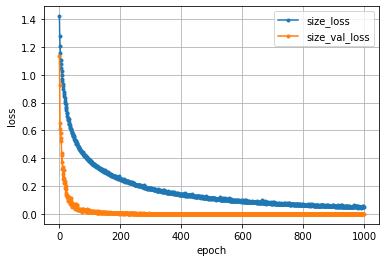

In [23]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

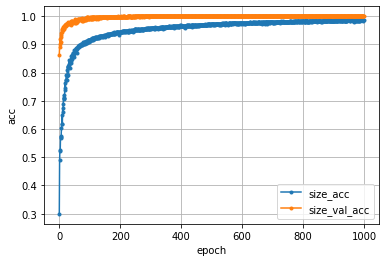

In [24]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [25]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [26]:
# 学習(位置)
epochs = 4000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8286 samples, validate on 1849 samples
Epoch 1/4000
8286/8286 [==============================] - 0s 54us/step - loss: 3.1533 - accuracy: 0.0816 - val_loss: 2.8912 - val_accuracy: 0.1520
Epoch 2/4000
8286/8286 [==============================] - 0s 34us/step - loss: 3.0609 - accuracy: 0.1175 - val_loss: 2.7425 - val_accuracy: 0.1931
Epoch 3/4000
8286/8286 [==============================] - 0s 36us/step - loss: 2.9963 - accuracy: 0.1311 - val_loss: 2.6498 - val_accuracy: 0.1633
Epoch 4/4000
8286/8286 [==============================] - 0s 35us/step - loss: 2.9305 - accuracy: 0.1533 - val_loss: 2.5263 - val_accuracy: 0.2044
Epoch 5/4000
8286/8286 [==============================] - 0s 30us/step - loss: 2.8795 - accuracy: 0.1611 - val_loss: 2.4740 - val_accuracy: 0.2055
Epoch 6/4000
8286/8286 [==============================] - 0s 28us/step - loss: 2.8304 - accuracy: 0.1696 - val_loss: 2.5000 - val_accuracy: 0.2001
Epoch 7/4000
8286/8286 [==============================] - 0s 28us/step

8286/8286 [==============================] - 0s 29us/step - loss: 2.1457 - accuracy: 0.3642 - val_loss: 1.6633 - val_accuracy: 0.4954
Epoch 57/4000
8286/8286 [==============================] - 0s 29us/step - loss: 2.1691 - accuracy: 0.3436 - val_loss: 1.6895 - val_accuracy: 0.4689
Epoch 58/4000
8286/8286 [==============================] - 0s 29us/step - loss: 2.1508 - accuracy: 0.3576 - val_loss: 1.6736 - val_accuracy: 0.4965
Epoch 59/4000
8286/8286 [==============================] - 0s 29us/step - loss: 2.1558 - accuracy: 0.3540 - val_loss: 1.7492 - val_accuracy: 0.4283
Epoch 60/4000
8286/8286 [==============================] - 0s 30us/step - loss: 2.1430 - accuracy: 0.3530 - val_loss: 1.7064 - val_accuracy: 0.4965
Epoch 61/4000
8286/8286 [==============================] - 0s 29us/step - loss: 2.1320 - accuracy: 0.3505 - val_loss: 1.7698 - val_accuracy: 0.4965
Epoch 62/4000
8286/8286 [==============================] - 0s 30us/step - loss: 2.1242 - accuracy: 0.3605 - val_loss: 1.6610 -

8286/8286 [==============================] - 0s 30us/step - loss: 1.9624 - accuracy: 0.3874 - val_loss: 1.7154 - val_accuracy: 0.5046
Epoch 112/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.9747 - accuracy: 0.3979 - val_loss: 1.6650 - val_accuracy: 0.4873
Epoch 113/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.9450 - accuracy: 0.4088 - val_loss: 1.6524 - val_accuracy: 0.4754
Epoch 114/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.9689 - accuracy: 0.3907 - val_loss: 1.7319 - val_accuracy: 0.4749
Epoch 115/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.9582 - accuracy: 0.3919 - val_loss: 1.7401 - val_accuracy: 0.5133
Epoch 116/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.9494 - accuracy: 0.3938 - val_loss: 1.7040 - val_accuracy: 0.5105
Epoch 117/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.9480 - accuracy: 0.3980 - val_loss: 1.

8286/8286 [==============================] - 0s 31us/step - loss: 1.8547 - accuracy: 0.4183 - val_loss: 1.6620 - val_accuracy: 0.5495
Epoch 167/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.8745 - accuracy: 0.4146 - val_loss: 1.7021 - val_accuracy: 0.5311
Epoch 168/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.8746 - accuracy: 0.4177 - val_loss: 1.7034 - val_accuracy: 0.5387
Epoch 169/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.8578 - accuracy: 0.4200 - val_loss: 1.6860 - val_accuracy: 0.5003
Epoch 170/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.8701 - accuracy: 0.4176 - val_loss: 1.7247 - val_accuracy: 0.5381
Epoch 171/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.8548 - accuracy: 0.4185 - val_loss: 1.6769 - val_accuracy: 0.5365
Epoch 172/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.8596 - accuracy: 0.4132 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.8045 - accuracy: 0.4275 - val_loss: 1.7081 - val_accuracy: 0.5457
Epoch 222/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.8105 - accuracy: 0.4288 - val_loss: 1.8194 - val_accuracy: 0.5197
Epoch 223/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.7898 - accuracy: 0.4310 - val_loss: 1.7085 - val_accuracy: 0.5138
Epoch 224/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.8056 - accuracy: 0.4304 - val_loss: 1.7243 - val_accuracy: 0.5668
Epoch 225/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.7752 - accuracy: 0.4442 - val_loss: 1.7068 - val_accuracy: 0.5673
Epoch 226/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.7861 - accuracy: 0.4319 - val_loss: 1.8005 - val_accuracy: 0.5262
Epoch 227/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.7776 - accuracy: 0.4397 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.7382 - accuracy: 0.4380 - val_loss: 1.7078 - val_accuracy: 0.5700
Epoch 277/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.7259 - accuracy: 0.4428 - val_loss: 1.9035 - val_accuracy: 0.5381
Epoch 278/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.7443 - accuracy: 0.4421 - val_loss: 1.9238 - val_accuracy: 0.4857
Epoch 279/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.7385 - accuracy: 0.4528 - val_loss: 1.8428 - val_accuracy: 0.5376
Epoch 280/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.7568 - accuracy: 0.4434 - val_loss: 1.7449 - val_accuracy: 0.5500
Epoch 281/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.7465 - accuracy: 0.4323 - val_loss: 1.8292 - val_accuracy: 0.5262
Epoch 282/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.7224 - accuracy: 0.4552 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.6790 - accuracy: 0.4651 - val_loss: 1.9849 - val_accuracy: 0.4911
Epoch 332/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6992 - accuracy: 0.4599 - val_loss: 1.9100 - val_accuracy: 0.5446
Epoch 333/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6941 - accuracy: 0.4569 - val_loss: 1.9059 - val_accuracy: 0.5392
Epoch 334/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.6781 - accuracy: 0.4616 - val_loss: 1.8170 - val_accuracy: 0.5387
Epoch 335/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.7032 - accuracy: 0.4471 - val_loss: 1.8107 - val_accuracy: 0.5782
Epoch 336/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.6765 - accuracy: 0.4580 - val_loss: 1.7463 - val_accuracy: 0.5462
Epoch 337/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6800 - accuracy: 0.4610 - val_loss: 1.

8286/8286 [==============================] - 0s 29us/step - loss: 1.6425 - accuracy: 0.4756 - val_loss: 1.8101 - val_accuracy: 0.5619
Epoch 387/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6647 - accuracy: 0.4529 - val_loss: 1.8074 - val_accuracy: 0.5381
Epoch 388/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6318 - accuracy: 0.4732 - val_loss: 1.7688 - val_accuracy: 0.5890
Epoch 389/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6466 - accuracy: 0.4697 - val_loss: 1.6805 - val_accuracy: 0.5803
Epoch 390/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.6083 - accuracy: 0.4878 - val_loss: 1.7669 - val_accuracy: 0.5289
Epoch 391/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6327 - accuracy: 0.4591 - val_loss: 1.8924 - val_accuracy: 0.5257
Epoch 392/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6389 - accuracy: 0.4756 - val_loss: 1.

8286/8286 [==============================] - 0s 29us/step - loss: 1.6306 - accuracy: 0.4702 - val_loss: 1.7667 - val_accuracy: 0.5414
Epoch 442/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6198 - accuracy: 0.4664 - val_loss: 1.8396 - val_accuracy: 0.5284
Epoch 443/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5995 - accuracy: 0.4704 - val_loss: 1.7733 - val_accuracy: 0.5603
Epoch 444/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5977 - accuracy: 0.4785 - val_loss: 1.7985 - val_accuracy: 0.5262
Epoch 445/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6138 - accuracy: 0.4760 - val_loss: 1.8208 - val_accuracy: 0.5306
Epoch 446/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6089 - accuracy: 0.4689 - val_loss: 1.8402 - val_accuracy: 0.5717
Epoch 447/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.6257 - accuracy: 0.4655 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.5783 - accuracy: 0.4796 - val_loss: 1.7696 - val_accuracy: 0.5733
Epoch 497/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5609 - accuracy: 0.4836 - val_loss: 1.7536 - val_accuracy: 0.5673
Epoch 498/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5594 - accuracy: 0.4882 - val_loss: 1.8207 - val_accuracy: 0.5544
Epoch 499/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5539 - accuracy: 0.4811 - val_loss: 1.8835 - val_accuracy: 0.5279
Epoch 500/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5625 - accuracy: 0.4896 - val_loss: 1.8601 - val_accuracy: 0.5625
Epoch 501/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5653 - accuracy: 0.4931 - val_loss: 1.7893 - val_accuracy: 0.5571
Epoch 502/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5905 - accuracy: 0.4703 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.5504 - accuracy: 0.4888 - val_loss: 1.8003 - val_accuracy: 0.5398
Epoch 552/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.5575 - accuracy: 0.4789 - val_loss: 1.8503 - val_accuracy: 0.5251
Epoch 553/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5384 - accuracy: 0.4902 - val_loss: 1.6648 - val_accuracy: 0.5846
Epoch 554/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5551 - accuracy: 0.4905 - val_loss: 1.7824 - val_accuracy: 0.5381
Epoch 555/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5283 - accuracy: 0.4976 - val_loss: 1.6505 - val_accuracy: 0.5706
Epoch 556/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5471 - accuracy: 0.4849 - val_loss: 1.8182 - val_accuracy: 0.5370
Epoch 557/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5334 - accuracy: 0.4894 - val_loss: 1.

8286/8286 [==============================] - 0s 29us/step - loss: 1.5198 - accuracy: 0.4925 - val_loss: 1.7802 - val_accuracy: 0.5435
Epoch 607/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5098 - accuracy: 0.4906 - val_loss: 1.6901 - val_accuracy: 0.5592
Epoch 608/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5094 - accuracy: 0.4954 - val_loss: 1.7750 - val_accuracy: 0.5343
Epoch 609/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5262 - accuracy: 0.4913 - val_loss: 1.8291 - val_accuracy: 0.5581
Epoch 610/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5147 - accuracy: 0.4987 - val_loss: 1.6672 - val_accuracy: 0.5857
Epoch 611/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5290 - accuracy: 0.4859 - val_loss: 1.7007 - val_accuracy: 0.5706
Epoch 612/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5105 - accuracy: 0.4905 - val_loss: 1.

8286/8286 [==============================] - 0s 29us/step - loss: 1.5249 - accuracy: 0.4841 - val_loss: 1.8172 - val_accuracy: 0.5516
Epoch 662/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.5013 - accuracy: 0.4922 - val_loss: 1.6821 - val_accuracy: 0.5765
Epoch 663/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4873 - accuracy: 0.5051 - val_loss: 1.6791 - val_accuracy: 0.5495
Epoch 664/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4960 - accuracy: 0.4954 - val_loss: 1.7684 - val_accuracy: 0.5722
Epoch 665/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4971 - accuracy: 0.4913 - val_loss: 1.8456 - val_accuracy: 0.5419
Epoch 666/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.5013 - accuracy: 0.4961 - val_loss: 1.6523 - val_accuracy: 0.5722
Epoch 667/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4921 - accuracy: 0.4938 - val_loss: 1.

8286/8286 [==============================] - 0s 29us/step - loss: 1.4447 - accuracy: 0.5152 - val_loss: 1.7722 - val_accuracy: 0.5814
Epoch 717/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4603 - accuracy: 0.5126 - val_loss: 1.8008 - val_accuracy: 0.5560
Epoch 718/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4898 - accuracy: 0.5045 - val_loss: 1.7025 - val_accuracy: 0.5652
Epoch 719/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.4531 - accuracy: 0.5134 - val_loss: 1.7560 - val_accuracy: 0.5733
Epoch 720/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4598 - accuracy: 0.5152 - val_loss: 1.6573 - val_accuracy: 0.5771
Epoch 721/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4795 - accuracy: 0.4981 - val_loss: 1.6758 - val_accuracy: 0.5506
Epoch 722/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4527 - accuracy: 0.5139 - val_loss: 1.

8286/8286 [==============================] - 0s 31us/step - loss: 1.4145 - accuracy: 0.5257 - val_loss: 1.6425 - val_accuracy: 0.5830
Epoch 772/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4331 - accuracy: 0.5110 - val_loss: 1.6715 - val_accuracy: 0.5473
Epoch 773/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4360 - accuracy: 0.5165 - val_loss: 1.8932 - val_accuracy: 0.5489
Epoch 774/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4326 - accuracy: 0.5197 - val_loss: 1.6793 - val_accuracy: 0.5776
Epoch 775/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4660 - accuracy: 0.4959 - val_loss: 1.7437 - val_accuracy: 0.5544
Epoch 776/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4324 - accuracy: 0.5115 - val_loss: 1.6231 - val_accuracy: 0.5917
Epoch 777/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4335 - accuracy: 0.5206 - val_loss: 1.

8286/8286 [==============================] - 0s 34us/step - loss: 1.4177 - accuracy: 0.5144 - val_loss: 1.7752 - val_accuracy: 0.5841
Epoch 827/4000
8286/8286 [==============================] - 0s 33us/step - loss: 1.4311 - accuracy: 0.5121 - val_loss: 1.6159 - val_accuracy: 0.6068
Epoch 828/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4390 - accuracy: 0.5208 - val_loss: 1.7478 - val_accuracy: 0.5711
Epoch 829/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4389 - accuracy: 0.5157 - val_loss: 1.8070 - val_accuracy: 0.5473
Epoch 830/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4069 - accuracy: 0.5221 - val_loss: 1.6667 - val_accuracy: 0.5495
Epoch 831/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4278 - accuracy: 0.5118 - val_loss: 1.7574 - val_accuracy: 0.5846
Epoch 832/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4530 - accuracy: 0.4989 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.4074 - accuracy: 0.5144 - val_loss: 1.7157 - val_accuracy: 0.5760
Epoch 882/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.4107 - accuracy: 0.5227 - val_loss: 1.6964 - val_accuracy: 0.5765
Epoch 883/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3988 - accuracy: 0.5251 - val_loss: 1.7864 - val_accuracy: 0.5749
Epoch 884/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4009 - accuracy: 0.5206 - val_loss: 1.8096 - val_accuracy: 0.5571
Epoch 885/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4049 - accuracy: 0.5189 - val_loss: 1.5445 - val_accuracy: 0.5706
Epoch 886/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.3902 - accuracy: 0.5243 - val_loss: 1.6206 - val_accuracy: 0.5771
Epoch 887/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3831 - accuracy: 0.5334 - val_loss: 1.

8286/8286 [==============================] - 0s 30us/step - loss: 1.3849 - accuracy: 0.5249 - val_loss: 1.8222 - val_accuracy: 0.5809
Epoch 937/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3672 - accuracy: 0.5296 - val_loss: 1.7002 - val_accuracy: 0.5830
Epoch 938/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3849 - accuracy: 0.5199 - val_loss: 1.7367 - val_accuracy: 0.5684
Epoch 939/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3928 - accuracy: 0.5198 - val_loss: 1.7516 - val_accuracy: 0.5538
Epoch 940/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.4142 - accuracy: 0.5119 - val_loss: 1.5757 - val_accuracy: 0.6209
Epoch 941/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3619 - accuracy: 0.5377 - val_loss: 1.5688 - val_accuracy: 0.5863
Epoch 942/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3778 - accuracy: 0.5303 - val_loss: 1.

8286/8286 [==============================] - 0s 32us/step - loss: 1.3576 - accuracy: 0.5343 - val_loss: 1.7054 - val_accuracy: 0.6036
Epoch 992/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.3617 - accuracy: 0.5380 - val_loss: 1.6584 - val_accuracy: 0.6052
Epoch 993/4000
8286/8286 [==============================] - 0s 35us/step - loss: 1.3928 - accuracy: 0.5161 - val_loss: 1.8436 - val_accuracy: 0.5679
Epoch 994/4000
8286/8286 [==============================] - 0s 36us/step - loss: 1.3720 - accuracy: 0.5276 - val_loss: 1.6826 - val_accuracy: 0.5771
Epoch 995/4000
8286/8286 [==============================] - 0s 33us/step - loss: 1.3582 - accuracy: 0.5334 - val_loss: 1.5749 - val_accuracy: 0.5900
Epoch 996/4000
8286/8286 [==============================] - 0s 32us/step - loss: 1.3635 - accuracy: 0.5281 - val_loss: 1.6771 - val_accuracy: 0.5922
Epoch 997/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.3604 - accuracy: 0.5369 - val_loss: 1.

Epoch 1046/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3576 - accuracy: 0.5319 - val_loss: 1.6380 - val_accuracy: 0.5836
Epoch 1047/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3407 - accuracy: 0.5473 - val_loss: 1.7257 - val_accuracy: 0.5863
Epoch 1048/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3370 - accuracy: 0.5379 - val_loss: 1.6436 - val_accuracy: 0.5982
Epoch 1049/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.3625 - accuracy: 0.5322 - val_loss: 1.6518 - val_accuracy: 0.5965
Epoch 1050/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3328 - accuracy: 0.5448 - val_loss: 1.7797 - val_accuracy: 0.5852
Epoch 1051/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3302 - accuracy: 0.5399 - val_loss: 1.6083 - val_accuracy: 0.6106
Epoch 1052/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3457 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.3279 - accuracy: 0.5384 - val_loss: 1.5387 - val_accuracy: 0.6003
Epoch 1101/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3156 - accuracy: 0.5461 - val_loss: 1.6737 - val_accuracy: 0.5933
Epoch 1102/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3544 - accuracy: 0.5294 - val_loss: 1.4170 - val_accuracy: 0.6322
Epoch 1103/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3456 - accuracy: 0.5344 - val_loss: 1.4879 - val_accuracy: 0.6009
Epoch 1104/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3382 - accuracy: 0.5427 - val_loss: 1.6135 - val_accuracy: 0.5928
Epoch 1105/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3575 - accuracy: 0.5280 - val_loss: 1.6024 - val_accuracy: 0.6057
Epoch 1106/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3483 - accuracy: 0.5366 - val_lo

Epoch 1155/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3015 - accuracy: 0.5523 - val_loss: 1.6180 - val_accuracy: 0.5890
Epoch 1156/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3443 - accuracy: 0.5296 - val_loss: 1.7613 - val_accuracy: 0.5717
Epoch 1157/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3223 - accuracy: 0.5437 - val_loss: 1.7240 - val_accuracy: 0.5982
Epoch 1158/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3216 - accuracy: 0.5406 - val_loss: 1.6615 - val_accuracy: 0.5906
Epoch 1159/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3211 - accuracy: 0.5399 - val_loss: 1.5657 - val_accuracy: 0.6187
Epoch 1160/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3072 - accuracy: 0.5476 - val_loss: 1.6610 - val_accuracy: 0.5965
Epoch 1161/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3135 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.3221 - accuracy: 0.5327 - val_loss: 1.6378 - val_accuracy: 0.6160
Epoch 1210/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3172 - accuracy: 0.5490 - val_loss: 1.5518 - val_accuracy: 0.6176
Epoch 1211/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3271 - accuracy: 0.5459 - val_loss: 1.6316 - val_accuracy: 0.6063
Epoch 1212/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.2953 - accuracy: 0.5537 - val_loss: 1.5920 - val_accuracy: 0.6025
Epoch 1213/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3129 - accuracy: 0.5395 - val_loss: 1.5461 - val_accuracy: 0.6101
Epoch 1214/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3043 - accuracy: 0.5477 - val_loss: 1.6474 - val_accuracy: 0.5971
Epoch 1215/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3370 - accuracy: 0.5322 - val_lo

Epoch 1264/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3093 - accuracy: 0.5433 - val_loss: 1.7329 - val_accuracy: 0.5998
Epoch 1265/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3056 - accuracy: 0.5484 - val_loss: 1.6177 - val_accuracy: 0.5906
Epoch 1266/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2883 - accuracy: 0.5489 - val_loss: 1.5690 - val_accuracy: 0.6133
Epoch 1267/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3041 - accuracy: 0.5552 - val_loss: 1.5798 - val_accuracy: 0.6101
Epoch 1268/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3020 - accuracy: 0.5521 - val_loss: 1.6498 - val_accuracy: 0.6079
Epoch 1269/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3055 - accuracy: 0.5527 - val_loss: 1.6639 - val_accuracy: 0.6057
Epoch 1270/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2951 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.2846 - accuracy: 0.5543 - val_loss: 1.7457 - val_accuracy: 0.5700
Epoch 1319/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.3133 - accuracy: 0.5466 - val_loss: 1.5743 - val_accuracy: 0.6203
Epoch 1320/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3140 - accuracy: 0.5413 - val_loss: 1.6600 - val_accuracy: 0.6030
Epoch 1321/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2874 - accuracy: 0.5484 - val_loss: 1.6029 - val_accuracy: 0.6144
Epoch 1322/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2870 - accuracy: 0.5497 - val_loss: 1.6412 - val_accuracy: 0.5960
Epoch 1323/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.3022 - accuracy: 0.5473 - val_loss: 1.7094 - val_accuracy: 0.5776
Epoch 1324/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2918 - accuracy: 0.5445 - val_lo

Epoch 1373/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2815 - accuracy: 0.5638 - val_loss: 1.6438 - val_accuracy: 0.5868
Epoch 1374/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2789 - accuracy: 0.5532 - val_loss: 1.6924 - val_accuracy: 0.5949
Epoch 1375/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2724 - accuracy: 0.5490 - val_loss: 1.6334 - val_accuracy: 0.6128
Epoch 1376/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2668 - accuracy: 0.5594 - val_loss: 1.6242 - val_accuracy: 0.6063
Epoch 1377/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2753 - accuracy: 0.5527 - val_loss: 1.6761 - val_accuracy: 0.5663
Epoch 1378/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2536 - accuracy: 0.5683 - val_loss: 1.7136 - val_accuracy: 0.5992
Epoch 1379/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2775 - accuracy:

8286/8286 [==============================] - 0s 29us/step - loss: 1.2745 - accuracy: 0.5566 - val_loss: 1.6468 - val_accuracy: 0.6095
Epoch 1428/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2752 - accuracy: 0.5531 - val_loss: 1.6830 - val_accuracy: 0.5911
Epoch 1429/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2585 - accuracy: 0.5615 - val_loss: 1.6234 - val_accuracy: 0.5987
Epoch 1430/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2842 - accuracy: 0.5473 - val_loss: 1.6745 - val_accuracy: 0.5911
Epoch 1431/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2733 - accuracy: 0.5613 - val_loss: 1.6707 - val_accuracy: 0.5960
Epoch 1432/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.2583 - accuracy: 0.5634 - val_loss: 1.7548 - val_accuracy: 0.6025
Epoch 1433/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2599 - accuracy: 0.5630 - val_lo

Epoch 1482/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2732 - accuracy: 0.5539 - val_loss: 1.6515 - val_accuracy: 0.5971
Epoch 1483/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.2480 - accuracy: 0.5683 - val_loss: 1.7138 - val_accuracy: 0.5938
Epoch 1484/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2344 - accuracy: 0.5694 - val_loss: 1.6497 - val_accuracy: 0.6117
Epoch 1485/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2632 - accuracy: 0.5567 - val_loss: 1.6481 - val_accuracy: 0.6014
Epoch 1486/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2609 - accuracy: 0.5548 - val_loss: 1.6375 - val_accuracy: 0.6063
Epoch 1487/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2660 - accuracy: 0.5553 - val_loss: 1.7154 - val_accuracy: 0.5960
Epoch 1488/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2628 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.2754 - accuracy: 0.5527 - val_loss: 1.8372 - val_accuracy: 0.5863
Epoch 1537/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.2382 - accuracy: 0.5617 - val_loss: 1.6795 - val_accuracy: 0.5998
Epoch 1538/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2537 - accuracy: 0.5579 - val_loss: 1.6503 - val_accuracy: 0.6057
Epoch 1539/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2791 - accuracy: 0.5463 - val_loss: 1.6625 - val_accuracy: 0.5944
Epoch 1540/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2768 - accuracy: 0.5612 - val_loss: 1.6706 - val_accuracy: 0.6111
Epoch 1541/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2413 - accuracy: 0.5679 - val_loss: 1.6761 - val_accuracy: 0.6003
Epoch 1542/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2528 - accuracy: 0.5602 - val_lo

Epoch 1591/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2580 - accuracy: 0.5636 - val_loss: 1.6395 - val_accuracy: 0.5955
Epoch 1592/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2668 - accuracy: 0.5537 - val_loss: 1.7578 - val_accuracy: 0.5798
Epoch 1593/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2453 - accuracy: 0.5652 - val_loss: 1.7009 - val_accuracy: 0.6247
Epoch 1594/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2186 - accuracy: 0.5787 - val_loss: 1.6299 - val_accuracy: 0.6090
Epoch 1595/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2329 - accuracy: 0.5700 - val_loss: 1.6103 - val_accuracy: 0.6155
Epoch 1596/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2556 - accuracy: 0.5552 - val_loss: 1.6507 - val_accuracy: 0.5992
Epoch 1597/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2458 - accuracy:

8286/8286 [==============================] - 0s 31us/step - loss: 1.2536 - accuracy: 0.5542 - val_loss: 1.6501 - val_accuracy: 0.6176
Epoch 1646/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.2203 - accuracy: 0.5745 - val_loss: 1.7712 - val_accuracy: 0.5890
Epoch 1647/4000
8286/8286 [==============================] - 0s 42us/step - loss: 1.2444 - accuracy: 0.5603 - val_loss: 1.5608 - val_accuracy: 0.6203
Epoch 1648/4000
8286/8286 [==============================] - 0s 39us/step - loss: 1.2305 - accuracy: 0.5635 - val_loss: 1.5968 - val_accuracy: 0.6122
Epoch 1649/4000
8286/8286 [==============================] - 0s 39us/step - loss: 1.2539 - accuracy: 0.5587 - val_loss: 1.7320 - val_accuracy: 0.5890
Epoch 1650/4000
8286/8286 [==============================] - 0s 41us/step - loss: 1.2456 - accuracy: 0.5609 - val_loss: 1.6639 - val_accuracy: 0.5922
Epoch 1651/4000
8286/8286 [==============================] - 0s 39us/step - loss: 1.2364 - accuracy: 0.5587 - val_lo

Epoch 1700/4000
8286/8286 [==============================] - 0s 35us/step - loss: 1.2418 - accuracy: 0.5584 - val_loss: 1.8156 - val_accuracy: 0.5863
Epoch 1701/4000
8286/8286 [==============================] - 0s 38us/step - loss: 1.2343 - accuracy: 0.5531 - val_loss: 1.6083 - val_accuracy: 0.6241
Epoch 1702/4000
8286/8286 [==============================] - 0s 36us/step - loss: 1.2185 - accuracy: 0.5714 - val_loss: 1.7251 - val_accuracy: 0.6155
Epoch 1703/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.2165 - accuracy: 0.5784 - val_loss: 1.7009 - val_accuracy: 0.5998
Epoch 1704/4000
8286/8286 [==============================] - 0s 36us/step - loss: 1.2329 - accuracy: 0.5635 - val_loss: 1.6934 - val_accuracy: 0.6214
Epoch 1705/4000
8286/8286 [==============================] - 0s 39us/step - loss: 1.2161 - accuracy: 0.5745 - val_loss: 1.5406 - val_accuracy: 0.6187
Epoch 1706/4000
8286/8286 [==============================] - 0s 41us/step - loss: 1.2222 - accuracy:

8286/8286 [==============================] - 0s 34us/step - loss: 1.2225 - accuracy: 0.5620 - val_loss: 1.6177 - val_accuracy: 0.6149
Epoch 1755/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.2170 - accuracy: 0.5708 - val_loss: 1.7925 - val_accuracy: 0.5879
Epoch 1756/4000
8286/8286 [==============================] - 0s 32us/step - loss: 1.2238 - accuracy: 0.5746 - val_loss: 1.5388 - val_accuracy: 0.6468
Epoch 1757/4000
8286/8286 [==============================] - 0s 32us/step - loss: 1.2209 - accuracy: 0.5712 - val_loss: 1.8476 - val_accuracy: 0.5830
Epoch 1758/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2315 - accuracy: 0.5636 - val_loss: 1.8348 - val_accuracy: 0.5771
Epoch 1759/4000
8286/8286 [==============================] - 0s 34us/step - loss: 1.2153 - accuracy: 0.5670 - val_loss: 1.7180 - val_accuracy: 0.6063
Epoch 1760/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.2132 - accuracy: 0.5755 - val_lo

Epoch 1809/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.2265 - accuracy: 0.5653 - val_loss: 1.5990 - val_accuracy: 0.6068
Epoch 1810/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.2228 - accuracy: 0.5687 - val_loss: 1.7105 - val_accuracy: 0.6009
Epoch 1811/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.2208 - accuracy: 0.5778 - val_loss: 1.7415 - val_accuracy: 0.6036
Epoch 1812/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.2086 - accuracy: 0.5711 - val_loss: 1.5763 - val_accuracy: 0.6209
Epoch 1813/4000
8286/8286 [==============================] - 0s 27us/step - loss: 1.1986 - accuracy: 0.5765 - val_loss: 1.5842 - val_accuracy: 0.6382
Epoch 1814/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.1812 - accuracy: 0.5862 - val_loss: 1.7476 - val_accuracy: 0.5895
Epoch 1815/4000
8286/8286 [==============================] - 0s 51us/step - loss: 1.2038 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1814 - accuracy: 0.5867 - val_loss: 1.6493 - val_accuracy: 0.6111
Epoch 1864/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2304 - accuracy: 0.5620 - val_loss: 1.6389 - val_accuracy: 0.6041
Epoch 1865/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1976 - accuracy: 0.5763 - val_loss: 1.8099 - val_accuracy: 0.5814
Epoch 1866/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2072 - accuracy: 0.5777 - val_loss: 1.6255 - val_accuracy: 0.6209
Epoch 1867/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2039 - accuracy: 0.5748 - val_loss: 1.5902 - val_accuracy: 0.6214
Epoch 1868/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1897 - accuracy: 0.5821 - val_loss: 1.5427 - val_accuracy: 0.6441
Epoch 1869/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2117 - accuracy: 0.5775 - val_lo

Epoch 1918/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1951 - accuracy: 0.5789 - val_loss: 1.6016 - val_accuracy: 0.6220
Epoch 1919/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1945 - accuracy: 0.5752 - val_loss: 1.5795 - val_accuracy: 0.6322
Epoch 1920/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.1929 - accuracy: 0.5775 - val_loss: 1.6970 - val_accuracy: 0.6019
Epoch 1921/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1946 - accuracy: 0.5810 - val_loss: 1.6539 - val_accuracy: 0.6182
Epoch 1922/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.1740 - accuracy: 0.5854 - val_loss: 1.7262 - val_accuracy: 0.6225
Epoch 1923/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2162 - accuracy: 0.5617 - val_loss: 1.7380 - val_accuracy: 0.5933
Epoch 1924/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1890 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1821 - accuracy: 0.5860 - val_loss: 1.6663 - val_accuracy: 0.6117
Epoch 1973/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2049 - accuracy: 0.5818 - val_loss: 1.6035 - val_accuracy: 0.6209
Epoch 1974/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1825 - accuracy: 0.5806 - val_loss: 1.5796 - val_accuracy: 0.6138
Epoch 1975/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.2156 - accuracy: 0.5653 - val_loss: 1.7304 - val_accuracy: 0.6247
Epoch 1976/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2235 - accuracy: 0.5687 - val_loss: 1.6637 - val_accuracy: 0.6101
Epoch 1977/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1925 - accuracy: 0.5747 - val_loss: 1.6960 - val_accuracy: 0.6117
Epoch 1978/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1721 - accuracy: 0.5868 - val_lo

Epoch 2027/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1986 - accuracy: 0.5712 - val_loss: 1.5870 - val_accuracy: 0.6560
Epoch 2028/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1818 - accuracy: 0.5854 - val_loss: 1.7361 - val_accuracy: 0.6074
Epoch 2029/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1764 - accuracy: 0.5876 - val_loss: 1.7305 - val_accuracy: 0.5971
Epoch 2030/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1807 - accuracy: 0.5795 - val_loss: 1.7209 - val_accuracy: 0.6047
Epoch 2031/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1674 - accuracy: 0.5880 - val_loss: 1.7037 - val_accuracy: 0.5955
Epoch 2032/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2016 - accuracy: 0.5640 - val_loss: 1.7201 - val_accuracy: 0.6036
Epoch 2033/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1878 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1688 - accuracy: 0.5797 - val_loss: 1.6462 - val_accuracy: 0.6257
Epoch 2082/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1556 - accuracy: 0.5903 - val_loss: 1.5721 - val_accuracy: 0.6198
Epoch 2083/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1826 - accuracy: 0.5753 - val_loss: 1.6746 - val_accuracy: 0.6317
Epoch 2084/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1798 - accuracy: 0.5753 - val_loss: 1.6790 - val_accuracy: 0.6176
Epoch 2085/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1781 - accuracy: 0.5783 - val_loss: 1.7160 - val_accuracy: 0.6003
Epoch 2086/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.2000 - accuracy: 0.5735 - val_loss: 1.6754 - val_accuracy: 0.6274
Epoch 2087/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1835 - accuracy: 0.5799 - val_lo

Epoch 2136/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1762 - accuracy: 0.5776 - val_loss: 1.5846 - val_accuracy: 0.6176
Epoch 2137/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1739 - accuracy: 0.5799 - val_loss: 1.6176 - val_accuracy: 0.6209
Epoch 2138/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1711 - accuracy: 0.5805 - val_loss: 1.5314 - val_accuracy: 0.6631
Epoch 2139/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1723 - accuracy: 0.5854 - val_loss: 1.5457 - val_accuracy: 0.6495
Epoch 2140/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1838 - accuracy: 0.5745 - val_loss: 1.7714 - val_accuracy: 0.6095
Epoch 2141/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1651 - accuracy: 0.5881 - val_loss: 1.5772 - val_accuracy: 0.6425
Epoch 2142/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1883 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1590 - accuracy: 0.5830 - val_loss: 1.7038 - val_accuracy: 0.6214
Epoch 2191/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1750 - accuracy: 0.5723 - val_loss: 1.5921 - val_accuracy: 0.6403
Epoch 2192/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1483 - accuracy: 0.5938 - val_loss: 1.6626 - val_accuracy: 0.6155
Epoch 2193/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1431 - accuracy: 0.6003 - val_loss: 1.5785 - val_accuracy: 0.6366
Epoch 2194/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1606 - accuracy: 0.5939 - val_loss: 1.7826 - val_accuracy: 0.6079
Epoch 2195/4000
8286/8286 [==============================] - 0s 33us/step - loss: 1.1751 - accuracy: 0.5789 - val_loss: 1.6190 - val_accuracy: 0.6441
Epoch 2196/4000
8286/8286 [==============================] - 0s 33us/step - loss: 1.1450 - accuracy: 0.5946 - val_lo

Epoch 2245/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1537 - accuracy: 0.5920 - val_loss: 1.6646 - val_accuracy: 0.6171
Epoch 2246/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1685 - accuracy: 0.5869 - val_loss: 1.6013 - val_accuracy: 0.6452
Epoch 2247/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1516 - accuracy: 0.5845 - val_loss: 1.5797 - val_accuracy: 0.6284
Epoch 2248/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1689 - accuracy: 0.5786 - val_loss: 1.8247 - val_accuracy: 0.5836
Epoch 2249/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1846 - accuracy: 0.5845 - val_loss: 1.5081 - val_accuracy: 0.6522
Epoch 2250/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1595 - accuracy: 0.5979 - val_loss: 1.8046 - val_accuracy: 0.5976
Epoch 2251/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1506 - accuracy:

8286/8286 [==============================] - 0s 29us/step - loss: 1.1724 - accuracy: 0.5789 - val_loss: 1.5636 - val_accuracy: 0.6479
Epoch 2300/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1851 - accuracy: 0.5765 - val_loss: 1.5343 - val_accuracy: 0.6252
Epoch 2301/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1488 - accuracy: 0.5859 - val_loss: 1.7409 - val_accuracy: 0.6133
Epoch 2302/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1656 - accuracy: 0.5798 - val_loss: 1.4829 - val_accuracy: 0.6750
Epoch 2303/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1471 - accuracy: 0.5946 - val_loss: 1.7600 - val_accuracy: 0.6106
Epoch 2304/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1484 - accuracy: 0.5945 - val_loss: 1.7156 - val_accuracy: 0.6014
Epoch 2305/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1754 - accuracy: 0.5828 - val_lo

Epoch 2354/4000
8286/8286 [==============================] - 0s 34us/step - loss: 1.1773 - accuracy: 0.5757 - val_loss: 1.6774 - val_accuracy: 0.6068
Epoch 2355/4000
8286/8286 [==============================] - 0s 32us/step - loss: 1.1649 - accuracy: 0.5784 - val_loss: 1.7422 - val_accuracy: 0.6155
Epoch 2356/4000
8286/8286 [==============================] - 0s 32us/step - loss: 1.1451 - accuracy: 0.5902 - val_loss: 1.6893 - val_accuracy: 0.6074
Epoch 2357/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1648 - accuracy: 0.5829 - val_loss: 1.5257 - val_accuracy: 0.6555
Epoch 2358/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1273 - accuracy: 0.5982 - val_loss: 1.6523 - val_accuracy: 0.6236
Epoch 2359/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1432 - accuracy: 0.5867 - val_loss: 1.6312 - val_accuracy: 0.6371
Epoch 2360/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1504 - accuracy:

8286/8286 [==============================] - 0s 29us/step - loss: 1.1517 - accuracy: 0.5969 - val_loss: 1.7926 - val_accuracy: 0.6133
Epoch 2409/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1302 - accuracy: 0.5911 - val_loss: 1.7256 - val_accuracy: 0.6138
Epoch 2410/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1721 - accuracy: 0.5776 - val_loss: 1.7607 - val_accuracy: 0.6230
Epoch 2411/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1522 - accuracy: 0.5868 - val_loss: 1.5924 - val_accuracy: 0.6398
Epoch 2412/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1337 - accuracy: 0.5930 - val_loss: 1.5911 - val_accuracy: 0.6549
Epoch 2413/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1410 - accuracy: 0.5900 - val_loss: 1.6223 - val_accuracy: 0.6463
Epoch 2414/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1584 - accuracy: 0.5797 - val_lo

Epoch 2463/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1456 - accuracy: 0.5918 - val_loss: 1.6232 - val_accuracy: 0.6295
Epoch 2464/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1550 - accuracy: 0.5902 - val_loss: 1.7737 - val_accuracy: 0.6160
Epoch 2465/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1493 - accuracy: 0.5937 - val_loss: 1.6985 - val_accuracy: 0.6301
Epoch 2466/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1719 - accuracy: 0.5770 - val_loss: 1.6114 - val_accuracy: 0.6349
Epoch 2467/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1439 - accuracy: 0.5943 - val_loss: 1.6003 - val_accuracy: 0.6333
Epoch 2468/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1587 - accuracy: 0.5874 - val_loss: 1.8075 - val_accuracy: 0.6041
Epoch 2469/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1415 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1429 - accuracy: 0.5909 - val_loss: 1.7082 - val_accuracy: 0.6252
Epoch 2518/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1252 - accuracy: 0.5937 - val_loss: 1.6361 - val_accuracy: 0.6279
Epoch 2519/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1409 - accuracy: 0.5937 - val_loss: 1.7815 - val_accuracy: 0.6101
Epoch 2520/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1546 - accuracy: 0.5817 - val_loss: 1.6352 - val_accuracy: 0.6279
Epoch 2521/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1338 - accuracy: 0.5940 - val_loss: 1.6107 - val_accuracy: 0.6614
Epoch 2522/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1601 - accuracy: 0.5833 - val_loss: 1.6806 - val_accuracy: 0.6165
Epoch 2523/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1269 - accuracy: 0.5939 - val_lo

Epoch 2572/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1349 - accuracy: 0.5941 - val_loss: 1.6163 - val_accuracy: 0.6155
Epoch 2573/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1204 - accuracy: 0.5994 - val_loss: 1.5625 - val_accuracy: 0.6452
Epoch 2574/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1202 - accuracy: 0.5962 - val_loss: 1.6559 - val_accuracy: 0.6306
Epoch 2575/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1346 - accuracy: 0.5944 - val_loss: 1.5514 - val_accuracy: 0.6582
Epoch 2576/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1226 - accuracy: 0.5938 - val_loss: 1.7304 - val_accuracy: 0.6144
Epoch 2577/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1467 - accuracy: 0.5786 - val_loss: 1.7310 - val_accuracy: 0.6138
Epoch 2578/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1259 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1208 - accuracy: 0.5970 - val_loss: 1.5693 - val_accuracy: 0.6458
Epoch 2627/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1329 - accuracy: 0.6032 - val_loss: 1.8089 - val_accuracy: 0.6247
Epoch 2628/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1307 - accuracy: 0.5905 - val_loss: 1.7719 - val_accuracy: 0.6144
Epoch 2629/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1282 - accuracy: 0.5963 - val_loss: 1.5642 - val_accuracy: 0.6685
Epoch 2630/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1238 - accuracy: 0.5985 - val_loss: 1.5878 - val_accuracy: 0.6371
Epoch 2631/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1108 - accuracy: 0.6026 - val_loss: 1.6301 - val_accuracy: 0.6328
Epoch 2632/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1017 - accuracy: 0.6102 - val_lo

Epoch 2681/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1360 - accuracy: 0.5911 - val_loss: 1.8252 - val_accuracy: 0.6019
Epoch 2682/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1452 - accuracy: 0.5868 - val_loss: 1.5068 - val_accuracy: 0.6495
Epoch 2683/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1101 - accuracy: 0.6029 - val_loss: 1.5911 - val_accuracy: 0.6360
Epoch 2684/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1104 - accuracy: 0.5944 - val_loss: 1.6546 - val_accuracy: 0.6468
Epoch 2685/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1213 - accuracy: 0.5935 - val_loss: 1.6412 - val_accuracy: 0.6398
Epoch 2686/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1415 - accuracy: 0.5838 - val_loss: 1.5785 - val_accuracy: 0.6414
Epoch 2687/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1309 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1236 - accuracy: 0.5916 - val_loss: 1.8022 - val_accuracy: 0.6128
Epoch 2736/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1320 - accuracy: 0.5906 - val_loss: 1.6639 - val_accuracy: 0.6393
Epoch 2737/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1215 - accuracy: 0.5920 - val_loss: 1.7552 - val_accuracy: 0.6284
Epoch 2738/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1106 - accuracy: 0.6017 - val_loss: 1.6372 - val_accuracy: 0.6409
Epoch 2739/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1132 - accuracy: 0.5984 - val_loss: 1.6402 - val_accuracy: 0.6301
Epoch 2740/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1121 - accuracy: 0.5927 - val_loss: 1.6252 - val_accuracy: 0.6393
Epoch 2741/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1297 - accuracy: 0.5909 - val_lo

Epoch 2790/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1378 - accuracy: 0.5876 - val_loss: 1.7394 - val_accuracy: 0.6328
Epoch 2791/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1225 - accuracy: 0.5939 - val_loss: 1.6578 - val_accuracy: 0.6587
Epoch 2792/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1176 - accuracy: 0.6013 - val_loss: 1.7182 - val_accuracy: 0.6274
Epoch 2793/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1043 - accuracy: 0.6090 - val_loss: 1.6420 - val_accuracy: 0.6328
Epoch 2794/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1071 - accuracy: 0.5985 - val_loss: 1.5682 - val_accuracy: 0.6614
Epoch 2795/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1053 - accuracy: 0.6013 - val_loss: 1.5912 - val_accuracy: 0.6598
Epoch 2796/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1343 - accuracy:

8286/8286 [==============================] - 0s 29us/step - loss: 1.1039 - accuracy: 0.5990 - val_loss: 1.5705 - val_accuracy: 0.6495
Epoch 2845/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1247 - accuracy: 0.5921 - val_loss: 1.5733 - val_accuracy: 0.6474
Epoch 2846/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0931 - accuracy: 0.6019 - val_loss: 1.6888 - val_accuracy: 0.6431
Epoch 2847/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1182 - accuracy: 0.5988 - val_loss: 1.5199 - val_accuracy: 0.6360
Epoch 2848/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1173 - accuracy: 0.5927 - val_loss: 1.5909 - val_accuracy: 0.6582
Epoch 2849/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1067 - accuracy: 0.6069 - val_loss: 1.7694 - val_accuracy: 0.6128
Epoch 2850/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1309 - accuracy: 0.5902 - val_lo

Epoch 2899/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1251 - accuracy: 0.5937 - val_loss: 1.7297 - val_accuracy: 0.6198
Epoch 2900/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.1019 - accuracy: 0.6089 - val_loss: 1.6663 - val_accuracy: 0.6447
Epoch 2901/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0954 - accuracy: 0.6097 - val_loss: 1.6739 - val_accuracy: 0.6398
Epoch 2902/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0964 - accuracy: 0.6032 - val_loss: 1.5758 - val_accuracy: 0.6506
Epoch 2903/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0893 - accuracy: 0.6090 - val_loss: 1.7157 - val_accuracy: 0.6182
Epoch 2904/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1068 - accuracy: 0.6043 - val_loss: 1.6082 - val_accuracy: 0.6663
Epoch 2905/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1236 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.1041 - accuracy: 0.6008 - val_loss: 1.6645 - val_accuracy: 0.6284
Epoch 2954/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0957 - accuracy: 0.6063 - val_loss: 1.5613 - val_accuracy: 0.6674
Epoch 2955/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1078 - accuracy: 0.5988 - val_loss: 1.6137 - val_accuracy: 0.6522
Epoch 2956/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1020 - accuracy: 0.6039 - val_loss: 1.6585 - val_accuracy: 0.6393
Epoch 2957/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0962 - accuracy: 0.6026 - val_loss: 1.6734 - val_accuracy: 0.6295
Epoch 2958/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1072 - accuracy: 0.5906 - val_loss: 1.7596 - val_accuracy: 0.6382
Epoch 2959/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0973 - accuracy: 0.6046 - val_lo

Epoch 3008/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0827 - accuracy: 0.6121 - val_loss: 1.6435 - val_accuracy: 0.6517
Epoch 3009/4000
8286/8286 [==============================] - 0s 28us/step - loss: 1.1057 - accuracy: 0.6008 - val_loss: 1.5177 - val_accuracy: 0.6804
Epoch 3010/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1054 - accuracy: 0.6015 - val_loss: 1.6359 - val_accuracy: 0.6512
Epoch 3011/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1292 - accuracy: 0.5943 - val_loss: 1.6559 - val_accuracy: 0.6512
Epoch 3012/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0978 - accuracy: 0.6017 - val_loss: 1.6727 - val_accuracy: 0.6452
Epoch 3013/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0895 - accuracy: 0.6079 - val_loss: 1.6625 - val_accuracy: 0.6382
Epoch 3014/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.1020 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0733 - accuracy: 0.6163 - val_loss: 1.7289 - val_accuracy: 0.6409
Epoch 3063/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0947 - accuracy: 0.6063 - val_loss: 1.6371 - val_accuracy: 0.6522
Epoch 3064/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0867 - accuracy: 0.6137 - val_loss: 1.4924 - val_accuracy: 0.6636
Epoch 3065/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0851 - accuracy: 0.6044 - val_loss: 1.7402 - val_accuracy: 0.6241
Epoch 3066/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0907 - accuracy: 0.6084 - val_loss: 1.6956 - val_accuracy: 0.6333
Epoch 3067/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0962 - accuracy: 0.6057 - val_loss: 1.7096 - val_accuracy: 0.6398
Epoch 3068/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0828 - accuracy: 0.6032 - val_lo

Epoch 3117/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1165 - accuracy: 0.5914 - val_loss: 1.6101 - val_accuracy: 0.6820
Epoch 3118/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0884 - accuracy: 0.6110 - val_loss: 1.6160 - val_accuracy: 0.6663
Epoch 3119/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0912 - accuracy: 0.6067 - val_loss: 1.7424 - val_accuracy: 0.6322
Epoch 3120/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1019 - accuracy: 0.6025 - val_loss: 1.6108 - val_accuracy: 0.6544
Epoch 3121/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1176 - accuracy: 0.5975 - val_loss: 1.8328 - val_accuracy: 0.6176
Epoch 3122/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0924 - accuracy: 0.6086 - val_loss: 1.5901 - val_accuracy: 0.6474
Epoch 3123/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0825 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0734 - accuracy: 0.6160 - val_loss: 1.6314 - val_accuracy: 0.6441
Epoch 3172/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0989 - accuracy: 0.5967 - val_loss: 1.7310 - val_accuracy: 0.6349
Epoch 3173/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0961 - accuracy: 0.6083 - val_loss: 1.6651 - val_accuracy: 0.6479
Epoch 3174/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0828 - accuracy: 0.6092 - val_loss: 1.6572 - val_accuracy: 0.6382
Epoch 3175/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0679 - accuracy: 0.6130 - val_loss: 1.7300 - val_accuracy: 0.6295
Epoch 3176/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0842 - accuracy: 0.6042 - val_loss: 1.5512 - val_accuracy: 0.6668
Epoch 3177/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.1011 - accuracy: 0.5992 - val_lo

Epoch 3226/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0909 - accuracy: 0.5973 - val_loss: 1.5880 - val_accuracy: 0.6668
Epoch 3227/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0805 - accuracy: 0.6064 - val_loss: 1.6346 - val_accuracy: 0.6468
Epoch 3228/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0900 - accuracy: 0.6056 - val_loss: 1.7463 - val_accuracy: 0.6301
Epoch 3229/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0807 - accuracy: 0.6102 - val_loss: 1.6896 - val_accuracy: 0.6241
Epoch 3230/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0877 - accuracy: 0.5964 - val_loss: 1.6485 - val_accuracy: 0.6382
Epoch 3231/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0929 - accuracy: 0.6021 - val_loss: 1.7228 - val_accuracy: 0.6382
Epoch 3232/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0747 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0760 - accuracy: 0.6058 - val_loss: 1.6317 - val_accuracy: 0.6479
Epoch 3281/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0755 - accuracy: 0.6067 - val_loss: 1.6218 - val_accuracy: 0.6512
Epoch 3282/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0760 - accuracy: 0.6049 - val_loss: 1.6594 - val_accuracy: 0.6522
Epoch 3283/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0702 - accuracy: 0.6026 - val_loss: 1.5303 - val_accuracy: 0.6631
Epoch 3284/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0671 - accuracy: 0.6167 - val_loss: 1.6559 - val_accuracy: 0.6458
Epoch 3285/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0722 - accuracy: 0.6124 - val_loss: 1.6426 - val_accuracy: 0.6544
Epoch 3286/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0835 - accuracy: 0.6063 - val_lo

Epoch 3335/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0557 - accuracy: 0.6168 - val_loss: 1.6745 - val_accuracy: 0.6382
Epoch 3336/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0792 - accuracy: 0.6021 - val_loss: 1.6339 - val_accuracy: 0.6506
Epoch 3337/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0713 - accuracy: 0.6140 - val_loss: 1.5635 - val_accuracy: 0.6658
Epoch 3338/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0601 - accuracy: 0.6202 - val_loss: 1.5021 - val_accuracy: 0.6750
Epoch 3339/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0780 - accuracy: 0.6067 - val_loss: 1.6012 - val_accuracy: 0.6674
Epoch 3340/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0745 - accuracy: 0.6077 - val_loss: 1.6572 - val_accuracy: 0.6371
Epoch 3341/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0769 - accuracy:

8286/8286 [==============================] - 0s 29us/step - loss: 1.0513 - accuracy: 0.6189 - val_loss: 1.6931 - val_accuracy: 0.6371
Epoch 3390/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0653 - accuracy: 0.6118 - val_loss: 1.5689 - val_accuracy: 0.6614
Epoch 3391/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0920 - accuracy: 0.5999 - val_loss: 1.6536 - val_accuracy: 0.6571
Epoch 3392/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0913 - accuracy: 0.6002 - val_loss: 1.5679 - val_accuracy: 0.6663
Epoch 3393/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0665 - accuracy: 0.6171 - val_loss: 1.6859 - val_accuracy: 0.6301
Epoch 3394/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0888 - accuracy: 0.5951 - val_loss: 1.5712 - val_accuracy: 0.6701
Epoch 3395/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0713 - accuracy: 0.6115 - val_lo

Epoch 3444/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0642 - accuracy: 0.6079 - val_loss: 1.6246 - val_accuracy: 0.6663
Epoch 3445/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0681 - accuracy: 0.6042 - val_loss: 1.6283 - val_accuracy: 0.6641
Epoch 3446/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0744 - accuracy: 0.6085 - val_loss: 1.6877 - val_accuracy: 0.6495
Epoch 3447/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0852 - accuracy: 0.6013 - val_loss: 1.5056 - val_accuracy: 0.6831
Epoch 3448/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0767 - accuracy: 0.6079 - val_loss: 1.5596 - val_accuracy: 0.6804
Epoch 3449/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0661 - accuracy: 0.6194 - val_loss: 1.5893 - val_accuracy: 0.6652
Epoch 3450/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0803 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0590 - accuracy: 0.6095 - val_loss: 1.7275 - val_accuracy: 0.6458
Epoch 3499/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0493 - accuracy: 0.6204 - val_loss: 1.6001 - val_accuracy: 0.6604
Epoch 3500/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0514 - accuracy: 0.6131 - val_loss: 1.6317 - val_accuracy: 0.6609
Epoch 3501/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0712 - accuracy: 0.6038 - val_loss: 1.6774 - val_accuracy: 0.6436
Epoch 3502/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0473 - accuracy: 0.6259 - val_loss: 1.5953 - val_accuracy: 0.6582
Epoch 3503/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0483 - accuracy: 0.6208 - val_loss: 1.6690 - val_accuracy: 0.6701
Epoch 3504/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0687 - accuracy: 0.6050 - val_lo

Epoch 3553/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0577 - accuracy: 0.6140 - val_loss: 1.6641 - val_accuracy: 0.6571
Epoch 3554/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0527 - accuracy: 0.6194 - val_loss: 1.6341 - val_accuracy: 0.6528
Epoch 3555/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0558 - accuracy: 0.6190 - val_loss: 1.7303 - val_accuracy: 0.6382
Epoch 3556/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0641 - accuracy: 0.6134 - val_loss: 1.6274 - val_accuracy: 0.6863
Epoch 3557/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0437 - accuracy: 0.6326 - val_loss: 1.7195 - val_accuracy: 0.6647
Epoch 3558/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0461 - accuracy: 0.6186 - val_loss: 1.6797 - val_accuracy: 0.6517
Epoch 3559/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0528 - accuracy:

8286/8286 [==============================] - 0s 29us/step - loss: 1.0503 - accuracy: 0.6255 - val_loss: 1.6255 - val_accuracy: 0.6787
Epoch 3608/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0696 - accuracy: 0.6089 - val_loss: 1.6451 - val_accuracy: 0.6609
Epoch 3609/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0316 - accuracy: 0.6277 - val_loss: 1.6560 - val_accuracy: 0.6739
Epoch 3610/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0685 - accuracy: 0.6045 - val_loss: 1.6240 - val_accuracy: 0.6490
Epoch 3611/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0513 - accuracy: 0.6183 - val_loss: 1.5868 - val_accuracy: 0.6760
Epoch 3612/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0487 - accuracy: 0.6207 - val_loss: 1.7445 - val_accuracy: 0.6452
Epoch 3613/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0630 - accuracy: 0.6132 - val_lo

Epoch 3662/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0468 - accuracy: 0.6169 - val_loss: 1.5916 - val_accuracy: 0.6674
Epoch 3663/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0469 - accuracy: 0.6254 - val_loss: 1.5761 - val_accuracy: 0.6744
Epoch 3664/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0506 - accuracy: 0.6149 - val_loss: 1.6480 - val_accuracy: 0.6647
Epoch 3665/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0523 - accuracy: 0.6162 - val_loss: 1.6418 - val_accuracy: 0.6636
Epoch 3666/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0351 - accuracy: 0.6248 - val_loss: 1.6638 - val_accuracy: 0.6577
Epoch 3667/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0344 - accuracy: 0.6214 - val_loss: 1.6845 - val_accuracy: 0.6393
Epoch 3668/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0733 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0375 - accuracy: 0.6230 - val_loss: 1.6618 - val_accuracy: 0.6701
Epoch 3717/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0368 - accuracy: 0.6241 - val_loss: 1.7275 - val_accuracy: 0.6468
Epoch 3718/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0629 - accuracy: 0.6145 - val_loss: 1.6109 - val_accuracy: 0.6593
Epoch 3719/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0660 - accuracy: 0.6124 - val_loss: 1.6148 - val_accuracy: 0.6609
Epoch 3720/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0375 - accuracy: 0.6258 - val_loss: 1.6819 - val_accuracy: 0.6577
Epoch 3721/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0487 - accuracy: 0.6161 - val_loss: 1.5900 - val_accuracy: 0.6512
Epoch 3722/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0273 - accuracy: 0.6294 - val_lo

Epoch 3771/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0496 - accuracy: 0.6148 - val_loss: 1.6787 - val_accuracy: 0.6663
Epoch 3772/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0510 - accuracy: 0.6175 - val_loss: 1.6221 - val_accuracy: 0.6582
Epoch 3773/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0417 - accuracy: 0.6204 - val_loss: 1.6496 - val_accuracy: 0.6706
Epoch 3774/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0104 - accuracy: 0.6326 - val_loss: 1.6763 - val_accuracy: 0.6582
Epoch 3775/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0456 - accuracy: 0.6156 - val_loss: 1.6545 - val_accuracy: 0.6566
Epoch 3776/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0319 - accuracy: 0.6262 - val_loss: 1.6515 - val_accuracy: 0.6604
Epoch 3777/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0394 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0514 - accuracy: 0.6083 - val_loss: 1.6431 - val_accuracy: 0.6647
Epoch 3826/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0567 - accuracy: 0.6142 - val_loss: 1.7793 - val_accuracy: 0.6306
Epoch 3827/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0328 - accuracy: 0.6202 - val_loss: 1.7257 - val_accuracy: 0.6549
Epoch 3828/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0433 - accuracy: 0.6178 - val_loss: 1.6295 - val_accuracy: 0.6577
Epoch 3829/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0335 - accuracy: 0.6243 - val_loss: 1.6793 - val_accuracy: 0.6549
Epoch 3830/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0408 - accuracy: 0.6202 - val_loss: 1.6961 - val_accuracy: 0.6587
Epoch 3831/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0466 - accuracy: 0.6208 - val_lo

Epoch 3880/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0241 - accuracy: 0.6303 - val_loss: 1.6277 - val_accuracy: 0.6739
Epoch 3881/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0387 - accuracy: 0.6268 - val_loss: 1.6714 - val_accuracy: 0.6604
Epoch 3882/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0467 - accuracy: 0.6160 - val_loss: 1.7114 - val_accuracy: 0.6614
Epoch 3883/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0331 - accuracy: 0.6165 - val_loss: 1.7050 - val_accuracy: 0.6420
Epoch 3884/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0439 - accuracy: 0.6223 - val_loss: 1.6173 - val_accuracy: 0.6679
Epoch 3885/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0444 - accuracy: 0.6160 - val_loss: 1.7136 - val_accuracy: 0.6479
Epoch 3886/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0213 - accuracy:

8286/8286 [==============================] - 0s 30us/step - loss: 1.0373 - accuracy: 0.6178 - val_loss: 1.7641 - val_accuracy: 0.6501
Epoch 3935/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0544 - accuracy: 0.6093 - val_loss: 1.6222 - val_accuracy: 0.6733
Epoch 3936/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0313 - accuracy: 0.6157 - val_loss: 1.6626 - val_accuracy: 0.6809
Epoch 3937/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0279 - accuracy: 0.6285 - val_loss: 1.7887 - val_accuracy: 0.6333
Epoch 3938/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0553 - accuracy: 0.6238 - val_loss: 1.7013 - val_accuracy: 0.6587
Epoch 3939/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0428 - accuracy: 0.6091 - val_loss: 1.6703 - val_accuracy: 0.6463
Epoch 3940/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0552 - accuracy: 0.6074 - val_lo

Epoch 3989/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0421 - accuracy: 0.6214 - val_loss: 1.6790 - val_accuracy: 0.6858
Epoch 3990/4000
8286/8286 [==============================] - 0s 29us/step - loss: 1.0062 - accuracy: 0.6347 - val_loss: 1.7549 - val_accuracy: 0.6279
Epoch 3991/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0231 - accuracy: 0.6280 - val_loss: 1.7354 - val_accuracy: 0.6533
Epoch 3992/4000
8286/8286 [==============================] - 0s 31us/step - loss: 1.0229 - accuracy: 0.6224 - val_loss: 1.6820 - val_accuracy: 0.6625
Epoch 3993/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0255 - accuracy: 0.6224 - val_loss: 1.6907 - val_accuracy: 0.6566
Epoch 3994/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0200 - accuracy: 0.6288 - val_loss: 1.6802 - val_accuracy: 0.6836
Epoch 3995/4000
8286/8286 [==============================] - 0s 30us/step - loss: 1.0254 - accuracy:

In [27]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

1849/1849 [==============================] - 0s 35us/step
Test loss: 1.6880406263939687
Test accuracy: 0.6668469309806824


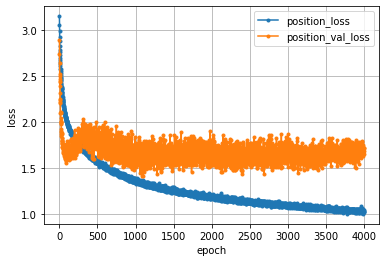

In [28]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

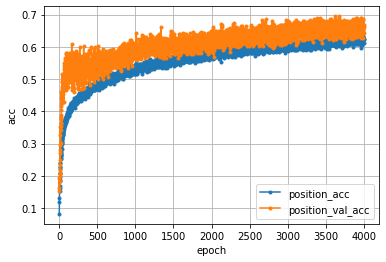

In [29]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [30]:
#まずは中間の欠陥を推定できるのか(大きさの正解は2または4とする。)(4バージョン)

## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_train = []
size_y_train = []
position_x_train = []
position_y_train = []
size_x_test = []
size_y_test = []
position_x_test = []
position_y_test = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_test.append(data_array[1:-1])
    size_y_test.append(4)
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_test.append(data_array[1:-1])
    position_y_test.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_train = np.array(size_x_train, dtype=float)
size_y_train = np.array(size_y_train, dtype=int)
size_x_test = np.array(size_x_test, dtype=float)
size_y_test = np.array(size_y_test, dtype=int)
position_x_train = np.array(position_x_train, dtype=float)
position_y_train = np.array(position_y_train, dtype=int)
position_x_test = np.array(position_x_test, dtype=float)
position_y_test = np.array(position_y_test, dtype=int)

### データの加工
size_x_train = (size_x_train-no_hole_data)
size_x_test = (size_x_test-no_hole_data)
position_x_train = (position_x_train-no_hole_data)
position_x_test = (position_x_test-no_hole_data)
size_y_train = keras.utils.to_categorical(size_y_train, 6)
size_y_test = keras.utils.to_categorical(size_y_test, 6)
position_y_train = (position_y_train-1)
position_y_train = keras.utils.to_categorical(position_y_train, 25)
position_y_test = (position_y_test-1)
position_y_test = keras.utils.to_categorical(position_y_test, 25)

# print(size_x_train.shape)
# print(size_x_test.shape)
# print(position_x_train.shape)
# print(position_x_test.shape)
# print(size_y_train.shape)
# print(size_y_test.shape)
# print(position_y_train.shape)
# print(position_y_test.shape)

### reshape
size_x_train = size_x_train.reshape(8110, 50, 1)
size_x_test = size_x_test.reshape(2025, 50, 1)
position_x_train = position_x_train.reshape(8110, 50, 1)
position_x_test = position_x_test.reshape(2025, 50, 1)

In [31]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [32]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8110 samples, validate on 2025 samples
Epoch 1/1000
8110/8110 [==============================] - 0s 43us/step - loss: 1.3569 - accuracy: 0.4104 - val_loss: 1.3065 - val_accuracy: 0.6820
Epoch 2/1000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1413 - accuracy: 0.5460 - val_loss: 1.6664 - val_accuracy: 0.0064
Epoch 3/1000
8110/8110 [==============================] - 0s 26us/step - loss: 1.0507 - accuracy: 0.5777 - val_loss: 1.5156 - val_accuracy: 0.3338
Epoch 4/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.9798 - accuracy: 0.6139 - val_loss: 1.4125 - val_accuracy: 0.3684
Epoch 5/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.9403 - accuracy: 0.6064 - val_loss: 1.3931 - val_accuracy: 0.4489
Epoch 6/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.9056 - accuracy: 0.6600 - val_loss: 1.3552 - val_accuracy: 0.4247
Epoch 7/1000
8110/8110 [==============================] - 0s 26us/step

8110/8110 [==============================] - 0s 26us/step - loss: 0.3330 - accuracy: 0.9232 - val_loss: 1.0367 - val_accuracy: 0.4035
Epoch 57/1000
8110/8110 [==============================] - 0s 23us/step - loss: 0.3220 - accuracy: 0.9277 - val_loss: 1.1971 - val_accuracy: 0.3170
Epoch 58/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.3158 - accuracy: 0.9281 - val_loss: 1.0572 - val_accuracy: 0.4005
Epoch 59/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.3161 - accuracy: 0.9263 - val_loss: 0.7783 - val_accuracy: 0.6252
Epoch 60/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.3174 - accuracy: 0.9242 - val_loss: 0.9680 - val_accuracy: 0.4563
Epoch 61/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.3061 - accuracy: 0.9324 - val_loss: 1.4095 - val_accuracy: 0.1763
Epoch 62/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.3000 - accuracy: 0.9328 - val_loss: 1.0708 -

8110/8110 [==============================] - 0s 29us/step - loss: 0.2113 - accuracy: 0.9503 - val_loss: 0.9446 - val_accuracy: 0.4919
Epoch 112/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.2062 - accuracy: 0.9504 - val_loss: 1.0373 - val_accuracy: 0.4523
Epoch 113/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2179 - accuracy: 0.9459 - val_loss: 0.7175 - val_accuracy: 0.6504
Epoch 114/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2090 - accuracy: 0.9507 - val_loss: 1.4950 - val_accuracy: 0.2227
Epoch 115/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2154 - accuracy: 0.9483 - val_loss: 1.2098 - val_accuracy: 0.3605
Epoch 116/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2061 - accuracy: 0.9504 - val_loss: 0.9538 - val_accuracy: 0.4849
Epoch 117/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2057 - accuracy: 0.9499 - val_loss: 0.

8110/8110 [==============================] - 0s 25us/step - loss: 0.1637 - accuracy: 0.9575 - val_loss: 0.8164 - val_accuracy: 0.5684
Epoch 167/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1563 - accuracy: 0.9600 - val_loss: 1.1540 - val_accuracy: 0.4232
Epoch 168/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1605 - accuracy: 0.9594 - val_loss: 1.2981 - val_accuracy: 0.3486
Epoch 169/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1561 - accuracy: 0.9594 - val_loss: 1.8030 - val_accuracy: 0.1679
Epoch 170/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1506 - accuracy: 0.9609 - val_loss: 1.3558 - val_accuracy: 0.3264
Epoch 171/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1503 - accuracy: 0.9620 - val_loss: 1.7560 - val_accuracy: 0.1704
Epoch 172/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1527 - accuracy: 0.9617 - val_loss: 1.

8110/8110 [==============================] - 0s 25us/step - loss: 0.1327 - accuracy: 0.9644 - val_loss: 1.6050 - val_accuracy: 0.2953
Epoch 222/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1247 - accuracy: 0.9682 - val_loss: 0.9942 - val_accuracy: 0.5032
Epoch 223/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1281 - accuracy: 0.9660 - val_loss: 1.6873 - val_accuracy: 0.2746
Epoch 224/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.1240 - accuracy: 0.9674 - val_loss: 1.0697 - val_accuracy: 0.4677
Epoch 225/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.1265 - accuracy: 0.9658 - val_loss: 1.3543 - val_accuracy: 0.3659
Epoch 226/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.1249 - accuracy: 0.9667 - val_loss: 1.7165 - val_accuracy: 0.2588
Epoch 227/1000
8110/8110 [==============================] - 0s 31us/step - loss: 0.1244 - accuracy: 0.9655 - val_loss: 1.

8110/8110 [==============================] - 0s 36us/step - loss: 0.1064 - accuracy: 0.9707 - val_loss: 1.5285 - val_accuracy: 0.3264
Epoch 277/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.1019 - accuracy: 0.9700 - val_loss: 1.5469 - val_accuracy: 0.3289
Epoch 278/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.1086 - accuracy: 0.9699 - val_loss: 1.5731 - val_accuracy: 0.3165
Epoch 279/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.1043 - accuracy: 0.9713 - val_loss: 1.8676 - val_accuracy: 0.2464
Epoch 280/1000
8110/8110 [==============================] - 0s 36us/step - loss: 0.1030 - accuracy: 0.9714 - val_loss: 1.1513 - val_accuracy: 0.4578
Epoch 281/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.1027 - accuracy: 0.9724 - val_loss: 1.4883 - val_accuracy: 0.3467
Epoch 282/1000
8110/8110 [==============================] - 0s 31us/step - loss: 0.1043 - accuracy: 0.9714 - val_loss: 1.

8110/8110 [==============================] - 0s 26us/step - loss: 0.0918 - accuracy: 0.9758 - val_loss: 1.9504 - val_accuracy: 0.2598
Epoch 332/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0929 - accuracy: 0.9742 - val_loss: 1.1751 - val_accuracy: 0.4523
Epoch 333/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.0970 - accuracy: 0.9741 - val_loss: 1.3148 - val_accuracy: 0.4040
Epoch 334/1000
8110/8110 [==============================] - 0s 36us/step - loss: 0.0902 - accuracy: 0.9746 - val_loss: 2.3538 - val_accuracy: 0.1723
Epoch 335/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.0930 - accuracy: 0.9750 - val_loss: 1.1417 - val_accuracy: 0.4780
Epoch 336/1000
8110/8110 [==============================] - 0s 36us/step - loss: 0.0991 - accuracy: 0.9726 - val_loss: 2.2177 - val_accuracy: 0.2119
Epoch 337/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.0950 - accuracy: 0.9739 - val_loss: 1.

8110/8110 [==============================] - 0s 26us/step - loss: 0.0834 - accuracy: 0.9768 - val_loss: 1.7620 - val_accuracy: 0.3156
Epoch 387/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0822 - accuracy: 0.9769 - val_loss: 1.1882 - val_accuracy: 0.4632
Epoch 388/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0870 - accuracy: 0.9768 - val_loss: 1.6048 - val_accuracy: 0.3462
Epoch 389/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0832 - accuracy: 0.9771 - val_loss: 2.5772 - val_accuracy: 0.1560
Epoch 390/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0843 - accuracy: 0.9776 - val_loss: 2.1962 - val_accuracy: 0.2415
Epoch 391/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0855 - accuracy: 0.9756 - val_loss: 2.1032 - val_accuracy: 0.2430
Epoch 392/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0853 - accuracy: 0.9767 - val_loss: 1.

8110/8110 [==============================] - 0s 27us/step - loss: 0.0754 - accuracy: 0.9795 - val_loss: 2.2903 - val_accuracy: 0.2336
Epoch 442/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0798 - accuracy: 0.9774 - val_loss: 2.3988 - val_accuracy: 0.2158
Epoch 443/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.0784 - accuracy: 0.9779 - val_loss: 1.9947 - val_accuracy: 0.2859
Epoch 444/1000
8110/8110 [==============================] - 0s 38us/step - loss: 0.0785 - accuracy: 0.9774 - val_loss: 1.8016 - val_accuracy: 0.3210
Epoch 445/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.0764 - accuracy: 0.9792 - val_loss: 1.6874 - val_accuracy: 0.3422
Epoch 446/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.0780 - accuracy: 0.9776 - val_loss: 1.5899 - val_accuracy: 0.3595
Epoch 447/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0772 - accuracy: 0.9782 - val_loss: 1.

8110/8110 [==============================] - 0s 25us/step - loss: 0.0732 - accuracy: 0.9792 - val_loss: 2.1504 - val_accuracy: 0.2746
Epoch 497/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0775 - accuracy: 0.9776 - val_loss: 1.8929 - val_accuracy: 0.3156
Epoch 498/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0738 - accuracy: 0.9783 - val_loss: 1.3914 - val_accuracy: 0.4168
Epoch 499/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0692 - accuracy: 0.9800 - val_loss: 1.8897 - val_accuracy: 0.3131
Epoch 500/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0679 - accuracy: 0.9814 - val_loss: 1.0343 - val_accuracy: 0.5353
Epoch 501/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0749 - accuracy: 0.9788 - val_loss: 1.0560 - val_accuracy: 0.5363
Epoch 502/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0710 - accuracy: 0.9795 - val_loss: 1.

8110/8110 [==============================] - 0s 32us/step - loss: 0.0625 - accuracy: 0.9813 - val_loss: 2.3111 - val_accuracy: 0.2528
Epoch 552/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 2.3388 - val_accuracy: 0.2435
Epoch 553/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 2.4722 - val_accuracy: 0.2296
Epoch 554/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0607 - accuracy: 0.9811 - val_loss: 2.0509 - val_accuracy: 0.2963
Epoch 555/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.0607 - accuracy: 0.9822 - val_loss: 2.7343 - val_accuracy: 0.1896
Epoch 556/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.0618 - accuracy: 0.9829 - val_loss: 1.3950 - val_accuracy: 0.4306
Epoch 557/1000
8110/8110 [==============================] - 0s 35us/step - loss: 0.0626 - accuracy: 0.9821 - val_loss: 1.

8110/8110 [==============================] - 0s 32us/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 1.2712 - val_accuracy: 0.4751
Epoch 607/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 2.0625 - val_accuracy: 0.3037
Epoch 608/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0596 - accuracy: 0.9808 - val_loss: 1.5199 - val_accuracy: 0.3980
Epoch 609/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.0629 - accuracy: 0.9801 - val_loss: 1.8231 - val_accuracy: 0.3467
Epoch 610/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0629 - accuracy: 0.9819 - val_loss: 1.2484 - val_accuracy: 0.4830
Epoch 611/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0677 - accuracy: 0.9790 - val_loss: 1.1152 - val_accuracy: 0.5225
Epoch 612/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 1.

8110/8110 [==============================] - 0s 26us/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 2.4923 - val_accuracy: 0.2356
Epoch 662/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0510 - accuracy: 0.9852 - val_loss: 1.1554 - val_accuracy: 0.5165
Epoch 663/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 1.6711 - val_accuracy: 0.3679
Epoch 664/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 2.2747 - val_accuracy: 0.2810
Epoch 665/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0712 - accuracy: 0.9800 - val_loss: 1.9519 - val_accuracy: 0.3244
Epoch 666/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 1.1570 - val_accuracy: 0.5215
Epoch 667/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 2.

8110/8110 [==============================] - 0s 26us/step - loss: 0.0530 - accuracy: 0.9842 - val_loss: 2.4643 - val_accuracy: 0.2553
Epoch 717/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 1.7976 - val_accuracy: 0.3659
Epoch 718/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0533 - accuracy: 0.9850 - val_loss: 2.4038 - val_accuracy: 0.2731
Epoch 719/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0492 - accuracy: 0.9856 - val_loss: 2.0694 - val_accuracy: 0.3165
Epoch 720/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 1.3074 - val_accuracy: 0.4751
Epoch 721/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0470 - accuracy: 0.9845 - val_loss: 2.3700 - val_accuracy: 0.2830
Epoch 722/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 1.

8110/8110 [==============================] - 0s 25us/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 1.9320 - val_accuracy: 0.3378
Epoch 772/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 1.2105 - val_accuracy: 0.5215
Epoch 773/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0438 - accuracy: 0.9877 - val_loss: 2.1338 - val_accuracy: 0.3067
Epoch 774/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0496 - accuracy: 0.9859 - val_loss: 1.8713 - val_accuracy: 0.3541
Epoch 775/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 1.1754 - val_accuracy: 0.5299
Epoch 776/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 1.1849 - val_accuracy: 0.5215
Epoch 777/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 1.

8110/8110 [==============================] - 0s 26us/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 1.5556 - val_accuracy: 0.4207
Epoch 827/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.9257 - val_accuracy: 0.6188
Epoch 828/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0428 - accuracy: 0.9857 - val_loss: 2.4662 - val_accuracy: 0.2800
Epoch 829/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 1.6214 - val_accuracy: 0.4143
Epoch 830/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0359 - accuracy: 0.9899 - val_loss: 1.6967 - val_accuracy: 0.3916
Epoch 831/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0380 - accuracy: 0.9887 - val_loss: 1.8117 - val_accuracy: 0.3723
Epoch 832/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 1.

8110/8110 [==============================] - 0s 25us/step - loss: 0.0348 - accuracy: 0.9884 - val_loss: 2.3609 - val_accuracy: 0.2948
Epoch 882/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 2.0386 - val_accuracy: 0.3452
Epoch 883/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 1.7299 - val_accuracy: 0.3872
Epoch 884/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 1.1729 - val_accuracy: 0.5388
Epoch 885/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 1.4978 - val_accuracy: 0.4504
Epoch 886/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 1.6962 - val_accuracy: 0.4025
Epoch 887/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 1.

8110/8110 [==============================] - 0s 25us/step - loss: 0.0361 - accuracy: 0.9895 - val_loss: 3.7103 - val_accuracy: 0.1388
Epoch 937/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 3.0814 - val_accuracy: 0.2143
Epoch 938/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0367 - accuracy: 0.9893 - val_loss: 1.7417 - val_accuracy: 0.3936
Epoch 939/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0338 - accuracy: 0.9906 - val_loss: 2.3924 - val_accuracy: 0.2938
Epoch 940/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 1.9217 - val_accuracy: 0.3664
Epoch 941/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 1.6500 - val_accuracy: 0.4222
Epoch 942/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 2.

8110/8110 [==============================] - 0s 26us/step - loss: 0.0669 - accuracy: 0.9825 - val_loss: 3.2999 - val_accuracy: 0.1773
Epoch 992/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0430 - accuracy: 0.9855 - val_loss: 1.8998 - val_accuracy: 0.3793
Epoch 993/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 1.4903 - val_accuracy: 0.4686
Epoch 994/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 1.7726 - val_accuracy: 0.4020
Epoch 995/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 2.2148 - val_accuracy: 0.3230
Epoch 996/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0295 - accuracy: 0.9916 - val_loss: 2.3053 - val_accuracy: 0.3091
Epoch 997/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 1.

In [33]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2025/2025 [==============================] - 0s 80us/step
Test loss: 1.4877200790687843
Test accuracy: 0.46617284417152405


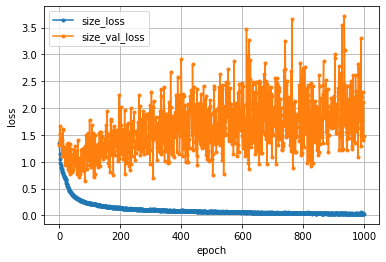

In [34]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

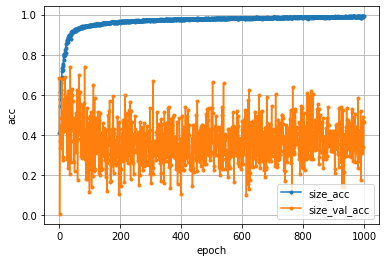

In [35]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [36]:
#まずは中間の欠陥を推定できるのか(大きさの正解は2または4とする。)(2バージョン)

## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_train = []
size_y_train = []
position_x_train = []
position_y_train = []
size_x_test = []
size_y_test = []
position_x_test = []
position_y_test = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_test.append(data_array[1:-1])
    size_y_test.append(2)
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_train.append(data_array[1:-1])
    size_y_train.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_test.append(data_array[1:-1])
    position_y_test.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_train.append(data_array[1:-1])
    position_y_train.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_train = np.array(size_x_train, dtype=float)
size_y_train = np.array(size_y_train, dtype=int)
size_x_test = np.array(size_x_test, dtype=float)
size_y_test = np.array(size_y_test, dtype=int)
position_x_train = np.array(position_x_train, dtype=float)
position_y_train = np.array(position_y_train, dtype=int)
position_x_test = np.array(position_x_test, dtype=float)
position_y_test = np.array(position_y_test, dtype=int)

### データの加工
size_x_train = (size_x_train-no_hole_data)
size_x_test = (size_x_test-no_hole_data)
position_x_train = (position_x_train-no_hole_data)
position_x_test = (position_x_test-no_hole_data)
size_y_train = keras.utils.to_categorical(size_y_train, 6)
size_y_test = keras.utils.to_categorical(size_y_test, 6)
position_y_train = (position_y_train-1)
position_y_train = keras.utils.to_categorical(position_y_train, 25)
position_y_test = (position_y_test-1)
position_y_test = keras.utils.to_categorical(position_y_test, 25)

# print(size_x_train.shape)
# print(size_x_test.shape)
# print(position_x_train.shape)
# print(position_x_test.shape)
# print(size_y_train.shape)
# print(size_y_test.shape)
# print(position_y_train.shape)
# print(position_y_test.shape)

### reshape
size_x_train = size_x_train.reshape(8110, 50, 1)
size_x_test = size_x_test.reshape(2025, 50, 1)
position_x_train = position_x_train.reshape(8110, 50, 1)
position_x_test = position_x_test.reshape(2025, 50, 1)

In [37]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [38]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8110 samples, validate on 2025 samples
Epoch 1/1000
8110/8110 [==============================] - 0s 54us/step - loss: 1.2934 - accuracy: 0.4471 - val_loss: 1.2341 - val_accuracy: 0.6741
Epoch 2/1000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1147 - accuracy: 0.5557 - val_loss: 1.2254 - val_accuracy: 0.6400
Epoch 3/1000
8110/8110 [==============================] - 0s 33us/step - loss: 1.0316 - accuracy: 0.5777 - val_loss: 1.4742 - val_accuracy: 0.0035
Epoch 4/1000
8110/8110 [==============================] - 0s 30us/step - loss: 0.9772 - accuracy: 0.6321 - val_loss: 1.3332 - val_accuracy: 0.3294
Epoch 5/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.9373 - accuracy: 0.6422 - val_loss: 1.4886 - val_accuracy: 0.0054
Epoch 6/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.9015 - accuracy: 0.6672 - val_loss: 1.4759 - val_accuracy: 0.2405
Epoch 7/1000
8110/8110 [==============================] - 0s 33us/step

8110/8110 [==============================] - 0s 34us/step - loss: 0.3847 - accuracy: 0.9116 - val_loss: 1.1866 - val_accuracy: 0.4602
Epoch 57/1000
8110/8110 [==============================] - 0s 31us/step - loss: 0.3860 - accuracy: 0.9059 - val_loss: 0.9941 - val_accuracy: 0.6291
Epoch 58/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.3792 - accuracy: 0.9094 - val_loss: 1.1702 - val_accuracy: 0.4938
Epoch 59/1000
8110/8110 [==============================] - 0s 31us/step - loss: 0.3904 - accuracy: 0.8965 - val_loss: 1.4196 - val_accuracy: 0.2909
Epoch 60/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.3717 - accuracy: 0.9110 - val_loss: 1.2301 - val_accuracy: 0.4494
Epoch 61/1000
8110/8110 [==============================] - ETA: 0s - loss: 0.3681 - accuracy: 0.91 - 0s 32us/step - loss: 0.3658 - accuracy: 0.9133 - val_loss: 1.1809 - val_accuracy: 0.4993
Epoch 62/1000
8110/8110 [==============================] - ETA: 0s - loss: 0.3663 - 

Epoch 111/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.2618 - accuracy: 0.9345 - val_loss: 1.1337 - val_accuracy: 0.5151
Epoch 112/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.2576 - accuracy: 0.9363 - val_loss: 1.4589 - val_accuracy: 0.3506
Epoch 113/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.2537 - accuracy: 0.9376 - val_loss: 1.3029 - val_accuracy: 0.4400
Epoch 114/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.2517 - accuracy: 0.9339 - val_loss: 0.9944 - val_accuracy: 0.6277
Epoch 115/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.2521 - accuracy: 0.9358 - val_loss: 0.7727 - val_accuracy: 0.8059
Epoch 116/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.2490 - accuracy: 0.9376 - val_loss: 1.1437 - val_accuracy: 0.5106
Epoch 117/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.2498 - accuracy: 0.9361

Epoch 166/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2038 - accuracy: 0.9471 - val_loss: 0.8991 - val_accuracy: 0.6731
Epoch 167/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.2001 - accuracy: 0.9467 - val_loss: 1.0798 - val_accuracy: 0.5640
Epoch 168/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.1937 - accuracy: 0.9501 - val_loss: 0.7925 - val_accuracy: 0.7314
Epoch 169/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.1981 - accuracy: 0.9477 - val_loss: 1.1592 - val_accuracy: 0.5244
Epoch 170/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1936 - accuracy: 0.9498 - val_loss: 0.9020 - val_accuracy: 0.6780
Epoch 171/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1928 - accuracy: 0.9506 - val_loss: 1.0341 - val_accuracy: 0.5719
Epoch 172/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.2048 - accuracy: 0.9460

Epoch 221/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1619 - accuracy: 0.9591 - val_loss: 0.9720 - val_accuracy: 0.6681
Epoch 222/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1647 - accuracy: 0.9572 - val_loss: 0.8932 - val_accuracy: 0.6820
Epoch 223/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1617 - accuracy: 0.9559 - val_loss: 1.0956 - val_accuracy: 0.5911
Epoch 224/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.1637 - accuracy: 0.9573 - val_loss: 1.1512 - val_accuracy: 0.5654
Epoch 225/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1603 - accuracy: 0.9602 - val_loss: 1.0094 - val_accuracy: 0.6321
Epoch 226/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1563 - accuracy: 0.9587 - val_loss: 1.0535 - val_accuracy: 0.6094
Epoch 227/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1526 - accuracy: 0.9602

Epoch 276/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1372 - accuracy: 0.9634 - val_loss: 0.8966 - val_accuracy: 0.7002
Epoch 277/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1295 - accuracy: 0.9663 - val_loss: 1.0190 - val_accuracy: 0.6395
Epoch 278/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1355 - accuracy: 0.9641 - val_loss: 1.0570 - val_accuracy: 0.6188
Epoch 279/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1359 - accuracy: 0.9655 - val_loss: 1.0223 - val_accuracy: 0.6474
Epoch 280/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.1347 - accuracy: 0.9657 - val_loss: 1.1054 - val_accuracy: 0.6133
Epoch 281/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1362 - accuracy: 0.9644 - val_loss: 1.3771 - val_accuracy: 0.5007
Epoch 282/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.1355 - accuracy: 0.9640

Epoch 331/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.1211 - accuracy: 0.9666 - val_loss: 1.1313 - val_accuracy: 0.6178
Epoch 332/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.1147 - accuracy: 0.9681 - val_loss: 0.9489 - val_accuracy: 0.6919
Epoch 333/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.1119 - accuracy: 0.9698 - val_loss: 1.1420 - val_accuracy: 0.6247
Epoch 334/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.1122 - accuracy: 0.9699 - val_loss: 1.2946 - val_accuracy: 0.5709
Epoch 335/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.1097 - accuracy: 0.9694 - val_loss: 0.9420 - val_accuracy: 0.6879
Epoch 336/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.1219 - accuracy: 0.9670 - val_loss: 0.9060 - val_accuracy: 0.7057
Epoch 337/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.1239 - accuracy: 0.9678

Epoch 386/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.1131 - accuracy: 0.9684 - val_loss: 1.6339 - val_accuracy: 0.4790
Epoch 387/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0992 - accuracy: 0.9729 - val_loss: 1.7227 - val_accuracy: 0.4607
Epoch 388/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0991 - accuracy: 0.9723 - val_loss: 1.2715 - val_accuracy: 0.5921
Epoch 389/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.1023 - accuracy: 0.9730 - val_loss: 1.5624 - val_accuracy: 0.5017
Epoch 390/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0987 - accuracy: 0.9724 - val_loss: 0.9170 - val_accuracy: 0.7042
Epoch 391/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.1100 - accuracy: 0.9677 - val_loss: 0.8649 - val_accuracy: 0.7210
Epoch 392/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0995 - accuracy: 0.9740

Epoch 441/1000
8110/8110 [==============================] - 0s 30us/step - loss: 0.0875 - accuracy: 0.9736 - val_loss: 1.1800 - val_accuracy: 0.6538
Epoch 442/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0903 - accuracy: 0.9748 - val_loss: 1.2585 - val_accuracy: 0.6143
Epoch 443/1000
8110/8110 [==============================] - 0s 34us/step - loss: 0.0887 - accuracy: 0.9767 - val_loss: 1.2570 - val_accuracy: 0.6163
Epoch 444/1000
8110/8110 [==============================] - 0s 30us/step - loss: 0.0883 - accuracy: 0.9747 - val_loss: 0.9360 - val_accuracy: 0.7116
Epoch 445/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0863 - accuracy: 0.9766 - val_loss: 1.4422 - val_accuracy: 0.5551
Epoch 446/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0910 - accuracy: 0.9757 - val_loss: 1.0412 - val_accuracy: 0.6859
Epoch 447/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0898 - accuracy: 0.9757

Epoch 496/1000
8110/8110 [==============================] - 0s 37us/step - loss: 0.0872 - accuracy: 0.9753 - val_loss: 1.1147 - val_accuracy: 0.6657
Epoch 497/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.0795 - accuracy: 0.9785 - val_loss: 1.8007 - val_accuracy: 0.4662
Epoch 498/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0857 - accuracy: 0.9762 - val_loss: 1.7541 - val_accuracy: 0.4790
Epoch 499/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0861 - accuracy: 0.9741 - val_loss: 1.1204 - val_accuracy: 0.6617
Epoch 500/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.0848 - accuracy: 0.9766 - val_loss: 1.2180 - val_accuracy: 0.6178
Epoch 501/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0801 - accuracy: 0.9760 - val_loss: 1.3241 - val_accuracy: 0.5857
Epoch 502/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0817 - accuracy: 0.9779

Epoch 551/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.0859 - accuracy: 0.9753 - val_loss: 1.1589 - val_accuracy: 0.6612
Epoch 552/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0729 - accuracy: 0.9783 - val_loss: 1.4087 - val_accuracy: 0.5827
Epoch 553/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0738 - accuracy: 0.9788 - val_loss: 1.2899 - val_accuracy: 0.6183
Epoch 554/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0721 - accuracy: 0.9793 - val_loss: 1.3611 - val_accuracy: 0.5970
Epoch 555/1000
8110/8110 [==============================] - 0s 37us/step - loss: 0.0740 - accuracy: 0.9785 - val_loss: 1.5056 - val_accuracy: 0.5353
Epoch 556/1000
8110/8110 [==============================] - 0s 36us/step - loss: 0.0822 - accuracy: 0.9781 - val_loss: 1.2552 - val_accuracy: 0.6281
Epoch 557/1000
8110/8110 [==============================] - 0s 38us/step - loss: 0.0739 - accuracy: 0.9778

Epoch 606/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 1.2382 - val_accuracy: 0.6523
Epoch 607/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0707 - accuracy: 0.9789 - val_loss: 1.4134 - val_accuracy: 0.5877
Epoch 608/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0721 - accuracy: 0.9789 - val_loss: 0.7951 - val_accuracy: 0.7951
Epoch 609/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0677 - accuracy: 0.9800 - val_loss: 0.9063 - val_accuracy: 0.7472
Epoch 610/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0785 - accuracy: 0.9777 - val_loss: 1.1178 - val_accuracy: 0.6681
Epoch 611/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0679 - accuracy: 0.9800 - val_loss: 1.7431 - val_accuracy: 0.4968
Epoch 612/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0671 - accuracy: 0.9810

Epoch 661/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 1.3554 - val_accuracy: 0.6341
Epoch 662/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0665 - accuracy: 0.9803 - val_loss: 1.3302 - val_accuracy: 0.6346
Epoch 663/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0675 - accuracy: 0.9803 - val_loss: 1.2658 - val_accuracy: 0.6593
Epoch 664/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0591 - accuracy: 0.9830 - val_loss: 1.0606 - val_accuracy: 0.6968
Epoch 665/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0657 - accuracy: 0.9784 - val_loss: 1.0425 - val_accuracy: 0.7037
Epoch 666/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 1.9390 - val_accuracy: 0.4706
Epoch 667/1000
8110/8110 [==============================] - 0s 29us/step - loss: 0.0664 - accuracy: 0.9794

Epoch 716/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 1.0565 - val_accuracy: 0.6874
Epoch 717/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 1.5563 - val_accuracy: 0.5605
Epoch 718/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 1.5251 - val_accuracy: 0.5773
Epoch 719/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 1.3645 - val_accuracy: 0.6222
Epoch 720/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 1.1089 - val_accuracy: 0.6835
Epoch 721/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0606 - accuracy: 0.9809 - val_loss: 1.5779 - val_accuracy: 0.5590
Epoch 722/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0673 - accuracy: 0.9797

Epoch 771/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 1.7503 - val_accuracy: 0.5170
Epoch 772/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 1.4044 - val_accuracy: 0.6114
Epoch 773/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0549 - accuracy: 0.9846 - val_loss: 1.2684 - val_accuracy: 0.6469
Epoch 774/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 2.1333 - val_accuracy: 0.4360
Epoch 775/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 2.1549 - val_accuracy: 0.4277
Epoch 776/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 1.4451 - val_accuracy: 0.6069
Epoch 777/1000
8110/8110 [==============================] - 0s 26us/step - loss: 0.0537 - accuracy: 0.9836

Epoch 826/1000
8110/8110 [==============================] - 0s 30us/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 1.9059 - val_accuracy: 0.4874
Epoch 827/1000
8110/8110 [==============================] - 0s 44us/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 1.8672 - val_accuracy: 0.4983
Epoch 828/1000
8110/8110 [==============================] - 0s 52us/step - loss: 0.0515 - accuracy: 0.9846 - val_loss: 1.5567 - val_accuracy: 0.5837
Epoch 829/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 1.5570 - val_accuracy: 0.5733
Epoch 830/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0517 - accuracy: 0.9831 - val_loss: 1.3991 - val_accuracy: 0.6173
Epoch 831/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 1.8729 - val_accuracy: 0.5042
Epoch 832/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0514 - accuracy: 0.9842

Epoch 881/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0581 - accuracy: 0.9804 - val_loss: 1.3648 - val_accuracy: 0.6390
Epoch 882/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0450 - accuracy: 0.9851 - val_loss: 2.2531 - val_accuracy: 0.4306
Epoch 883/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0474 - accuracy: 0.9861 - val_loss: 1.1795 - val_accuracy: 0.6919
Epoch 884/1000
8110/8110 [==============================] - 0s 28us/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 2.1846 - val_accuracy: 0.4449
Epoch 885/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 1.3837 - val_accuracy: 0.6247
Epoch 886/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 1.1049 - val_accuracy: 0.7096
Epoch 887/1000
8110/8110 [==============================] - 0s 33us/step - loss: 0.0477 - accuracy: 0.9855

Epoch 936/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 1.6564 - val_accuracy: 0.5743
Epoch 937/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 1.4136 - val_accuracy: 0.6286
Epoch 938/1000
8110/8110 [==============================] - 0s 23us/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 1.3137 - val_accuracy: 0.6588
Epoch 939/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 1.6602 - val_accuracy: 0.5664
Epoch 940/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0434 - accuracy: 0.9856 - val_loss: 1.5730 - val_accuracy: 0.5901
Epoch 941/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 2.0045 - val_accuracy: 0.4844
Epoch 942/1000
8110/8110 [==============================] - 0s 24us/step - loss: 0.0473 - accuracy: 0.9850

Epoch 991/1000
8110/8110 [==============================] - 0s 25us/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 1.9004 - val_accuracy: 0.5042
Epoch 992/1000
8110/8110 [==============================] - 0s 36us/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 1.2112 - val_accuracy: 0.6958
Epoch 993/1000
8110/8110 [==============================] - 0s 32us/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 1.6454 - val_accuracy: 0.5817
Epoch 994/1000
8110/8110 [==============================] - 0s 39us/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 1.4131 - val_accuracy: 0.6440
Epoch 995/1000
8110/8110 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 1.4235 - val_accuracy: 0.6425
Epoch 996/1000
8110/8110 [==============================] - 0s 35us/step - loss: 0.0446 - accuracy: 0.9869 - val_loss: 1.1965 - val_accuracy: 0.7077
Epoch 997/1000
8110/8110 [==============================] - 0s 27us/step - loss: 0.0390 - accuracy: 0.9880

In [39]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2025/2025 [==============================] - 0s 30us/step
Test loss: 1.7447759538516403
Test accuracy: 0.5604938268661499


In [50]:
size_predict = size_model.predict(size_x_test).argmax(axis=1)
total = len(size_predict)
correct = 0
for i in range(total):
    if size_predict[i] == 2:
        correct = correct + 1
    if size_predict[i] == 4:
        correct = correct + 1
print(correct/total)
print(size_predict)

1.0
[2 2 2 ... 2 2 2]


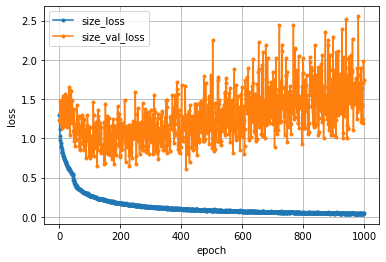

In [40]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

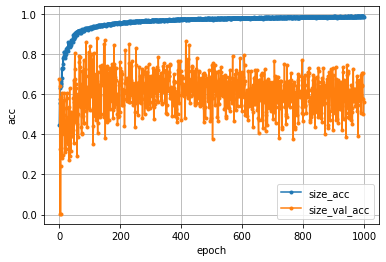

In [41]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [42]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [43]:
# 学習(位置)
epochs = 4000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8110 samples, validate on 2025 samples
Epoch 1/4000
8110/8110 [==============================] - 0s 44us/step - loss: 3.1233 - accuracy: 0.0843 - val_loss: 3.0211 - val_accuracy: 0.1259
Epoch 2/4000
8110/8110 [==============================] - 0s 31us/step - loss: 2.9842 - accuracy: 0.1292 - val_loss: 2.9211 - val_accuracy: 0.1862
Epoch 3/4000
8110/8110 [==============================] - 0s 31us/step - loss: 2.8958 - accuracy: 0.1510 - val_loss: 2.8179 - val_accuracy: 0.1556
Epoch 4/4000
8110/8110 [==============================] - 0s 33us/step - loss: 2.8271 - accuracy: 0.1760 - val_loss: 2.7327 - val_accuracy: 0.1965
Epoch 5/4000
8110/8110 [==============================] - 0s 30us/step - loss: 2.7808 - accuracy: 0.1850 - val_loss: 2.6974 - val_accuracy: 0.2523
Epoch 6/4000
8110/8110 [==============================] - 0s 31us/step - loss: 2.7360 - accuracy: 0.1937 - val_loss: 2.6570 - val_accuracy: 0.2183
Epoch 7/4000
8110/8110 [==============================] - 0s 31us/step

8110/8110 [==============================] - 0s 29us/step - loss: 2.1035 - accuracy: 0.3721 - val_loss: 1.9846 - val_accuracy: 0.3546
Epoch 57/4000
8110/8110 [==============================] - 0s 28us/step - loss: 2.1057 - accuracy: 0.3686 - val_loss: 1.9488 - val_accuracy: 0.3526
Epoch 58/4000
8110/8110 [==============================] - 0s 27us/step - loss: 2.1011 - accuracy: 0.3670 - val_loss: 1.9310 - val_accuracy: 0.3906
Epoch 59/4000
8110/8110 [==============================] - 0s 29us/step - loss: 2.0995 - accuracy: 0.3703 - val_loss: 1.9188 - val_accuracy: 0.4311
Epoch 60/4000
8110/8110 [==============================] - 0s 27us/step - loss: 2.0987 - accuracy: 0.3662 - val_loss: 1.9209 - val_accuracy: 0.4030
Epoch 61/4000
8110/8110 [==============================] - 0s 28us/step - loss: 2.0747 - accuracy: 0.3818 - val_loss: 1.9024 - val_accuracy: 0.4494
Epoch 62/4000
8110/8110 [==============================] - 0s 27us/step - loss: 2.0812 - accuracy: 0.3783 - val_loss: 1.8914 -

8110/8110 [==============================] - 0s 29us/step - loss: 1.9490 - accuracy: 0.4096 - val_loss: 1.7748 - val_accuracy: 0.4958
Epoch 112/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.9409 - accuracy: 0.4084 - val_loss: 1.7133 - val_accuracy: 0.5017
Epoch 113/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.9676 - accuracy: 0.3983 - val_loss: 1.7496 - val_accuracy: 0.4721
Epoch 114/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.9433 - accuracy: 0.4048 - val_loss: 1.7429 - val_accuracy: 0.4953
Epoch 115/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.9404 - accuracy: 0.4097 - val_loss: 1.7625 - val_accuracy: 0.4677
Epoch 116/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.9451 - accuracy: 0.4051 - val_loss: 1.7348 - val_accuracy: 0.4360
Epoch 117/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.9321 - accuracy: 0.4033 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.8652 - accuracy: 0.4238 - val_loss: 1.6168 - val_accuracy: 0.4923
Epoch 167/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.8453 - accuracy: 0.4365 - val_loss: 1.6394 - val_accuracy: 0.4598
Epoch 168/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.8532 - accuracy: 0.4371 - val_loss: 1.6804 - val_accuracy: 0.4514
Epoch 169/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.8766 - accuracy: 0.4136 - val_loss: 1.6951 - val_accuracy: 0.4356
Epoch 170/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.8702 - accuracy: 0.4273 - val_loss: 1.6620 - val_accuracy: 0.4415
Epoch 171/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.8471 - accuracy: 0.4314 - val_loss: 1.6997 - val_accuracy: 0.4232
Epoch 172/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.8516 - accuracy: 0.4335 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.7969 - accuracy: 0.4454 - val_loss: 1.6150 - val_accuracy: 0.4410
Epoch 222/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.8006 - accuracy: 0.4379 - val_loss: 1.5811 - val_accuracy: 0.4632
Epoch 223/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7950 - accuracy: 0.4400 - val_loss: 1.5892 - val_accuracy: 0.5136
Epoch 224/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.7937 - accuracy: 0.4401 - val_loss: 1.6211 - val_accuracy: 0.4607
Epoch 225/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7978 - accuracy: 0.4510 - val_loss: 1.6184 - val_accuracy: 0.4405
Epoch 226/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.7935 - accuracy: 0.4448 - val_loss: 1.6490 - val_accuracy: 0.4104
Epoch 227/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.8134 - accuracy: 0.4423 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.7678 - accuracy: 0.4472 - val_loss: 1.5151 - val_accuracy: 0.5027
Epoch 277/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.7481 - accuracy: 0.4493 - val_loss: 1.5219 - val_accuracy: 0.5151
Epoch 278/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.7322 - accuracy: 0.4584 - val_loss: 1.5264 - val_accuracy: 0.5299
Epoch 279/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.7570 - accuracy: 0.4581 - val_loss: 1.5275 - val_accuracy: 0.5017
Epoch 280/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7649 - accuracy: 0.4422 - val_loss: 1.5647 - val_accuracy: 0.5091
Epoch 281/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.7490 - accuracy: 0.4530 - val_loss: 1.5324 - val_accuracy: 0.5165
Epoch 282/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7674 - accuracy: 0.4568 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.7215 - accuracy: 0.4522 - val_loss: 1.4879 - val_accuracy: 0.4928
Epoch 332/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.7029 - accuracy: 0.4644 - val_loss: 1.5438 - val_accuracy: 0.4948
Epoch 333/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7168 - accuracy: 0.4672 - val_loss: 1.4861 - val_accuracy: 0.4894
Epoch 334/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7150 - accuracy: 0.4618 - val_loss: 1.5046 - val_accuracy: 0.4899
Epoch 335/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.7166 - accuracy: 0.4559 - val_loss: 1.4764 - val_accuracy: 0.4751
Epoch 336/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6894 - accuracy: 0.4628 - val_loss: 1.5252 - val_accuracy: 0.4617
Epoch 337/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6963 - accuracy: 0.4650 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.6781 - accuracy: 0.4730 - val_loss: 1.4547 - val_accuracy: 0.5516
Epoch 387/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.6703 - accuracy: 0.4662 - val_loss: 1.4591 - val_accuracy: 0.4681
Epoch 388/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.6578 - accuracy: 0.4801 - val_loss: 1.4851 - val_accuracy: 0.5077
Epoch 389/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6694 - accuracy: 0.4687 - val_loss: 1.4549 - val_accuracy: 0.5111
Epoch 390/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6618 - accuracy: 0.4633 - val_loss: 1.4837 - val_accuracy: 0.5096
Epoch 391/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6916 - accuracy: 0.4649 - val_loss: 1.4676 - val_accuracy: 0.5595
Epoch 392/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6778 - accuracy: 0.4732 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.6478 - accuracy: 0.4739 - val_loss: 1.4124 - val_accuracy: 0.5081
Epoch 442/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6434 - accuracy: 0.4794 - val_loss: 1.4904 - val_accuracy: 0.5422
Epoch 443/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.6528 - accuracy: 0.4676 - val_loss: 1.5145 - val_accuracy: 0.4805
Epoch 444/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6635 - accuracy: 0.4650 - val_loss: 1.3689 - val_accuracy: 0.5699
Epoch 445/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6330 - accuracy: 0.4818 - val_loss: 1.3617 - val_accuracy: 0.5620
Epoch 446/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.6264 - accuracy: 0.4837 - val_loss: 1.4126 - val_accuracy: 0.4612
Epoch 447/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6588 - accuracy: 0.4704 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.6039 - accuracy: 0.4880 - val_loss: 1.3826 - val_accuracy: 0.5590
Epoch 497/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6156 - accuracy: 0.4816 - val_loss: 1.4277 - val_accuracy: 0.5689
Epoch 498/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.6070 - accuracy: 0.4830 - val_loss: 1.4698 - val_accuracy: 0.5002
Epoch 499/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6205 - accuracy: 0.4825 - val_loss: 1.3524 - val_accuracy: 0.5190
Epoch 500/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6011 - accuracy: 0.4851 - val_loss: 1.3846 - val_accuracy: 0.5249
Epoch 501/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6208 - accuracy: 0.4779 - val_loss: 1.4426 - val_accuracy: 0.4637
Epoch 502/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6021 - accuracy: 0.4818 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.5809 - accuracy: 0.4864 - val_loss: 1.3733 - val_accuracy: 0.4894
Epoch 552/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5757 - accuracy: 0.4885 - val_loss: 1.3275 - val_accuracy: 0.5417
Epoch 553/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5771 - accuracy: 0.4893 - val_loss: 1.3260 - val_accuracy: 0.5758
Epoch 554/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5643 - accuracy: 0.4928 - val_loss: 1.4161 - val_accuracy: 0.5057
Epoch 555/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.6016 - accuracy: 0.4842 - val_loss: 1.4063 - val_accuracy: 0.4741
Epoch 556/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.5869 - accuracy: 0.4898 - val_loss: 1.3813 - val_accuracy: 0.5363
Epoch 557/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5977 - accuracy: 0.4771 - val_loss: 1.

8110/8110 [==============================] - 0s 34us/step - loss: 1.5514 - accuracy: 0.4962 - val_loss: 1.3281 - val_accuracy: 0.5151
Epoch 607/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.5462 - accuracy: 0.4916 - val_loss: 1.2981 - val_accuracy: 0.5709
Epoch 608/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5494 - accuracy: 0.4985 - val_loss: 1.3621 - val_accuracy: 0.4988
Epoch 609/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.5364 - accuracy: 0.4958 - val_loss: 1.3057 - val_accuracy: 0.5091
Epoch 610/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5377 - accuracy: 0.5000 - val_loss: 1.2942 - val_accuracy: 0.5832
Epoch 611/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5641 - accuracy: 0.4826 - val_loss: 1.3700 - val_accuracy: 0.5072
Epoch 612/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5293 - accuracy: 0.4998 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.5237 - accuracy: 0.5041 - val_loss: 1.3233 - val_accuracy: 0.5230
Epoch 662/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5014 - accuracy: 0.5136 - val_loss: 1.3117 - val_accuracy: 0.5575
Epoch 663/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5143 - accuracy: 0.5042 - val_loss: 1.3308 - val_accuracy: 0.5235
Epoch 664/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5380 - accuracy: 0.4945 - val_loss: 1.3529 - val_accuracy: 0.5151
Epoch 665/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5327 - accuracy: 0.4968 - val_loss: 1.3822 - val_accuracy: 0.5077
Epoch 666/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5188 - accuracy: 0.5026 - val_loss: 1.3318 - val_accuracy: 0.5195
Epoch 667/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5226 - accuracy: 0.5046 - val_loss: 1.

8110/8110 [==============================] - 0s 30us/step - loss: 1.5170 - accuracy: 0.5041 - val_loss: 1.3266 - val_accuracy: 0.5264
Epoch 717/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5175 - accuracy: 0.5051 - val_loss: 1.3246 - val_accuracy: 0.4923
Epoch 718/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5179 - accuracy: 0.5021 - val_loss: 1.3394 - val_accuracy: 0.5057
Epoch 719/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.5125 - accuracy: 0.4964 - val_loss: 1.2950 - val_accuracy: 0.5314
Epoch 720/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.5088 - accuracy: 0.5026 - val_loss: 1.3639 - val_accuracy: 0.4859
Epoch 721/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.4973 - accuracy: 0.5048 - val_loss: 1.3247 - val_accuracy: 0.5195
Epoch 722/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.5108 - accuracy: 0.5006 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.4934 - accuracy: 0.5036 - val_loss: 1.2979 - val_accuracy: 0.5857
Epoch 772/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4874 - accuracy: 0.5063 - val_loss: 1.2703 - val_accuracy: 0.5447
Epoch 773/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4715 - accuracy: 0.5164 - val_loss: 1.2510 - val_accuracy: 0.5773
Epoch 774/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.4623 - accuracy: 0.5158 - val_loss: 1.2783 - val_accuracy: 0.5289
Epoch 775/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4612 - accuracy: 0.5248 - val_loss: 1.2379 - val_accuracy: 0.6138
Epoch 776/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4822 - accuracy: 0.5021 - val_loss: 1.3532 - val_accuracy: 0.4854
Epoch 777/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4793 - accuracy: 0.5076 - val_loss: 1.

8110/8110 [==============================] - 0s 31us/step - loss: 1.4824 - accuracy: 0.5058 - val_loss: 1.2886 - val_accuracy: 0.5551
Epoch 827/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4617 - accuracy: 0.5128 - val_loss: 1.2877 - val_accuracy: 0.5353
Epoch 828/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4728 - accuracy: 0.5094 - val_loss: 1.2321 - val_accuracy: 0.5743
Epoch 829/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4927 - accuracy: 0.4964 - val_loss: 1.2309 - val_accuracy: 0.5753
Epoch 830/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4609 - accuracy: 0.5142 - val_loss: 1.2522 - val_accuracy: 0.5620
Epoch 831/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4630 - accuracy: 0.5126 - val_loss: 1.2348 - val_accuracy: 0.5432
Epoch 832/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4340 - accuracy: 0.5237 - val_loss: 1.

8110/8110 [==============================] - 0s 32us/step - loss: 1.4339 - accuracy: 0.5219 - val_loss: 1.2165 - val_accuracy: 0.5931
Epoch 882/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4320 - accuracy: 0.5249 - val_loss: 1.2409 - val_accuracy: 0.5175
Epoch 883/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4431 - accuracy: 0.5237 - val_loss: 1.3335 - val_accuracy: 0.4884
Epoch 884/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4881 - accuracy: 0.5043 - val_loss: 1.2515 - val_accuracy: 0.5304
Epoch 885/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4417 - accuracy: 0.5163 - val_loss: 1.2196 - val_accuracy: 0.5709
Epoch 886/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4503 - accuracy: 0.5127 - val_loss: 1.2125 - val_accuracy: 0.5931
Epoch 887/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4358 - accuracy: 0.5202 - val_loss: 1.

8110/8110 [==============================] - 0s 30us/step - loss: 1.4471 - accuracy: 0.5104 - val_loss: 1.2391 - val_accuracy: 0.5353
Epoch 937/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.4274 - accuracy: 0.5218 - val_loss: 1.1988 - val_accuracy: 0.5837
Epoch 938/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4173 - accuracy: 0.5184 - val_loss: 1.3407 - val_accuracy: 0.4627
Epoch 939/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4113 - accuracy: 0.5307 - val_loss: 1.2037 - val_accuracy: 0.5590
Epoch 940/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4111 - accuracy: 0.5318 - val_loss: 1.2005 - val_accuracy: 0.5595
Epoch 941/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4458 - accuracy: 0.5101 - val_loss: 1.2359 - val_accuracy: 0.5259
Epoch 942/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4328 - accuracy: 0.5143 - val_loss: 1.

8110/8110 [==============================] - 0s 30us/step - loss: 1.3997 - accuracy: 0.5282 - val_loss: 1.1817 - val_accuracy: 0.5516
Epoch 992/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.4074 - accuracy: 0.5208 - val_loss: 1.1518 - val_accuracy: 0.5783
Epoch 993/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4068 - accuracy: 0.5324 - val_loss: 1.2821 - val_accuracy: 0.5240
Epoch 994/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4424 - accuracy: 0.5068 - val_loss: 1.2720 - val_accuracy: 0.5101
Epoch 995/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4492 - accuracy: 0.5070 - val_loss: 1.1908 - val_accuracy: 0.5694
Epoch 996/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4024 - accuracy: 0.5327 - val_loss: 1.1692 - val_accuracy: 0.5615
Epoch 997/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4121 - accuracy: 0.5258 - val_loss: 1.

Epoch 1046/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4000 - accuracy: 0.5309 - val_loss: 1.3146 - val_accuracy: 0.5081
Epoch 1047/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.4133 - accuracy: 0.5201 - val_loss: 1.2098 - val_accuracy: 0.5249
Epoch 1048/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3770 - accuracy: 0.5344 - val_loss: 1.2595 - val_accuracy: 0.5225
Epoch 1049/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3968 - accuracy: 0.5274 - val_loss: 1.1849 - val_accuracy: 0.6222
Epoch 1050/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3828 - accuracy: 0.5408 - val_loss: 1.1253 - val_accuracy: 0.5990
Epoch 1051/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.3938 - accuracy: 0.5249 - val_loss: 1.2507 - val_accuracy: 0.5640
Epoch 1052/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4034 - accuracy:

8110/8110 [==============================] - 0s 30us/step - loss: 1.4066 - accuracy: 0.5212 - val_loss: 1.2271 - val_accuracy: 0.5837
Epoch 1101/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3839 - accuracy: 0.5317 - val_loss: 1.2917 - val_accuracy: 0.4701
Epoch 1102/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3968 - accuracy: 0.5244 - val_loss: 1.1332 - val_accuracy: 0.6454
Epoch 1103/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3920 - accuracy: 0.5255 - val_loss: 1.1518 - val_accuracy: 0.5881
Epoch 1104/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.4000 - accuracy: 0.5298 - val_loss: 1.1847 - val_accuracy: 0.5353
Epoch 1105/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3894 - accuracy: 0.5256 - val_loss: 1.2518 - val_accuracy: 0.4993
Epoch 1106/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.4084 - accuracy: 0.5219 - val_lo

Epoch 1155/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3659 - accuracy: 0.5450 - val_loss: 1.2029 - val_accuracy: 0.5541
Epoch 1156/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3900 - accuracy: 0.5284 - val_loss: 1.1659 - val_accuracy: 0.6277
Epoch 1157/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.3636 - accuracy: 0.5382 - val_loss: 1.1760 - val_accuracy: 0.5817
Epoch 1158/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3789 - accuracy: 0.5281 - val_loss: 1.1291 - val_accuracy: 0.5901
Epoch 1159/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3673 - accuracy: 0.5430 - val_loss: 1.1389 - val_accuracy: 0.6163
Epoch 1160/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.3686 - accuracy: 0.5349 - val_loss: 1.2103 - val_accuracy: 0.5679
Epoch 1161/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3757 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.3586 - accuracy: 0.5363 - val_loss: 1.1962 - val_accuracy: 0.6119
Epoch 1210/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3615 - accuracy: 0.5420 - val_loss: 1.1397 - val_accuracy: 0.5822
Epoch 1211/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.3624 - accuracy: 0.5390 - val_loss: 1.2333 - val_accuracy: 0.5091
Epoch 1212/4000
8110/8110 [==============================] - 0s 42us/step - loss: 1.3847 - accuracy: 0.5305 - val_loss: 1.1283 - val_accuracy: 0.5877
Epoch 1213/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.3574 - accuracy: 0.5432 - val_loss: 1.1460 - val_accuracy: 0.5867
Epoch 1214/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3405 - accuracy: 0.5471 - val_loss: 1.1189 - val_accuracy: 0.5728
Epoch 1215/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3375 - accuracy: 0.5472 - val_lo

Epoch 1264/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3423 - accuracy: 0.5502 - val_loss: 1.1535 - val_accuracy: 0.5788
Epoch 1265/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3469 - accuracy: 0.5397 - val_loss: 1.1535 - val_accuracy: 0.5526
Epoch 1266/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3582 - accuracy: 0.5416 - val_loss: 1.1870 - val_accuracy: 0.5417
Epoch 1267/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3441 - accuracy: 0.5464 - val_loss: 1.1541 - val_accuracy: 0.5738
Epoch 1268/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3444 - accuracy: 0.5367 - val_loss: 1.1625 - val_accuracy: 0.5600
Epoch 1269/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3453 - accuracy: 0.5448 - val_loss: 1.1576 - val_accuracy: 0.5674
Epoch 1270/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3646 - accuracy:

8110/8110 [==============================] - 0s 32us/step - loss: 1.3277 - accuracy: 0.5485 - val_loss: 1.1563 - val_accuracy: 0.5620
Epoch 1319/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3521 - accuracy: 0.5344 - val_loss: 1.1500 - val_accuracy: 0.5891
Epoch 1320/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3258 - accuracy: 0.5519 - val_loss: 1.1014 - val_accuracy: 0.6148
Epoch 1321/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3502 - accuracy: 0.5361 - val_loss: 1.1383 - val_accuracy: 0.5798
Epoch 1322/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.3479 - accuracy: 0.5339 - val_loss: 1.1568 - val_accuracy: 0.5496
Epoch 1323/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3587 - accuracy: 0.5376 - val_loss: 1.1392 - val_accuracy: 0.6242
Epoch 1324/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.3355 - accuracy: 0.5513 - val_lo

Epoch 1373/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3250 - accuracy: 0.5459 - val_loss: 1.2195 - val_accuracy: 0.5536
Epoch 1374/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3288 - accuracy: 0.5395 - val_loss: 1.0865 - val_accuracy: 0.6168
Epoch 1375/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3269 - accuracy: 0.5497 - val_loss: 1.1594 - val_accuracy: 0.5580
Epoch 1376/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3316 - accuracy: 0.5445 - val_loss: 1.1231 - val_accuracy: 0.6227
Epoch 1377/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3232 - accuracy: 0.5440 - val_loss: 1.1149 - val_accuracy: 0.5728
Epoch 1378/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3305 - accuracy: 0.5499 - val_loss: 1.1224 - val_accuracy: 0.6020
Epoch 1379/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3127 - accuracy:

8110/8110 [==============================] - 0s 30us/step - loss: 1.3030 - accuracy: 0.5492 - val_loss: 1.0709 - val_accuracy: 0.6573
Epoch 1428/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3004 - accuracy: 0.5471 - val_loss: 1.1083 - val_accuracy: 0.5625
Epoch 1429/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3089 - accuracy: 0.5501 - val_loss: 1.0650 - val_accuracy: 0.6227
Epoch 1430/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2976 - accuracy: 0.5535 - val_loss: 1.0677 - val_accuracy: 0.6573
Epoch 1431/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3137 - accuracy: 0.5496 - val_loss: 1.0611 - val_accuracy: 0.6217
Epoch 1432/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3091 - accuracy: 0.5467 - val_loss: 1.0719 - val_accuracy: 0.6010
Epoch 1433/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3165 - accuracy: 0.5440 - val_lo

Epoch 1482/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3068 - accuracy: 0.5506 - val_loss: 1.0690 - val_accuracy: 0.5970
Epoch 1483/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3183 - accuracy: 0.5466 - val_loss: 1.0565 - val_accuracy: 0.5896
Epoch 1484/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2972 - accuracy: 0.5546 - val_loss: 1.0575 - val_accuracy: 0.5965
Epoch 1485/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2965 - accuracy: 0.5510 - val_loss: 1.0917 - val_accuracy: 0.5832
Epoch 1486/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3186 - accuracy: 0.5499 - val_loss: 1.0691 - val_accuracy: 0.6143
Epoch 1487/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.2970 - accuracy: 0.5559 - val_loss: 1.0662 - val_accuracy: 0.6158
Epoch 1488/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3112 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.3064 - accuracy: 0.5504 - val_loss: 1.1066 - val_accuracy: 0.5916
Epoch 1537/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2785 - accuracy: 0.5625 - val_loss: 1.0847 - val_accuracy: 0.5936
Epoch 1538/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2946 - accuracy: 0.5510 - val_loss: 1.1213 - val_accuracy: 0.5812
Epoch 1539/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3131 - accuracy: 0.5506 - val_loss: 1.1916 - val_accuracy: 0.5393
Epoch 1540/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.3101 - accuracy: 0.5462 - val_loss: 1.0597 - val_accuracy: 0.6247
Epoch 1541/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2997 - accuracy: 0.5520 - val_loss: 1.0692 - val_accuracy: 0.6054
Epoch 1542/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2748 - accuracy: 0.5597 - val_lo

Epoch 1591/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2667 - accuracy: 0.5687 - val_loss: 1.0595 - val_accuracy: 0.6158
Epoch 1592/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2624 - accuracy: 0.5684 - val_loss: 1.0982 - val_accuracy: 0.5990
Epoch 1593/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2829 - accuracy: 0.5565 - val_loss: 1.0627 - val_accuracy: 0.6074
Epoch 1594/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2980 - accuracy: 0.5450 - val_loss: 1.1291 - val_accuracy: 0.5368
Epoch 1595/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2725 - accuracy: 0.5609 - val_loss: 1.0280 - val_accuracy: 0.6607
Epoch 1596/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2694 - accuracy: 0.5715 - val_loss: 1.0275 - val_accuracy: 0.6627
Epoch 1597/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2730 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.2977 - accuracy: 0.5465 - val_loss: 1.0331 - val_accuracy: 0.6064
Epoch 1646/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2763 - accuracy: 0.5641 - val_loss: 1.1630 - val_accuracy: 0.5417
Epoch 1647/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2901 - accuracy: 0.5570 - val_loss: 1.1149 - val_accuracy: 0.5516
Epoch 1648/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2582 - accuracy: 0.5614 - val_loss: 1.1398 - val_accuracy: 0.5862
Epoch 1649/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2816 - accuracy: 0.5598 - val_loss: 1.1143 - val_accuracy: 0.5595
Epoch 1650/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2740 - accuracy: 0.5597 - val_loss: 1.0428 - val_accuracy: 0.6420
Epoch 1651/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2561 - accuracy: 0.5704 - val_lo

Epoch 1700/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.2647 - accuracy: 0.5610 - val_loss: 1.0552 - val_accuracy: 0.5778
Epoch 1701/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2710 - accuracy: 0.5519 - val_loss: 1.1038 - val_accuracy: 0.5590
Epoch 1702/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2698 - accuracy: 0.5640 - val_loss: 1.0897 - val_accuracy: 0.6257
Epoch 1703/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2747 - accuracy: 0.5562 - val_loss: 1.1627 - val_accuracy: 0.5970
Epoch 1704/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2925 - accuracy: 0.5572 - val_loss: 1.1024 - val_accuracy: 0.6035
Epoch 1705/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2923 - accuracy: 0.5508 - val_loss: 1.1370 - val_accuracy: 0.5496
Epoch 1706/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2565 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.2360 - accuracy: 0.5633 - val_loss: 1.0568 - val_accuracy: 0.6128
Epoch 1755/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2538 - accuracy: 0.5674 - val_loss: 1.0553 - val_accuracy: 0.5970
Epoch 1756/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2715 - accuracy: 0.5549 - val_loss: 1.0679 - val_accuracy: 0.6025
Epoch 1757/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.3052 - accuracy: 0.5456 - val_loss: 1.0609 - val_accuracy: 0.6405
Epoch 1758/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2589 - accuracy: 0.5637 - val_loss: 1.0972 - val_accuracy: 0.5812
Epoch 1759/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2792 - accuracy: 0.5564 - val_loss: 1.0812 - val_accuracy: 0.5911
Epoch 1760/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2464 - accuracy: 0.5642 - val_lo

Epoch 1809/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2629 - accuracy: 0.5623 - val_loss: 1.0738 - val_accuracy: 0.6237
Epoch 1810/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2580 - accuracy: 0.5631 - val_loss: 1.1085 - val_accuracy: 0.5462
Epoch 1811/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2473 - accuracy: 0.5713 - val_loss: 1.0440 - val_accuracy: 0.6173
Epoch 1812/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2485 - accuracy: 0.5671 - val_loss: 1.0009 - val_accuracy: 0.6301
Epoch 1813/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.2374 - accuracy: 0.5739 - val_loss: 1.0374 - val_accuracy: 0.6504
Epoch 1814/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2624 - accuracy: 0.5600 - val_loss: 1.1210 - val_accuracy: 0.5644
Epoch 1815/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2553 - accuracy:

8110/8110 [==============================] - 0s 30us/step - loss: 1.2496 - accuracy: 0.5586 - val_loss: 0.9962 - val_accuracy: 0.6741
Epoch 1864/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.2445 - accuracy: 0.5705 - val_loss: 1.0796 - val_accuracy: 0.6079
Epoch 1865/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2406 - accuracy: 0.5710 - val_loss: 1.0173 - val_accuracy: 0.6400
Epoch 1866/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2540 - accuracy: 0.5599 - val_loss: 1.0780 - val_accuracy: 0.5694
Epoch 1867/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2408 - accuracy: 0.5684 - val_loss: 1.1092 - val_accuracy: 0.6059
Epoch 1868/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2589 - accuracy: 0.5580 - val_loss: 1.0047 - val_accuracy: 0.6405
Epoch 1869/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2376 - accuracy: 0.5642 - val_lo

Epoch 1918/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.2611 - accuracy: 0.5576 - val_loss: 1.0106 - val_accuracy: 0.6153
Epoch 1919/4000
8110/8110 [==============================] - 0s 37us/step - loss: 1.2750 - accuracy: 0.5615 - val_loss: 1.0209 - val_accuracy: 0.6257
Epoch 1920/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.2494 - accuracy: 0.5567 - val_loss: 1.0496 - val_accuracy: 0.6133
Epoch 1921/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.2523 - accuracy: 0.5633 - val_loss: 1.0107 - val_accuracy: 0.6163
Epoch 1922/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2334 - accuracy: 0.5745 - val_loss: 1.0587 - val_accuracy: 0.6222
Epoch 1923/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.2266 - accuracy: 0.5742 - val_loss: 1.0327 - val_accuracy: 0.6321
Epoch 1924/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2300 - accuracy:

8110/8110 [==============================] - 0s 40us/step - loss: 1.2292 - accuracy: 0.5650 - val_loss: 0.9740 - val_accuracy: 0.6494
Epoch 1973/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.2313 - accuracy: 0.5668 - val_loss: 1.0185 - val_accuracy: 0.6425
Epoch 1974/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.2184 - accuracy: 0.5731 - val_loss: 1.0105 - val_accuracy: 0.6232
Epoch 1975/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2227 - accuracy: 0.5739 - val_loss: 1.0231 - val_accuracy: 0.6148
Epoch 1976/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2445 - accuracy: 0.5629 - val_loss: 1.0471 - val_accuracy: 0.6311
Epoch 1977/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.2361 - accuracy: 0.5672 - val_loss: 1.0368 - val_accuracy: 0.6435
Epoch 1978/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.2191 - accuracy: 0.5705 - val_lo

Epoch 2027/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.2097 - accuracy: 0.5769 - val_loss: 1.0239 - val_accuracy: 0.6227
Epoch 2028/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.2391 - accuracy: 0.5655 - val_loss: 1.1553 - val_accuracy: 0.5546
Epoch 2029/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.2473 - accuracy: 0.5663 - val_loss: 1.0627 - val_accuracy: 0.5872
Epoch 2030/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.2320 - accuracy: 0.5695 - val_loss: 0.9933 - val_accuracy: 0.6020
Epoch 2031/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2097 - accuracy: 0.5773 - val_loss: 1.0151 - val_accuracy: 0.6035
Epoch 2032/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2303 - accuracy: 0.5723 - val_loss: 0.9858 - val_accuracy: 0.5985
Epoch 2033/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.2440 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.2182 - accuracy: 0.5751 - val_loss: 1.0406 - val_accuracy: 0.5837
Epoch 2082/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2218 - accuracy: 0.5745 - val_loss: 1.0022 - val_accuracy: 0.6454
Epoch 2083/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2024 - accuracy: 0.5843 - val_loss: 0.9863 - val_accuracy: 0.6356
Epoch 2084/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2272 - accuracy: 0.5703 - val_loss: 1.0218 - val_accuracy: 0.6099
Epoch 2085/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2162 - accuracy: 0.5767 - val_loss: 1.1423 - val_accuracy: 0.5348
Epoch 2086/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2111 - accuracy: 0.5797 - val_loss: 1.0128 - val_accuracy: 0.6040
Epoch 2087/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2183 - accuracy: 0.5699 - val_lo

Epoch 2136/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2301 - accuracy: 0.5699 - val_loss: 1.0215 - val_accuracy: 0.6198
Epoch 2137/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2070 - accuracy: 0.5762 - val_loss: 1.0399 - val_accuracy: 0.6573
Epoch 2138/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2307 - accuracy: 0.5684 - val_loss: 1.0269 - val_accuracy: 0.6217
Epoch 2139/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2077 - accuracy: 0.5822 - val_loss: 0.9794 - val_accuracy: 0.6227
Epoch 2140/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2135 - accuracy: 0.5762 - val_loss: 1.0507 - val_accuracy: 0.5980
Epoch 2141/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2336 - accuracy: 0.5691 - val_loss: 0.9723 - val_accuracy: 0.6474
Epoch 2142/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1935 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1998 - accuracy: 0.5857 - val_loss: 1.0788 - val_accuracy: 0.5753
Epoch 2191/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2218 - accuracy: 0.5673 - val_loss: 0.9897 - val_accuracy: 0.6128
Epoch 2192/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2007 - accuracy: 0.5827 - val_loss: 0.9928 - val_accuracy: 0.6242
Epoch 2193/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2160 - accuracy: 0.5681 - val_loss: 0.9750 - val_accuracy: 0.6385
Epoch 2194/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2123 - accuracy: 0.5756 - val_loss: 1.0359 - val_accuracy: 0.6252
Epoch 2195/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2051 - accuracy: 0.5744 - val_loss: 1.0188 - val_accuracy: 0.6227
Epoch 2196/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.2284 - accuracy: 0.5682 - val_lo

Epoch 2245/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2008 - accuracy: 0.5721 - val_loss: 1.0303 - val_accuracy: 0.6064
Epoch 2246/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.2151 - accuracy: 0.5723 - val_loss: 0.9988 - val_accuracy: 0.6074
Epoch 2247/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2056 - accuracy: 0.5736 - val_loss: 1.0776 - val_accuracy: 0.5585
Epoch 2248/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2098 - accuracy: 0.5756 - val_loss: 1.0480 - val_accuracy: 0.6030
Epoch 2249/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2148 - accuracy: 0.5720 - val_loss: 1.0068 - val_accuracy: 0.6212
Epoch 2250/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2100 - accuracy: 0.5798 - val_loss: 1.0680 - val_accuracy: 0.5881
Epoch 2251/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1961 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1924 - accuracy: 0.5781 - val_loss: 0.9483 - val_accuracy: 0.6519
Epoch 2300/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1978 - accuracy: 0.5814 - val_loss: 1.0589 - val_accuracy: 0.6094
Epoch 2301/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2091 - accuracy: 0.5739 - val_loss: 0.9858 - val_accuracy: 0.6237
Epoch 2302/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2058 - accuracy: 0.5736 - val_loss: 0.9930 - val_accuracy: 0.6143
Epoch 2303/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2060 - accuracy: 0.5777 - val_loss: 1.0244 - val_accuracy: 0.5719
Epoch 2304/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2118 - accuracy: 0.5683 - val_loss: 0.9979 - val_accuracy: 0.6035
Epoch 2305/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1930 - accuracy: 0.5863 - val_lo

Epoch 2354/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.1960 - accuracy: 0.5808 - val_loss: 1.0573 - val_accuracy: 0.5881
Epoch 2355/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.2180 - accuracy: 0.5686 - val_loss: 0.9757 - val_accuracy: 0.6583
Epoch 2356/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1862 - accuracy: 0.5903 - val_loss: 1.0003 - val_accuracy: 0.6222
Epoch 2357/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1664 - accuracy: 0.5906 - val_loss: 0.9812 - val_accuracy: 0.6360
Epoch 2358/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1953 - accuracy: 0.5804 - val_loss: 0.9757 - val_accuracy: 0.6281
Epoch 2359/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1985 - accuracy: 0.5747 - val_loss: 0.9520 - val_accuracy: 0.6607
Epoch 2360/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.2041 - accuracy:

8110/8110 [==============================] - 0s 34us/step - loss: 1.1910 - accuracy: 0.5744 - val_loss: 0.9356 - val_accuracy: 0.6909
Epoch 2409/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.1842 - accuracy: 0.5818 - val_loss: 1.0072 - val_accuracy: 0.6153
Epoch 2410/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1678 - accuracy: 0.5947 - val_loss: 0.9797 - val_accuracy: 0.6262
Epoch 2411/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1655 - accuracy: 0.5903 - val_loss: 0.9517 - val_accuracy: 0.6617
Epoch 2412/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1876 - accuracy: 0.5810 - val_loss: 0.9786 - val_accuracy: 0.5990
Epoch 2413/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1601 - accuracy: 0.5985 - val_loss: 1.0017 - val_accuracy: 0.5832
Epoch 2414/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1717 - accuracy: 0.5818 - val_lo

8110/8110 [==============================] - 0s 30us/step - loss: 1.1759 - accuracy: 0.5841 - val_loss: 0.9465 - val_accuracy: 0.6356
Epoch 2463/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1837 - accuracy: 0.5848 - val_loss: 0.9903 - val_accuracy: 0.5906
Epoch 2464/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1790 - accuracy: 0.5831 - val_loss: 1.0286 - val_accuracy: 0.6237
Epoch 2465/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1951 - accuracy: 0.5789 - val_loss: 1.0705 - val_accuracy: 0.5714
Epoch 2466/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.2003 - accuracy: 0.5841 - val_loss: 1.0758 - val_accuracy: 0.6099
Epoch 2467/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1913 - accuracy: 0.5761 - val_loss: 0.9812 - val_accuracy: 0.6380
Epoch 2468/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1794 - accuracy: 0.5834 - val_lo

Epoch 2517/4000
8110/8110 [==============================] - 0s 41us/step - loss: 1.1745 - accuracy: 0.5825 - val_loss: 0.9854 - val_accuracy: 0.6049
Epoch 2518/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1693 - accuracy: 0.5903 - val_loss: 1.0070 - val_accuracy: 0.6025
Epoch 2519/4000
8110/8110 [==============================] - 0s 41us/step - loss: 1.1991 - accuracy: 0.5727 - val_loss: 1.0136 - val_accuracy: 0.5911
Epoch 2520/4000
8110/8110 [==============================] - 0s 41us/step - loss: 1.2145 - accuracy: 0.5681 - val_loss: 0.9921 - val_accuracy: 0.5921
Epoch 2521/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.1748 - accuracy: 0.5867 - val_loss: 0.9243 - val_accuracy: 0.6272
Epoch 2522/4000
8110/8110 [==============================] - 0s 28us/step - loss: 1.1888 - accuracy: 0.5805 - val_loss: 0.9874 - val_accuracy: 0.5941
Epoch 2523/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1750 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1609 - accuracy: 0.5896 - val_loss: 0.9837 - val_accuracy: 0.6222
Epoch 2572/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.1694 - accuracy: 0.5808 - val_loss: 0.9575 - val_accuracy: 0.6000
Epoch 2573/4000
8110/8110 [==============================] - 0s 28us/step - loss: 1.1672 - accuracy: 0.5856 - val_loss: 1.0007 - val_accuracy: 0.6286
Epoch 2574/4000
8110/8110 [==============================] - 0s 28us/step - loss: 1.1708 - accuracy: 0.5911 - val_loss: 0.9410 - val_accuracy: 0.6701
Epoch 2575/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1821 - accuracy: 0.5856 - val_loss: 0.9004 - val_accuracy: 0.6844
Epoch 2576/4000
8110/8110 [==============================] - 0s 28us/step - loss: 1.1581 - accuracy: 0.5893 - val_loss: 0.9601 - val_accuracy: 0.6306
Epoch 2577/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1397 - accuracy: 0.5952 - val_lo

Epoch 2626/4000
8110/8110 [==============================] - 0s 43us/step - loss: 1.1546 - accuracy: 0.5984 - val_loss: 1.0049 - val_accuracy: 0.5980
Epoch 2627/4000
8110/8110 [==============================] - 0s 42us/step - loss: 1.1456 - accuracy: 0.6020 - val_loss: 0.9770 - val_accuracy: 0.6168
Epoch 2628/4000
8110/8110 [==============================] - 0s 42us/step - loss: 1.1620 - accuracy: 0.5868 - val_loss: 0.9340 - val_accuracy: 0.6820
Epoch 2629/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1639 - accuracy: 0.5890 - val_loss: 0.9912 - val_accuracy: 0.6252
Epoch 2630/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1659 - accuracy: 0.5888 - val_loss: 0.9252 - val_accuracy: 0.6696
Epoch 2631/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.1609 - accuracy: 0.5894 - val_loss: 1.0004 - val_accuracy: 0.6331
Epoch 2632/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.1608 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1615 - accuracy: 0.5872 - val_loss: 0.9932 - val_accuracy: 0.6168
Epoch 2681/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.1569 - accuracy: 0.5963 - val_loss: 0.9242 - val_accuracy: 0.6785
Epoch 2682/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1616 - accuracy: 0.5932 - val_loss: 0.9618 - val_accuracy: 0.6247
Epoch 2683/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1681 - accuracy: 0.5912 - val_loss: 0.9748 - val_accuracy: 0.6084
Epoch 2684/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1553 - accuracy: 0.5875 - val_loss: 0.9667 - val_accuracy: 0.6509
Epoch 2685/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1621 - accuracy: 0.5968 - val_loss: 0.9737 - val_accuracy: 0.6509
Epoch 2686/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1760 - accuracy: 0.5884 - val_lo

Epoch 2735/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.1398 - accuracy: 0.6002 - val_loss: 0.9671 - val_accuracy: 0.6153
Epoch 2736/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1741 - accuracy: 0.5871 - val_loss: 0.9493 - val_accuracy: 0.6207
Epoch 2737/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1682 - accuracy: 0.5829 - val_loss: 1.0431 - val_accuracy: 0.6346
Epoch 2738/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1939 - accuracy: 0.5697 - val_loss: 1.0346 - val_accuracy: 0.6153
Epoch 2739/4000
8110/8110 [==============================] - 0s 28us/step - loss: 1.1403 - accuracy: 0.6001 - val_loss: 0.9026 - val_accuracy: 0.6543
Epoch 2740/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1469 - accuracy: 0.5947 - val_loss: 0.9724 - val_accuracy: 0.6133
Epoch 2741/4000
8110/8110 [==============================] - 0s 28us/step - loss: 1.1695 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1822 - accuracy: 0.5858 - val_loss: 0.9105 - val_accuracy: 0.6449
Epoch 2790/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1547 - accuracy: 0.5909 - val_loss: 0.9118 - val_accuracy: 0.6553
Epoch 2791/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1532 - accuracy: 0.5868 - val_loss: 0.9203 - val_accuracy: 0.6746
Epoch 2792/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1500 - accuracy: 0.5908 - val_loss: 0.9192 - val_accuracy: 0.6558
Epoch 2793/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1543 - accuracy: 0.5899 - val_loss: 0.9291 - val_accuracy: 0.6716
Epoch 2794/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1631 - accuracy: 0.5893 - val_loss: 0.9478 - val_accuracy: 0.6563
Epoch 2795/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1887 - accuracy: 0.5779 - val_lo

Epoch 2844/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1738 - accuracy: 0.5824 - val_loss: 0.9697 - val_accuracy: 0.5649
Epoch 2845/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1504 - accuracy: 0.5906 - val_loss: 0.9409 - val_accuracy: 0.6400
Epoch 2846/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1386 - accuracy: 0.5963 - val_loss: 0.9008 - val_accuracy: 0.6894
Epoch 2847/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1303 - accuracy: 0.5967 - val_loss: 0.9597 - val_accuracy: 0.6469
Epoch 2848/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1670 - accuracy: 0.5900 - val_loss: 0.9467 - val_accuracy: 0.6198
Epoch 2849/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1456 - accuracy: 0.6004 - val_loss: 0.9659 - val_accuracy: 0.6030
Epoch 2850/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1519 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1446 - accuracy: 0.5947 - val_loss: 1.0061 - val_accuracy: 0.6533
Epoch 2899/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1395 - accuracy: 0.6000 - val_loss: 0.9411 - val_accuracy: 0.6435
Epoch 2900/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1727 - accuracy: 0.5790 - val_loss: 1.0014 - val_accuracy: 0.5857
Epoch 2901/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1369 - accuracy: 0.6006 - val_loss: 0.9386 - val_accuracy: 0.6672
Epoch 2902/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1240 - accuracy: 0.5999 - val_loss: 1.0179 - val_accuracy: 0.6104
Epoch 2903/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1636 - accuracy: 0.5878 - val_loss: 0.9945 - val_accuracy: 0.6257
Epoch 2904/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1422 - accuracy: 0.5965 - val_lo

Epoch 2953/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1406 - accuracy: 0.5953 - val_loss: 0.9263 - val_accuracy: 0.6746
Epoch 2954/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1662 - accuracy: 0.5867 - val_loss: 0.9274 - val_accuracy: 0.6128
Epoch 2955/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1308 - accuracy: 0.5936 - val_loss: 0.9311 - val_accuracy: 0.6158
Epoch 2956/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1362 - accuracy: 0.5988 - val_loss: 0.9192 - val_accuracy: 0.6568
Epoch 2957/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1273 - accuracy: 0.6011 - val_loss: 0.9643 - val_accuracy: 0.6301
Epoch 2958/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1335 - accuracy: 0.5942 - val_loss: 0.9334 - val_accuracy: 0.6346
Epoch 2959/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.1343 - accuracy:

8110/8110 [==============================] - 0s 34us/step - loss: 1.1226 - accuracy: 0.5988 - val_loss: 0.9459 - val_accuracy: 0.6499
Epoch 3008/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.1098 - accuracy: 0.6144 - val_loss: 0.9082 - val_accuracy: 0.6751
Epoch 3009/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.1132 - accuracy: 0.6057 - val_loss: 0.9767 - val_accuracy: 0.5723
Epoch 3010/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.1336 - accuracy: 0.6015 - val_loss: 0.9737 - val_accuracy: 0.5852
Epoch 3011/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1346 - accuracy: 0.5965 - val_loss: 0.9706 - val_accuracy: 0.6193
Epoch 3012/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.1290 - accuracy: 0.5949 - val_loss: 0.9452 - val_accuracy: 0.6227
Epoch 3013/4000
8110/8110 [==============================] - 0s 40us/step - loss: 1.1252 - accuracy: 0.5969 - val_lo

Epoch 3062/4000
8110/8110 [==============================] - 0s 42us/step - loss: 1.1119 - accuracy: 0.6092 - val_loss: 0.9228 - val_accuracy: 0.6514
Epoch 3063/4000
8110/8110 [==============================] - 0s 42us/step - loss: 1.1348 - accuracy: 0.5951 - val_loss: 0.9006 - val_accuracy: 0.6691
Epoch 3064/4000
8110/8110 [==============================] - 0s 41us/step - loss: 1.1436 - accuracy: 0.5931 - val_loss: 0.9407 - val_accuracy: 0.6272
Epoch 3065/4000
8110/8110 [==============================] - 0s 41us/step - loss: 1.1231 - accuracy: 0.6009 - val_loss: 0.9695 - val_accuracy: 0.6341
Epoch 3066/4000
8110/8110 [==============================] - 0s 39us/step - loss: 1.1383 - accuracy: 0.5933 - val_loss: 0.9139 - val_accuracy: 0.6578
Epoch 3067/4000
8110/8110 [==============================] - 0s 48us/step - loss: 1.1139 - accuracy: 0.6051 - val_loss: 0.9161 - val_accuracy: 0.6341
Epoch 3068/4000
8110/8110 [==============================] - 0s 45us/step - loss: 1.1194 - accuracy:

8110/8110 [==============================] - 0s 39us/step - loss: 1.1446 - accuracy: 0.5880 - val_loss: 1.0023 - val_accuracy: 0.6138
Epoch 3117/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1391 - accuracy: 0.6022 - val_loss: 0.8687 - val_accuracy: 0.6667
Epoch 3118/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.1155 - accuracy: 0.6083 - val_loss: 0.9255 - val_accuracy: 0.6193
Epoch 3119/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1206 - accuracy: 0.5982 - val_loss: 0.9535 - val_accuracy: 0.6119
Epoch 3120/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1188 - accuracy: 0.5990 - val_loss: 0.9179 - val_accuracy: 0.6583
Epoch 3121/4000
8110/8110 [==============================] - 0s 39us/step - loss: 1.1284 - accuracy: 0.5933 - val_loss: 0.9434 - val_accuracy: 0.6321
Epoch 3122/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.1234 - accuracy: 0.5990 - val_lo

Epoch 3171/4000
8110/8110 [==============================] - 0s 37us/step - loss: 1.1391 - accuracy: 0.5986 - val_loss: 0.9090 - val_accuracy: 0.6395
Epoch 3172/4000
8110/8110 [==============================] - 0s 37us/step - loss: 1.1156 - accuracy: 0.5973 - val_loss: 0.9048 - val_accuracy: 0.6716
Epoch 3173/4000
8110/8110 [==============================] - 0s 37us/step - loss: 1.1495 - accuracy: 0.5914 - val_loss: 0.9153 - val_accuracy: 0.6321
Epoch 3174/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1350 - accuracy: 0.5924 - val_loss: 1.0080 - val_accuracy: 0.6104
Epoch 3175/4000
8110/8110 [==============================] - 0s 37us/step - loss: 1.1126 - accuracy: 0.6076 - val_loss: 0.9268 - val_accuracy: 0.6612
Epoch 3176/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1249 - accuracy: 0.5979 - val_loss: 0.9132 - val_accuracy: 0.6770
Epoch 3177/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.1125 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1052 - accuracy: 0.6091 - val_loss: 0.8948 - val_accuracy: 0.6548
Epoch 3226/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0986 - accuracy: 0.6112 - val_loss: 0.8820 - val_accuracy: 0.6716
Epoch 3227/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0964 - accuracy: 0.6128 - val_loss: 0.9609 - val_accuracy: 0.6040
Epoch 3228/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1092 - accuracy: 0.6067 - val_loss: 0.8685 - val_accuracy: 0.6909
Epoch 3229/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1043 - accuracy: 0.6023 - val_loss: 0.9741 - val_accuracy: 0.6237
Epoch 3230/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1350 - accuracy: 0.5894 - val_loss: 0.9687 - val_accuracy: 0.6123
Epoch 3231/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1073 - accuracy: 0.6073 - val_lo

Epoch 3280/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1065 - accuracy: 0.6059 - val_loss: 0.9151 - val_accuracy: 0.6573
Epoch 3281/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1107 - accuracy: 0.5980 - val_loss: 0.8747 - val_accuracy: 0.6711
Epoch 3282/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1011 - accuracy: 0.5995 - val_loss: 0.8754 - val_accuracy: 0.7215
Epoch 3283/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1116 - accuracy: 0.6018 - val_loss: 0.8994 - val_accuracy: 0.6647
Epoch 3284/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1372 - accuracy: 0.5920 - val_loss: 0.9608 - val_accuracy: 0.6563
Epoch 3285/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0919 - accuracy: 0.6117 - val_loss: 0.9084 - val_accuracy: 0.6968
Epoch 3286/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1330 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1028 - accuracy: 0.6014 - val_loss: 0.8952 - val_accuracy: 0.6558
Epoch 3335/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.1281 - accuracy: 0.5945 - val_loss: 0.9363 - val_accuracy: 0.6168
Epoch 3336/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0985 - accuracy: 0.6073 - val_loss: 0.9136 - val_accuracy: 0.6440
Epoch 3337/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0862 - accuracy: 0.6179 - val_loss: 0.8832 - val_accuracy: 0.6775
Epoch 3338/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1059 - accuracy: 0.6058 - val_loss: 0.8760 - val_accuracy: 0.7007
Epoch 3339/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1334 - accuracy: 0.5925 - val_loss: 0.9801 - val_accuracy: 0.6227
Epoch 3340/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.1300 - accuracy: 0.5914 - val_lo

Epoch 3389/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0985 - accuracy: 0.6085 - val_loss: 0.8627 - val_accuracy: 0.7032
Epoch 3390/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0890 - accuracy: 0.6152 - val_loss: 0.8682 - val_accuracy: 0.6973
Epoch 3391/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1239 - accuracy: 0.5925 - val_loss: 0.9009 - val_accuracy: 0.6622
Epoch 3392/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.0919 - accuracy: 0.6018 - val_loss: 0.8998 - val_accuracy: 0.6454
Epoch 3393/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1171 - accuracy: 0.5938 - val_loss: 0.8549 - val_accuracy: 0.6933
Epoch 3394/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.0994 - accuracy: 0.6059 - val_loss: 0.8838 - val_accuracy: 0.6612
Epoch 3395/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1163 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.1076 - accuracy: 0.6064 - val_loss: 0.9206 - val_accuracy: 0.6514
Epoch 3444/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0985 - accuracy: 0.6022 - val_loss: 0.9439 - val_accuracy: 0.5916
Epoch 3445/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1012 - accuracy: 0.6022 - val_loss: 0.8962 - val_accuracy: 0.6647
Epoch 3446/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0838 - accuracy: 0.6091 - val_loss: 0.8946 - val_accuracy: 0.6672
Epoch 3447/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.0979 - accuracy: 0.6062 - val_loss: 0.9517 - val_accuracy: 0.6227
Epoch 3448/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1083 - accuracy: 0.5953 - val_loss: 0.9594 - val_accuracy: 0.6123
Epoch 3449/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1047 - accuracy: 0.6058 - val_lo

Epoch 3498/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.0817 - accuracy: 0.6115 - val_loss: 0.9255 - val_accuracy: 0.6183
Epoch 3499/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1003 - accuracy: 0.6102 - val_loss: 0.9402 - val_accuracy: 0.6222
Epoch 3500/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0898 - accuracy: 0.6053 - val_loss: 0.9032 - val_accuracy: 0.6632
Epoch 3501/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1042 - accuracy: 0.6028 - val_loss: 0.9103 - val_accuracy: 0.6825
Epoch 3502/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0984 - accuracy: 0.6007 - val_loss: 0.9614 - val_accuracy: 0.6277
Epoch 3503/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1200 - accuracy: 0.6004 - val_loss: 0.9472 - val_accuracy: 0.6400
Epoch 3504/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0997 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.0955 - accuracy: 0.6088 - val_loss: 0.9403 - val_accuracy: 0.6548
Epoch 3553/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1046 - accuracy: 0.6006 - val_loss: 0.9800 - val_accuracy: 0.6133
Epoch 3554/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1206 - accuracy: 0.5973 - val_loss: 0.9806 - val_accuracy: 0.5778
Epoch 3555/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1048 - accuracy: 0.6037 - val_loss: 0.8842 - val_accuracy: 0.6746
Epoch 3556/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0864 - accuracy: 0.6097 - val_loss: 0.9093 - val_accuracy: 0.6533
Epoch 3557/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.1090 - accuracy: 0.6005 - val_loss: 0.8961 - val_accuracy: 0.6242
Epoch 3558/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.0992 - accuracy: 0.6031 - val_lo

Epoch 3607/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1024 - accuracy: 0.6084 - val_loss: 0.9012 - val_accuracy: 0.6489
Epoch 3608/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.1060 - accuracy: 0.6015 - val_loss: 0.9459 - val_accuracy: 0.6341
Epoch 3609/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0891 - accuracy: 0.6095 - val_loss: 0.8784 - val_accuracy: 0.6667
Epoch 3610/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0688 - accuracy: 0.6150 - val_loss: 0.9183 - val_accuracy: 0.6415
Epoch 3611/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0883 - accuracy: 0.6096 - val_loss: 0.8830 - val_accuracy: 0.6726
Epoch 3612/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0880 - accuracy: 0.6120 - val_loss: 0.8980 - val_accuracy: 0.6415
Epoch 3613/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0674 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.0912 - accuracy: 0.6081 - val_loss: 0.8800 - val_accuracy: 0.6499
Epoch 3662/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.1032 - accuracy: 0.6036 - val_loss: 0.8901 - val_accuracy: 0.6637
Epoch 3663/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0933 - accuracy: 0.6081 - val_loss: 0.9162 - val_accuracy: 0.6519
Epoch 3664/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0739 - accuracy: 0.6128 - val_loss: 0.8798 - val_accuracy: 0.6726
Epoch 3665/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0799 - accuracy: 0.6145 - val_loss: 0.8479 - val_accuracy: 0.6973
Epoch 3666/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0746 - accuracy: 0.6116 - val_loss: 0.9408 - val_accuracy: 0.6128
Epoch 3667/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0920 - accuracy: 0.6080 - val_lo

Epoch 3716/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0815 - accuracy: 0.6107 - val_loss: 0.8892 - val_accuracy: 0.6627
Epoch 3717/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0711 - accuracy: 0.6121 - val_loss: 0.8964 - val_accuracy: 0.6726
Epoch 3718/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0638 - accuracy: 0.6227 - val_loss: 0.9120 - val_accuracy: 0.6844
Epoch 3719/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0831 - accuracy: 0.6136 - val_loss: 0.8637 - val_accuracy: 0.6993
Epoch 3720/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0859 - accuracy: 0.6136 - val_loss: 0.8951 - val_accuracy: 0.6425
Epoch 3721/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0649 - accuracy: 0.6186 - val_loss: 0.8914 - val_accuracy: 0.6859
Epoch 3722/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.0888 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.0918 - accuracy: 0.6091 - val_loss: 0.8538 - val_accuracy: 0.6805
Epoch 3771/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0612 - accuracy: 0.6269 - val_loss: 0.8826 - val_accuracy: 0.6760
Epoch 3772/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0863 - accuracy: 0.6109 - val_loss: 0.9703 - val_accuracy: 0.6316
Epoch 3773/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0824 - accuracy: 0.6116 - val_loss: 0.9146 - val_accuracy: 0.6370
Epoch 3774/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0802 - accuracy: 0.6110 - val_loss: 0.9252 - val_accuracy: 0.6360
Epoch 3775/4000
8110/8110 [==============================] - 0s 29us/step - loss: 1.0750 - accuracy: 0.6138 - val_loss: 0.9540 - val_accuracy: 0.6084
Epoch 3776/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0844 - accuracy: 0.6091 - val_lo

Epoch 3825/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0661 - accuracy: 0.6191 - val_loss: 0.9072 - val_accuracy: 0.6365
Epoch 3826/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0810 - accuracy: 0.6079 - val_loss: 0.8877 - val_accuracy: 0.6701
Epoch 3827/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0842 - accuracy: 0.6117 - val_loss: 0.8437 - val_accuracy: 0.6978
Epoch 3828/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0703 - accuracy: 0.6200 - val_loss: 0.8792 - val_accuracy: 0.6489
Epoch 3829/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0663 - accuracy: 0.6190 - val_loss: 0.8932 - val_accuracy: 0.6499
Epoch 3830/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0625 - accuracy: 0.6221 - val_loss: 0.8727 - val_accuracy: 0.6642
Epoch 3831/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0545 - accuracy:

8110/8110 [==============================] - 0s 32us/step - loss: 1.0868 - accuracy: 0.6116 - val_loss: 0.9511 - val_accuracy: 0.6405
Epoch 3880/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.0927 - accuracy: 0.5998 - val_loss: 0.8987 - val_accuracy: 0.6652
Epoch 3881/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.0792 - accuracy: 0.6122 - val_loss: 0.8850 - val_accuracy: 0.6543
Epoch 3882/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.0746 - accuracy: 0.6094 - val_loss: 0.8933 - val_accuracy: 0.6523
Epoch 3883/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.0752 - accuracy: 0.6099 - val_loss: 0.8655 - val_accuracy: 0.6677
Epoch 3884/4000
8110/8110 [==============================] - 0s 35us/step - loss: 1.0991 - accuracy: 0.6030 - val_loss: 0.9584 - val_accuracy: 0.6133
Epoch 3885/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.0826 - accuracy: 0.6125 - val_lo

Epoch 3934/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0681 - accuracy: 0.6104 - val_loss: 0.9091 - val_accuracy: 0.6178
Epoch 3935/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.0976 - accuracy: 0.5991 - val_loss: 0.9304 - val_accuracy: 0.6514
Epoch 3936/4000
8110/8110 [==============================] - 0s 38us/step - loss: 1.0645 - accuracy: 0.6203 - val_loss: 0.8947 - val_accuracy: 0.6494
Epoch 3937/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.0883 - accuracy: 0.6052 - val_loss: 0.8727 - val_accuracy: 0.6410
Epoch 3938/4000
8110/8110 [==============================] - 0s 33us/step - loss: 1.0531 - accuracy: 0.6175 - val_loss: 0.8770 - val_accuracy: 0.6420
Epoch 3939/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0452 - accuracy: 0.6264 - val_loss: 0.9434 - val_accuracy: 0.6030
Epoch 3940/4000
8110/8110 [==============================] - 0s 30us/step - loss: 1.0637 - accuracy:

8110/8110 [==============================] - 0s 31us/step - loss: 1.0593 - accuracy: 0.6236 - val_loss: 0.8514 - val_accuracy: 0.6568
Epoch 3989/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.0508 - accuracy: 0.6233 - val_loss: 0.8618 - val_accuracy: 0.6751
Epoch 3990/4000
8110/8110 [==============================] - 0s 34us/step - loss: 1.0584 - accuracy: 0.6184 - val_loss: 0.9146 - val_accuracy: 0.6578
Epoch 3991/4000
8110/8110 [==============================] - 0s 32us/step - loss: 1.0656 - accuracy: 0.6131 - val_loss: 0.9414 - val_accuracy: 0.6123
Epoch 3992/4000
8110/8110 [==============================] - 0s 40us/step - loss: 1.0832 - accuracy: 0.6067 - val_loss: 0.8929 - val_accuracy: 0.6277
Epoch 3993/4000
8110/8110 [==============================] - 0s 36us/step - loss: 1.0800 - accuracy: 0.6084 - val_loss: 0.8983 - val_accuracy: 0.6686
Epoch 3994/4000
8110/8110 [==============================] - 0s 31us/step - loss: 1.0548 - accuracy: 0.6210 - val_lo

In [44]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2025/2025 [==============================] - 0s 30us/step
Test loss: 0.9015007394039428
Test accuracy: 0.624691367149353


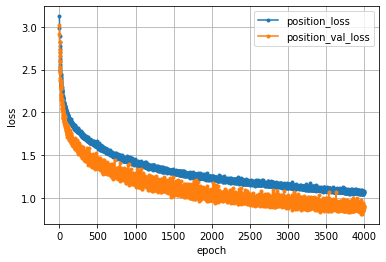

In [45]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

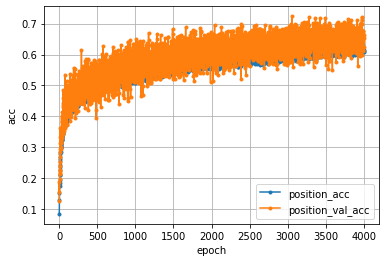

In [46]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()